# Full community

The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
The ['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12'] trials were dropped from the ecoli measurements.
The ['B2', 'B12', 'G2', 'G12'] trials were removed from the ecoli measurements, with their deviation over time being less than the threshold of 2.
The ['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12'] trials were dropped from the pf measurements.
The ['B2', 'B3', 'B12', 'G12'] trials were removed from the pf measurements, with their deviation over time being less than th

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:489: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = pyplot.subplots()


{'trial': 'B5', 'content': 'EX_cpd10515_e0', 'species': 'ecoli', 'phenotype': 'malt'}
3
{'trial': 'B5', 'content': 'EX_cpd11416_c0', 'species': 'ecoli', 'phenotype': 'malt'}
3
{'trial': 'B5', 'content': 'EX_cpd11574_e0', 'species': 'ecoli', 'phenotype': 'malt'}
3
The solution is optimal.
CPU times: total: 8min 9s
Wall time: 8min 9s
growth: 0.1 objective value: 595680.4529300024 




2022-07-14 15:01:39.138992


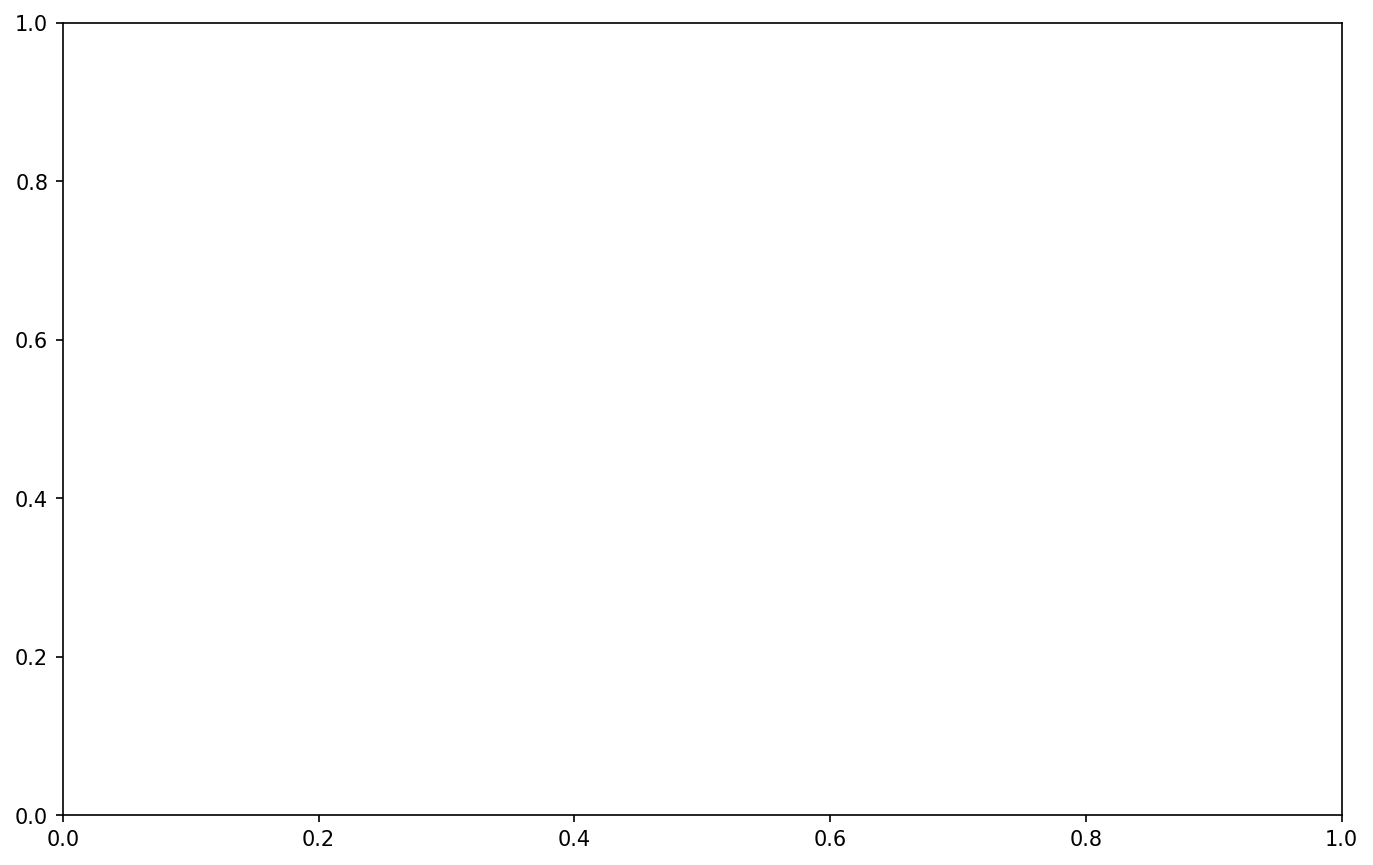

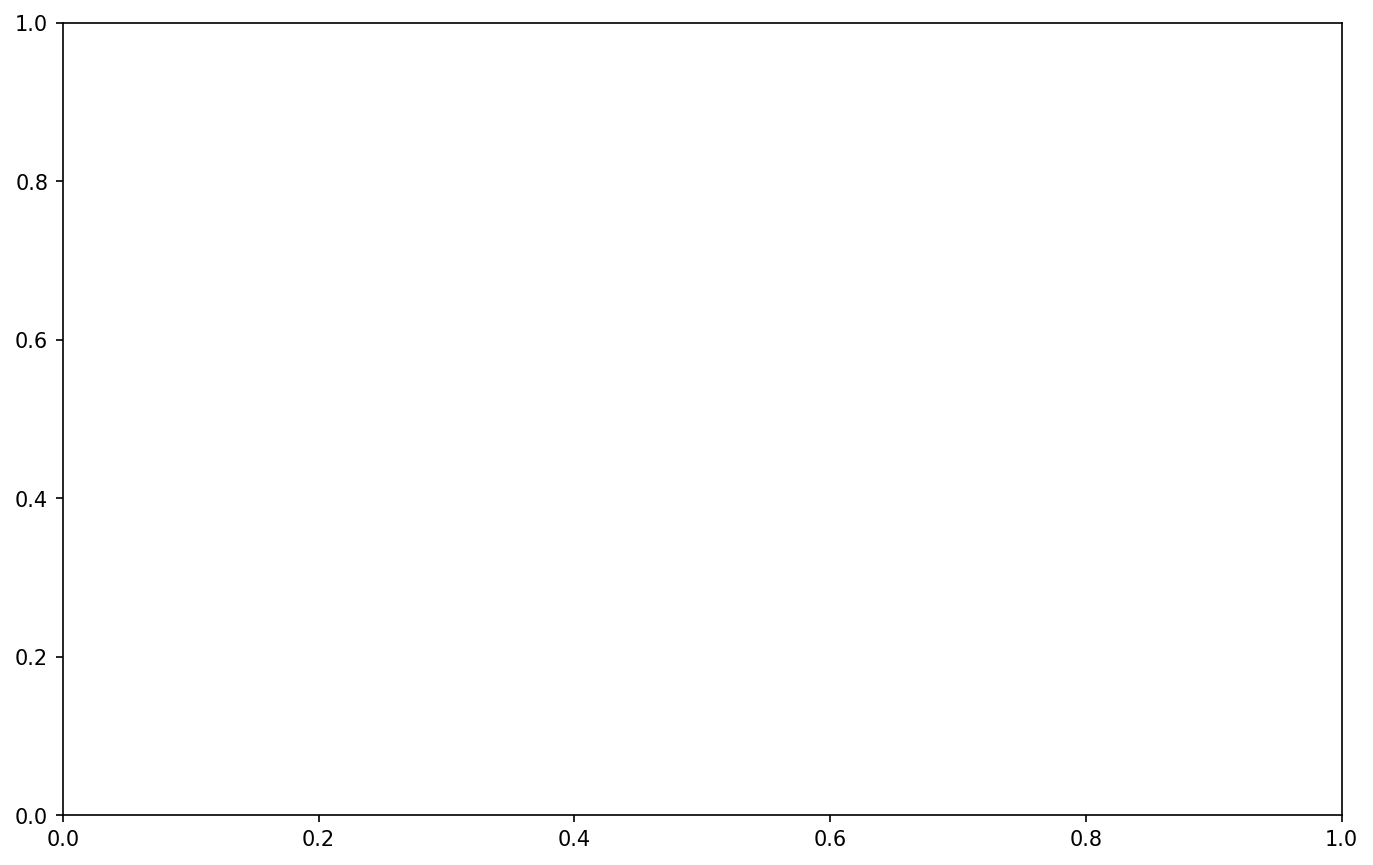

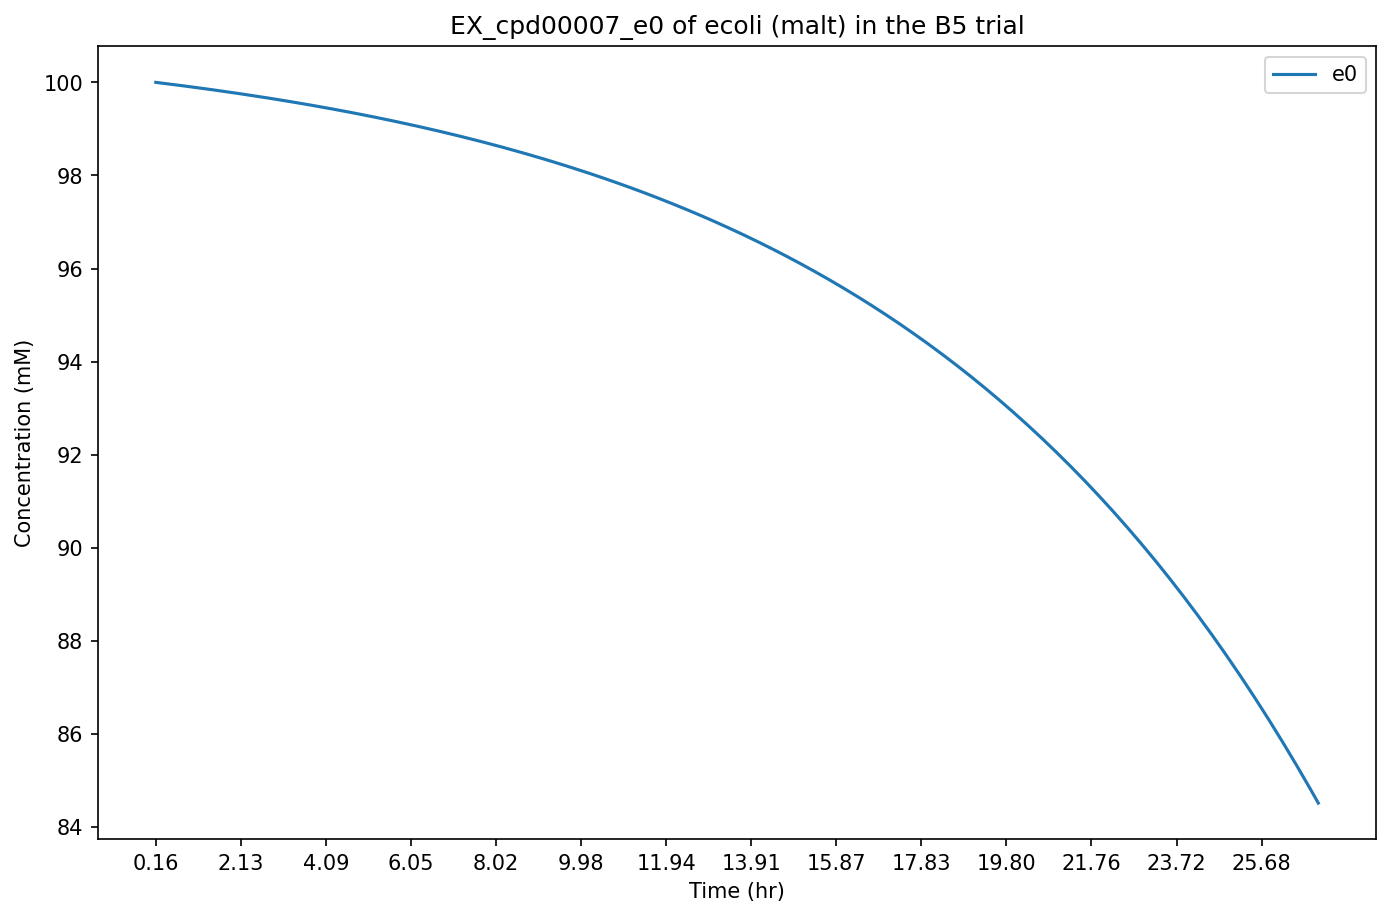

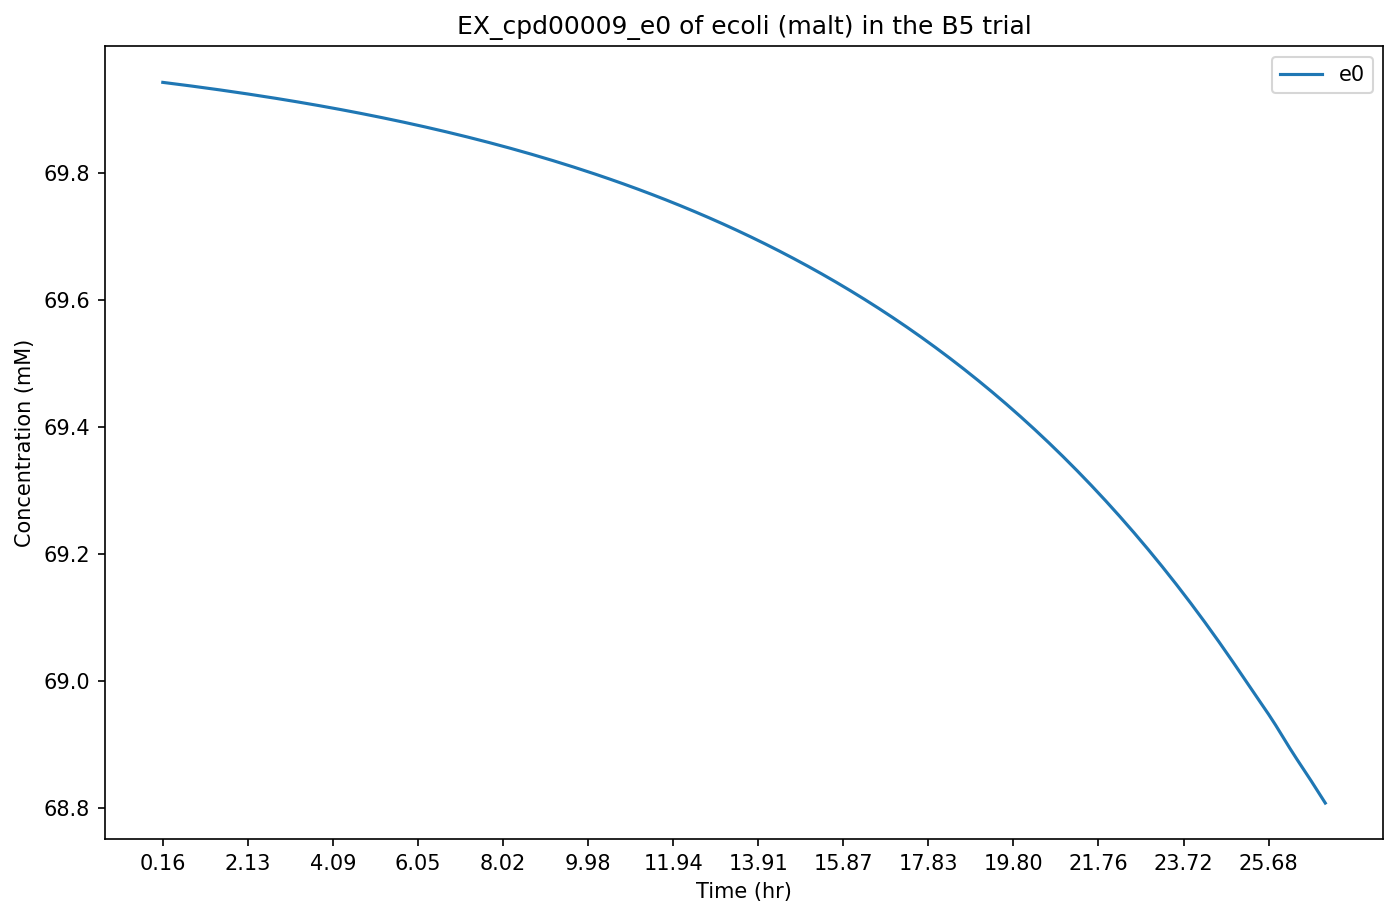

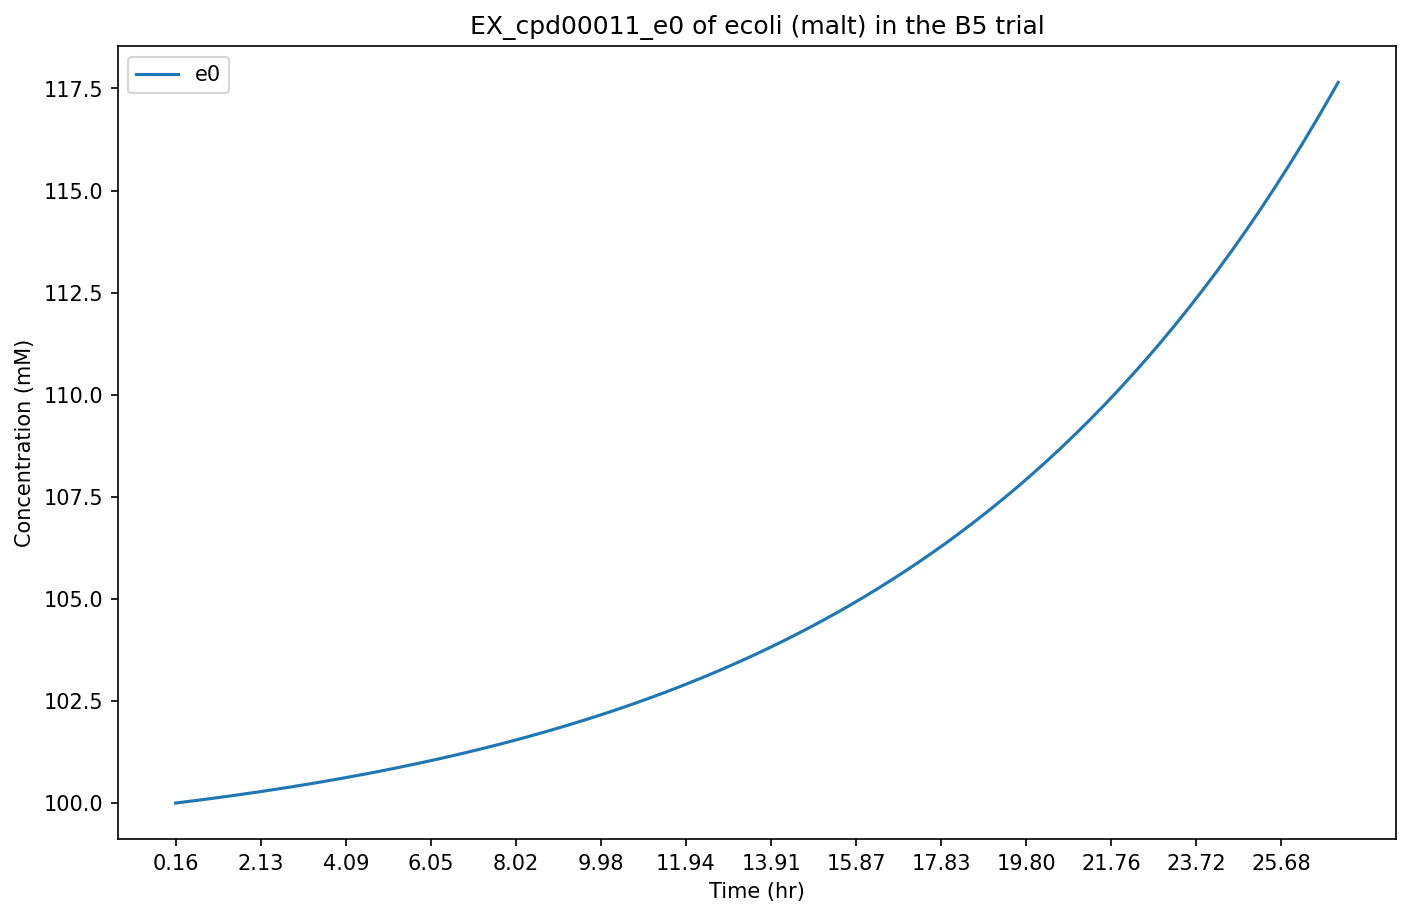

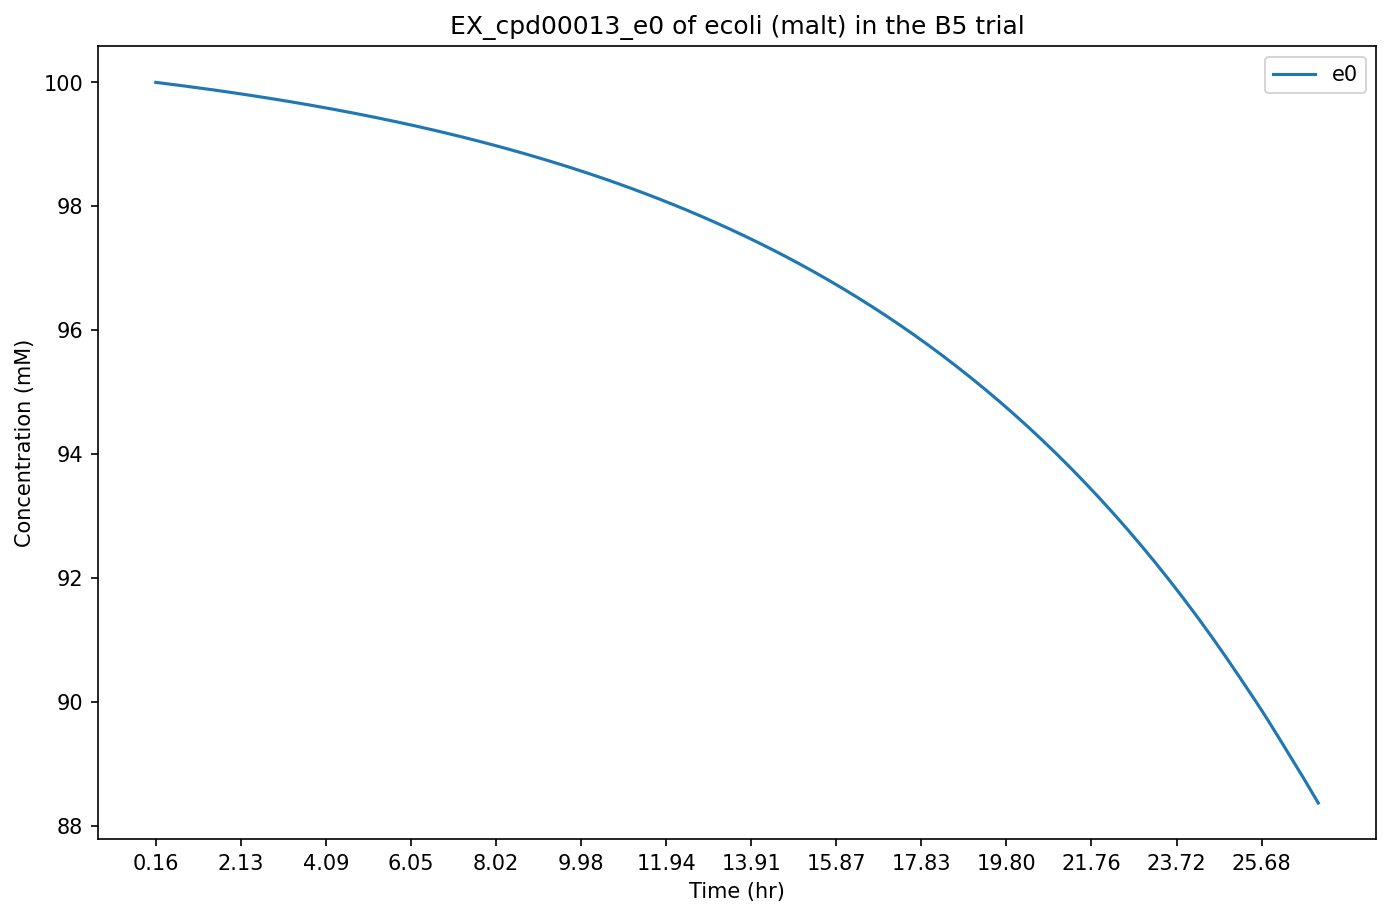

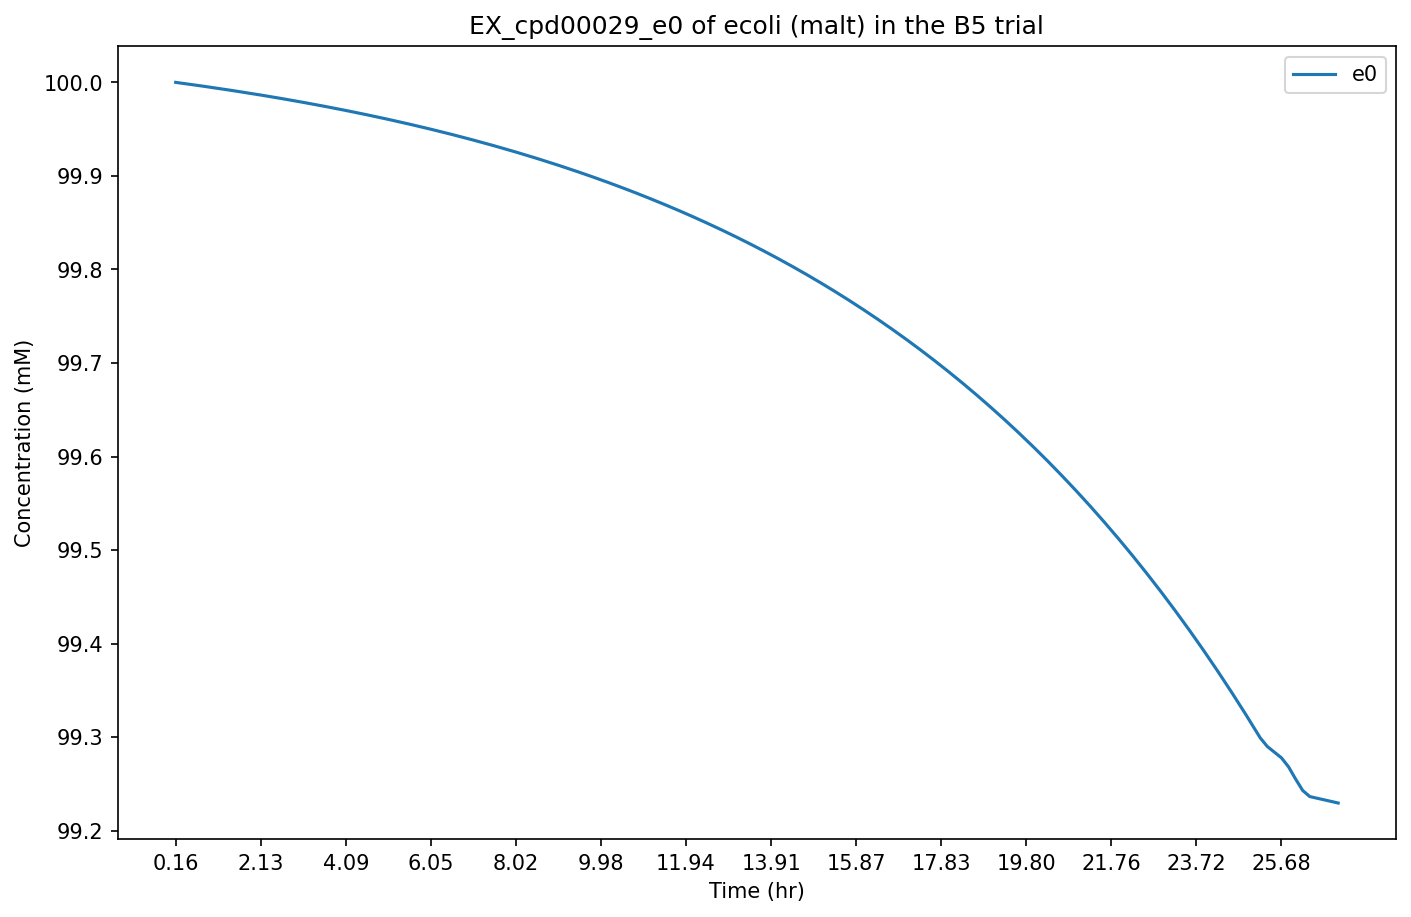

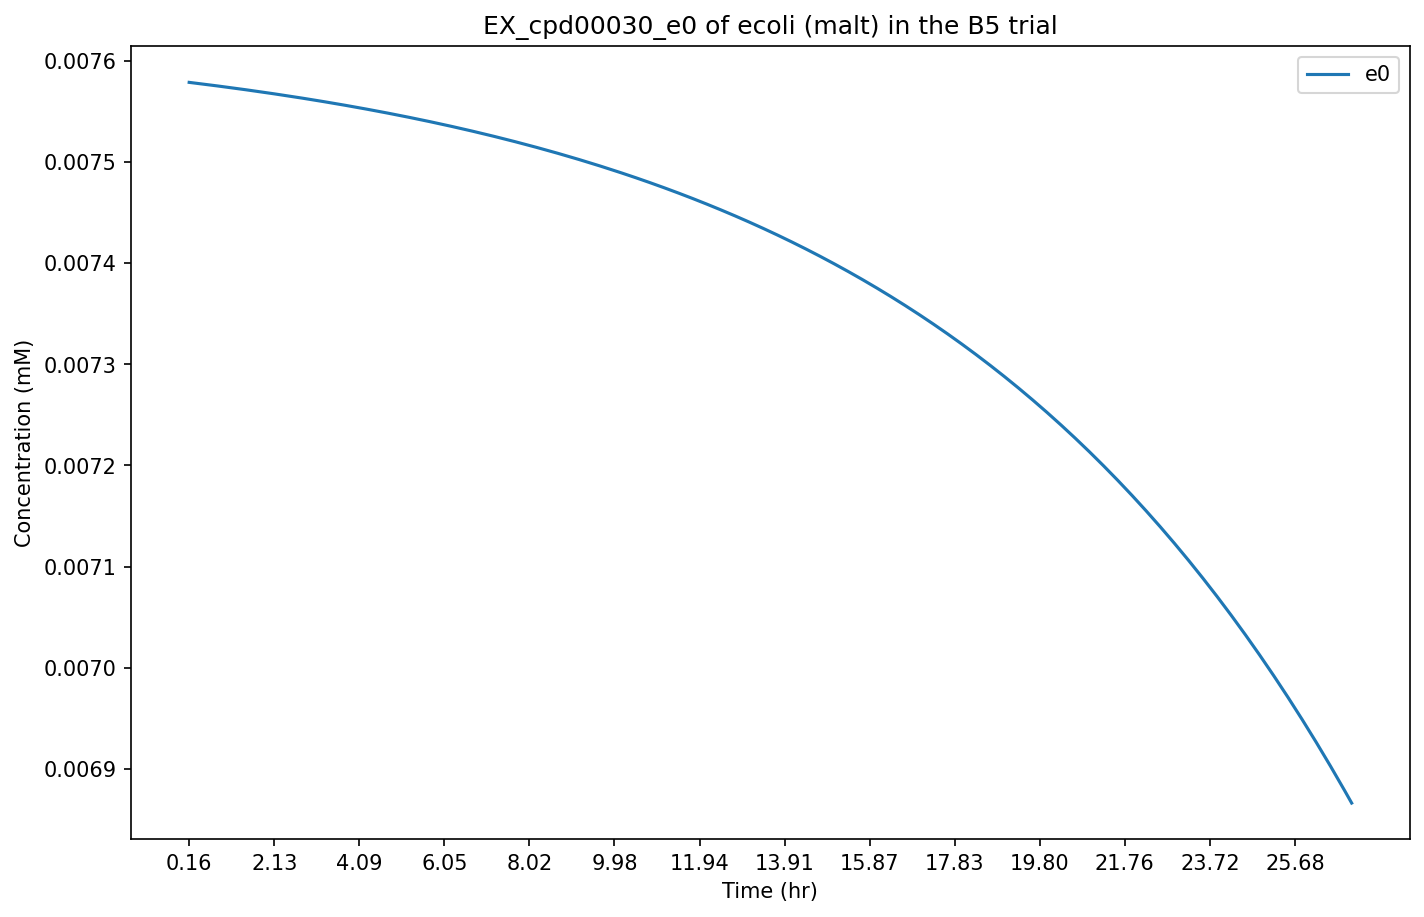

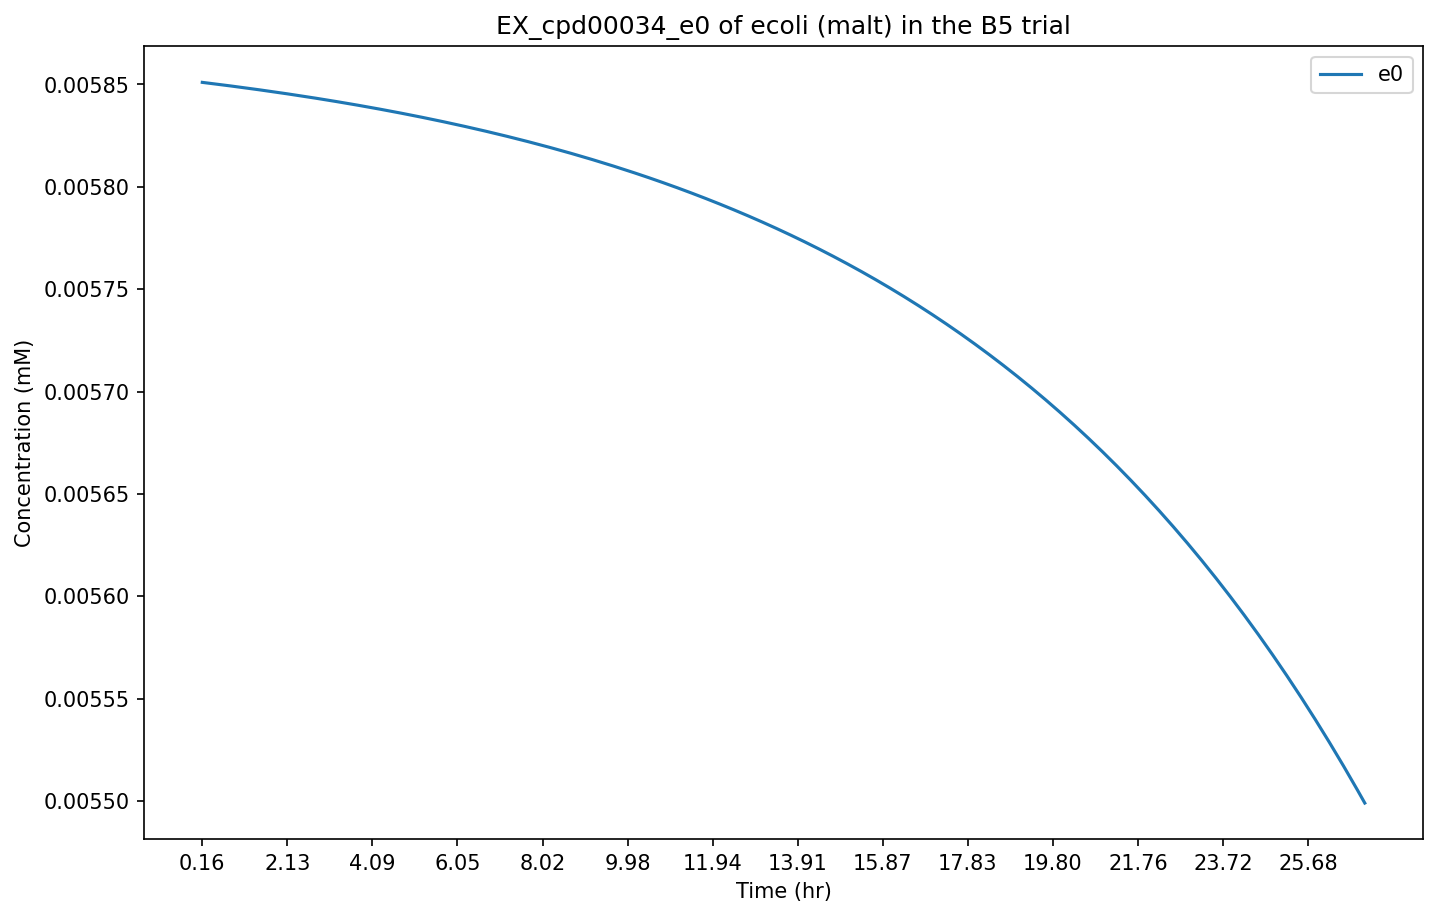

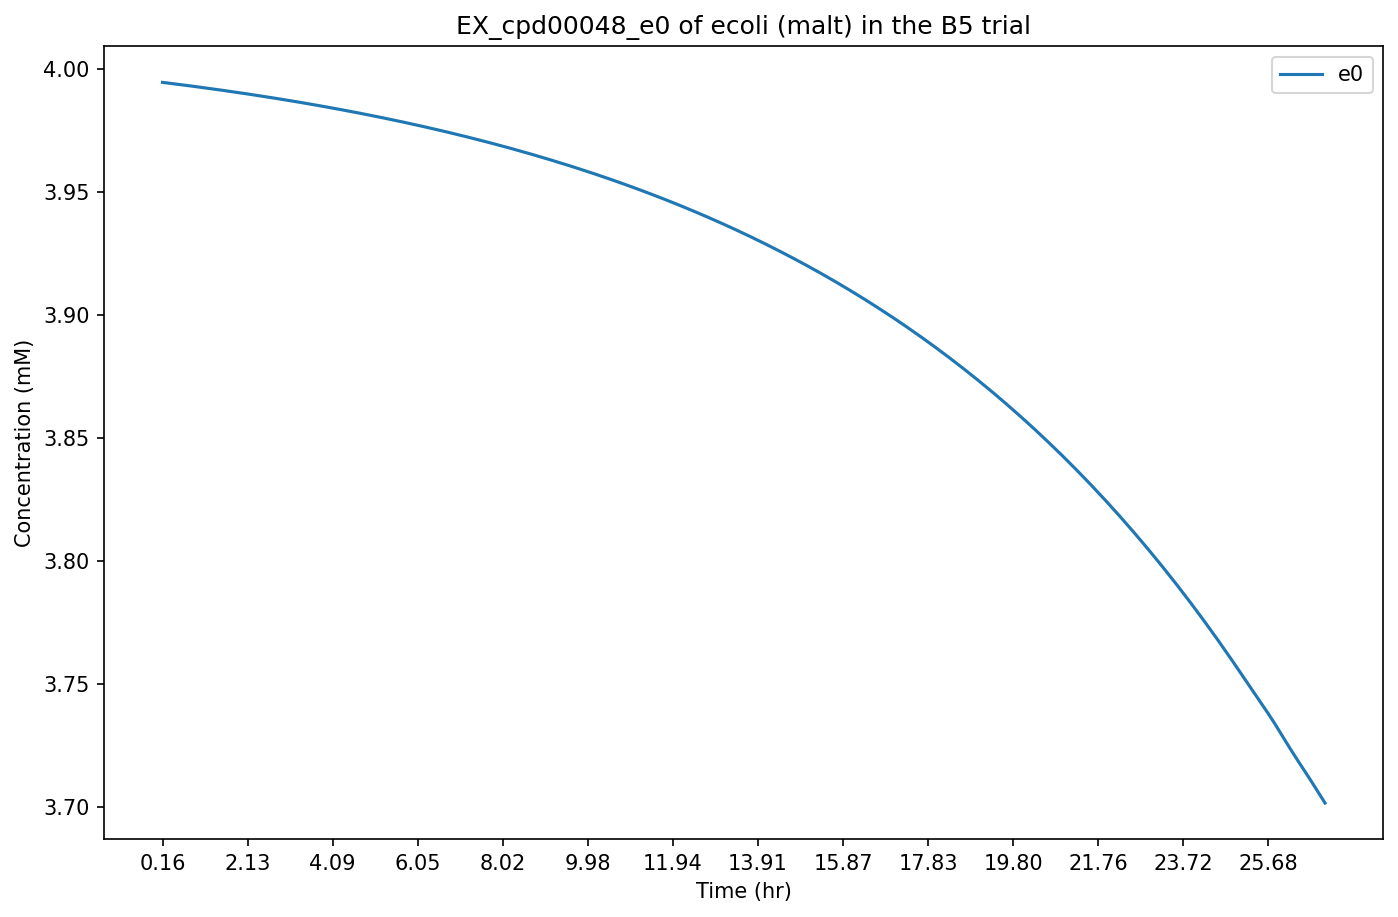

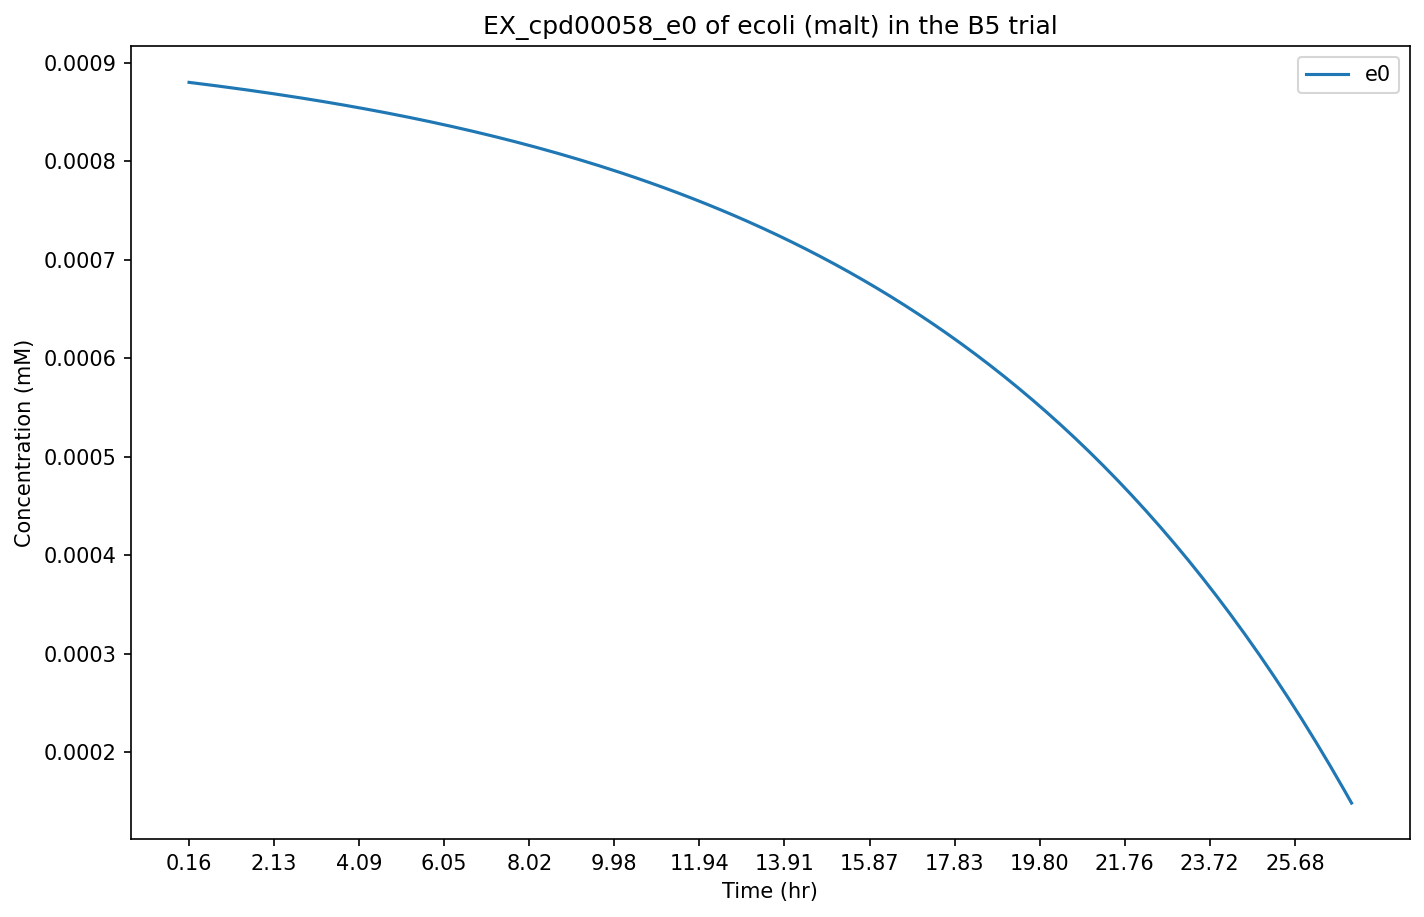

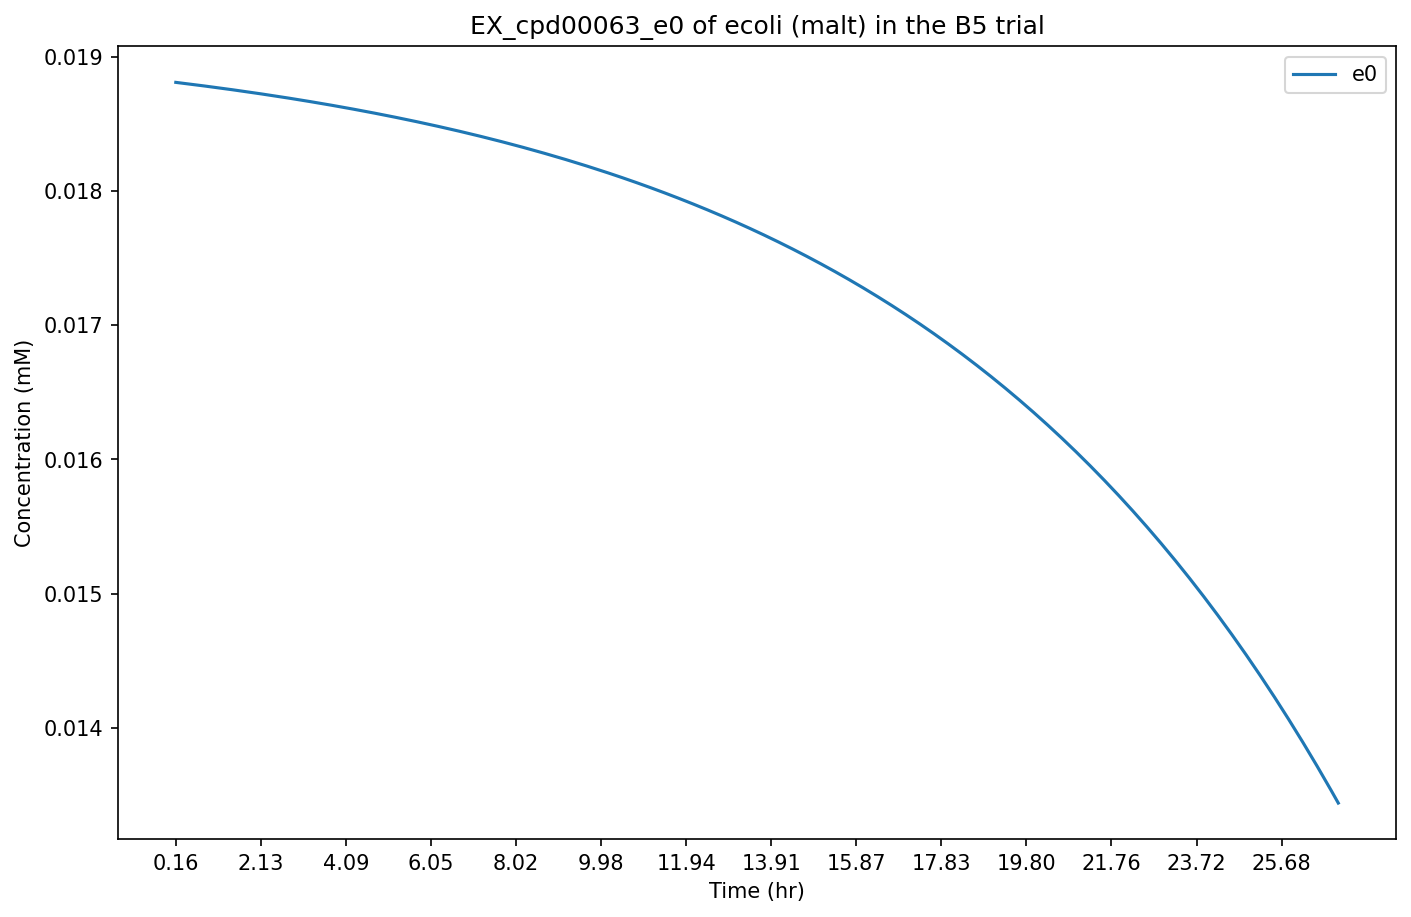

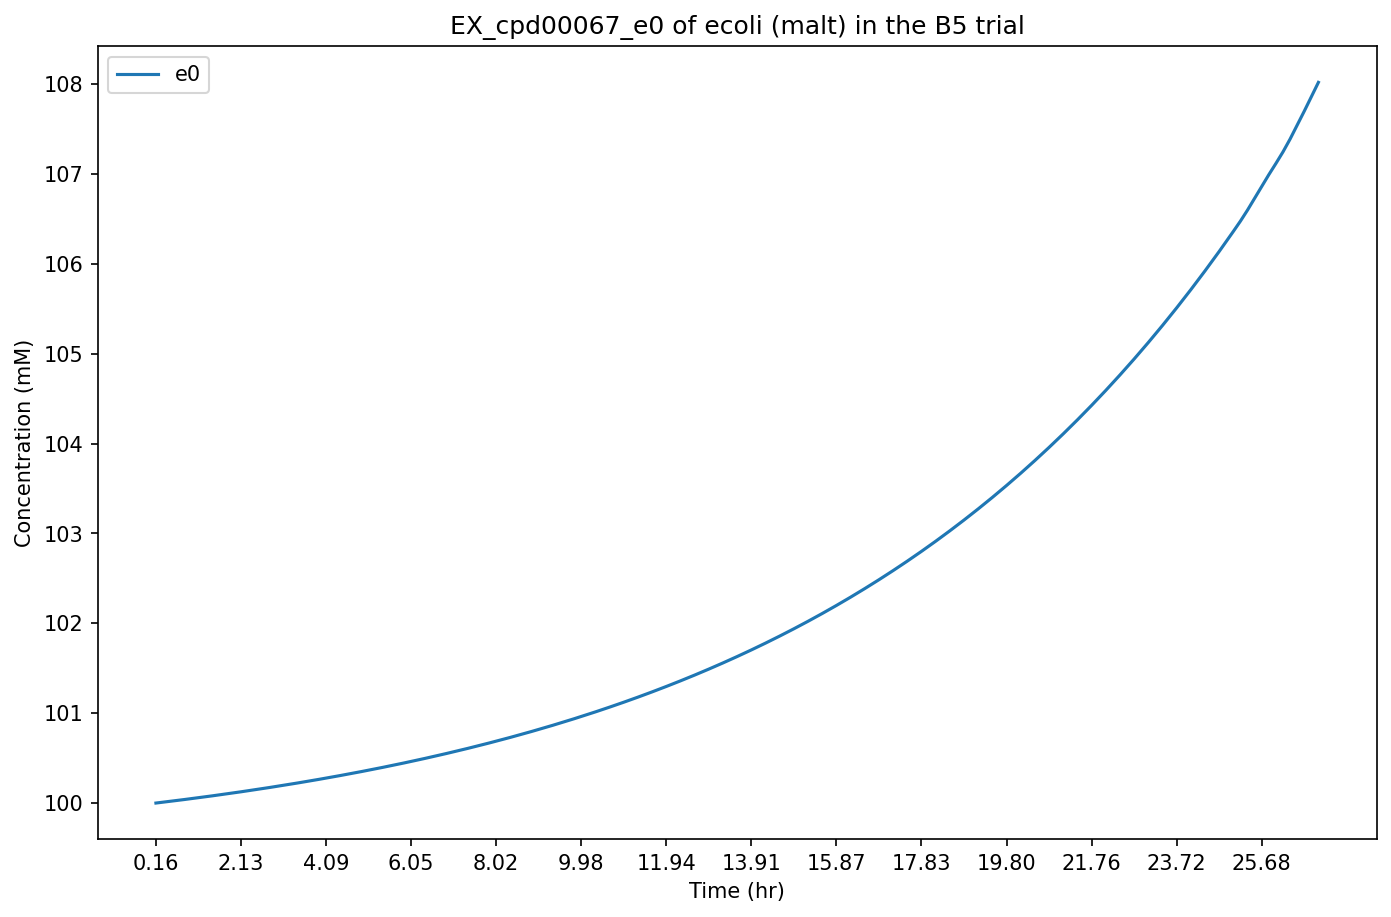

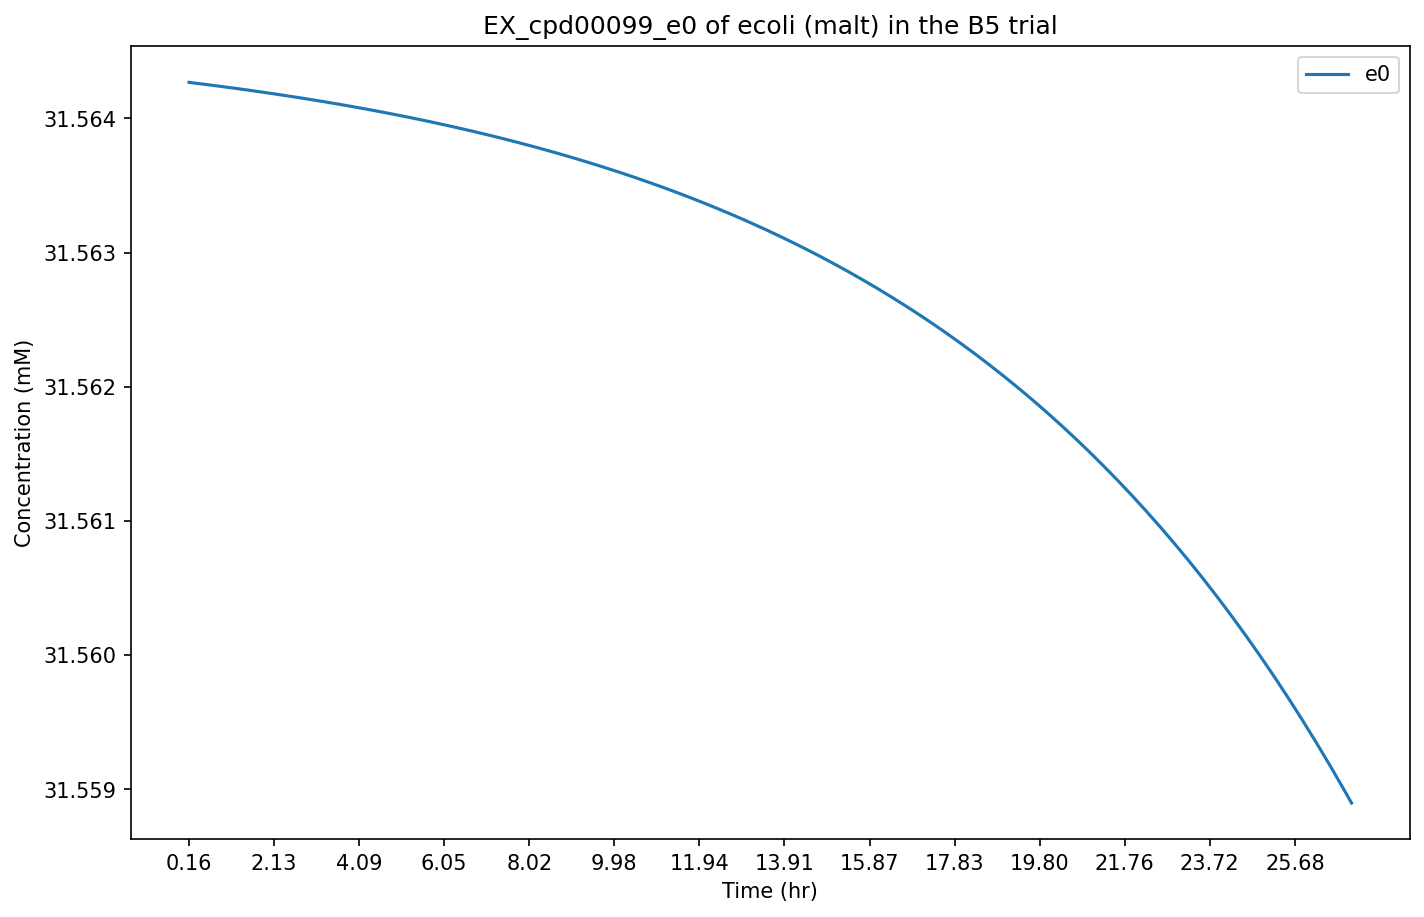

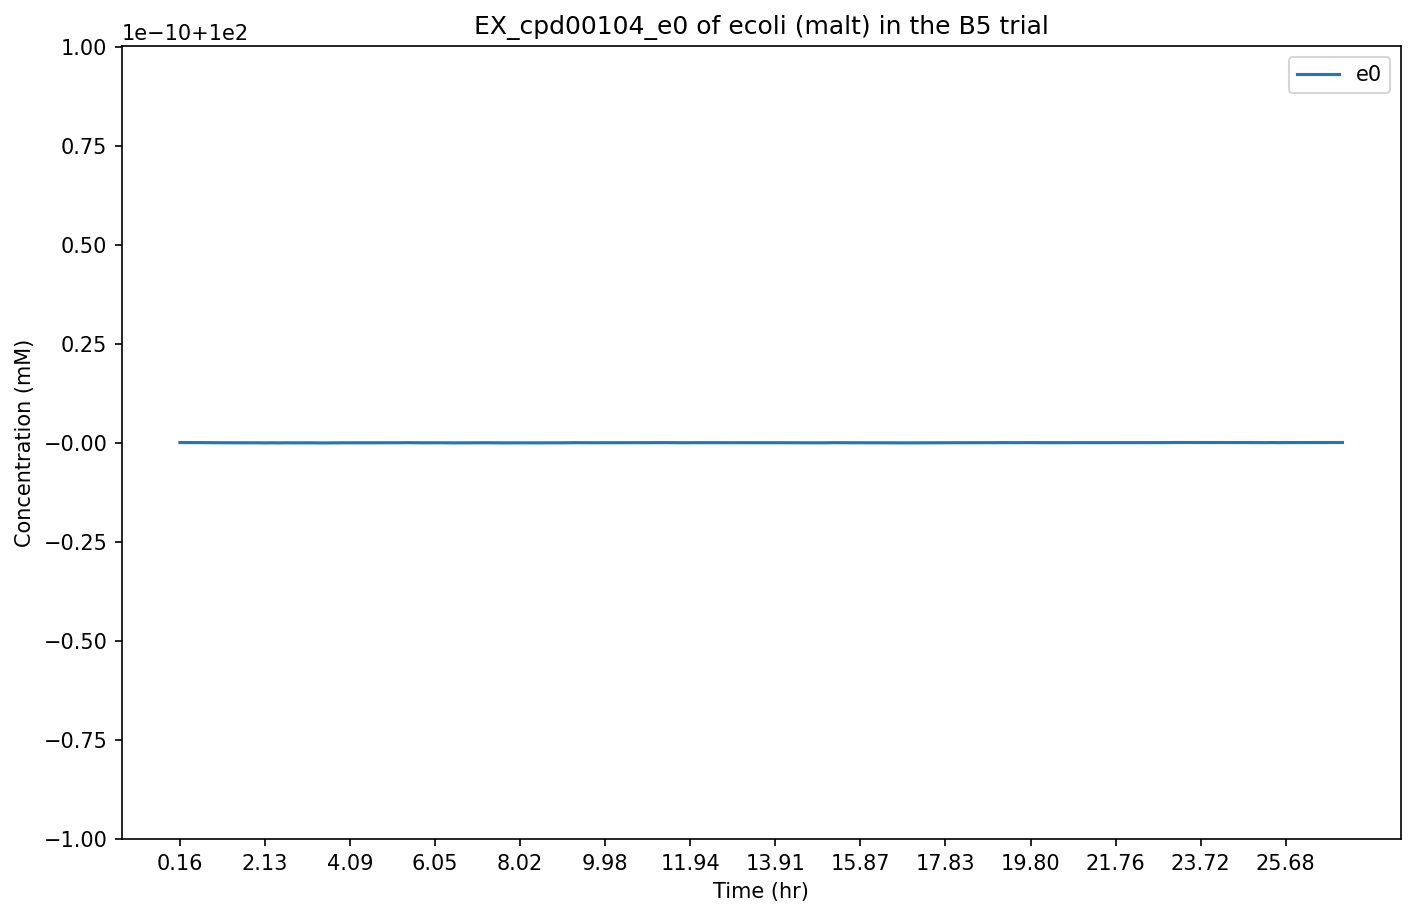

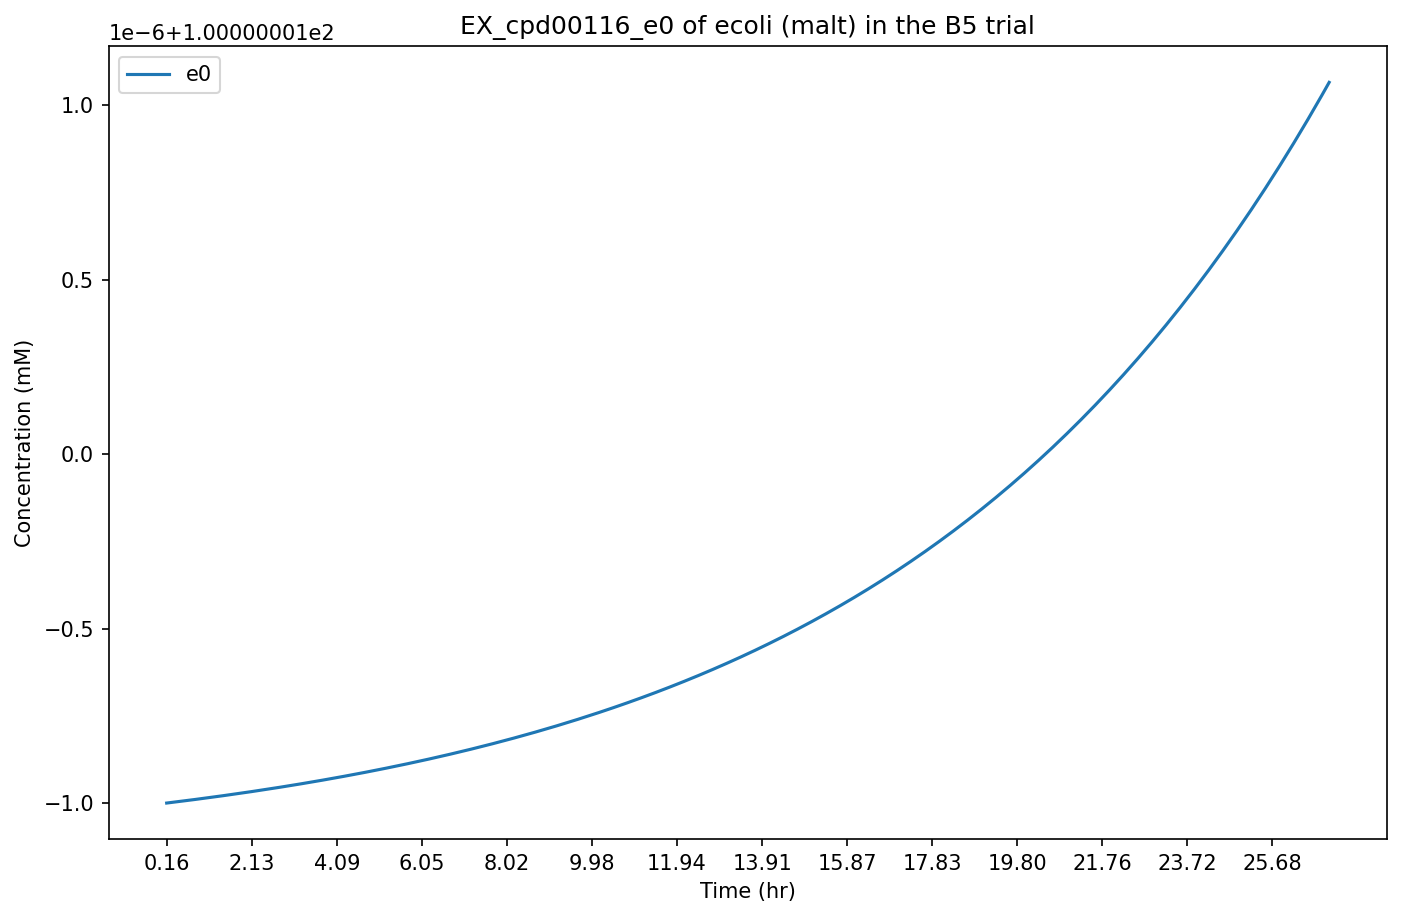

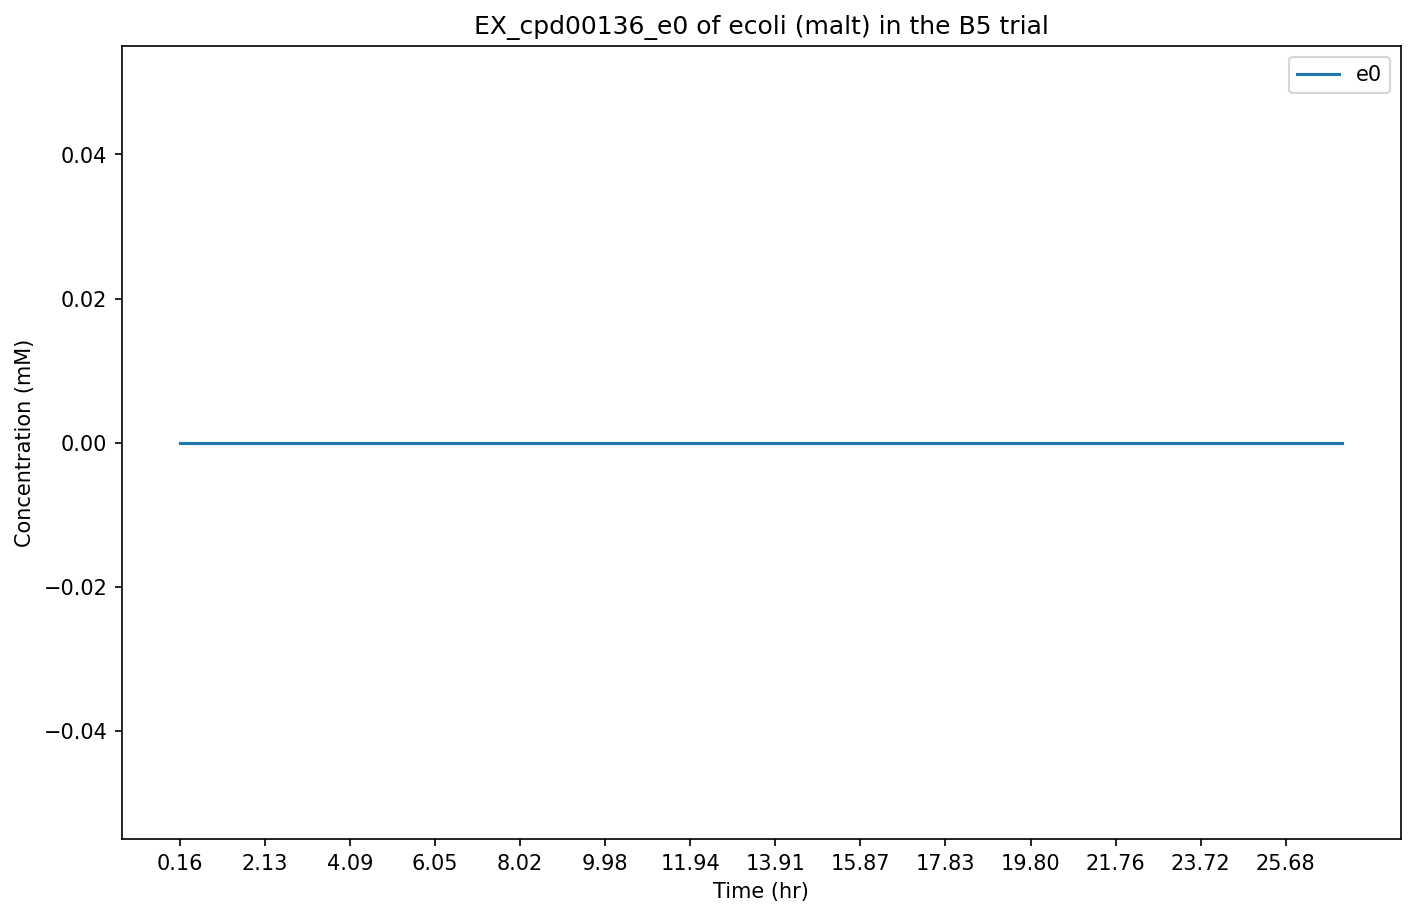

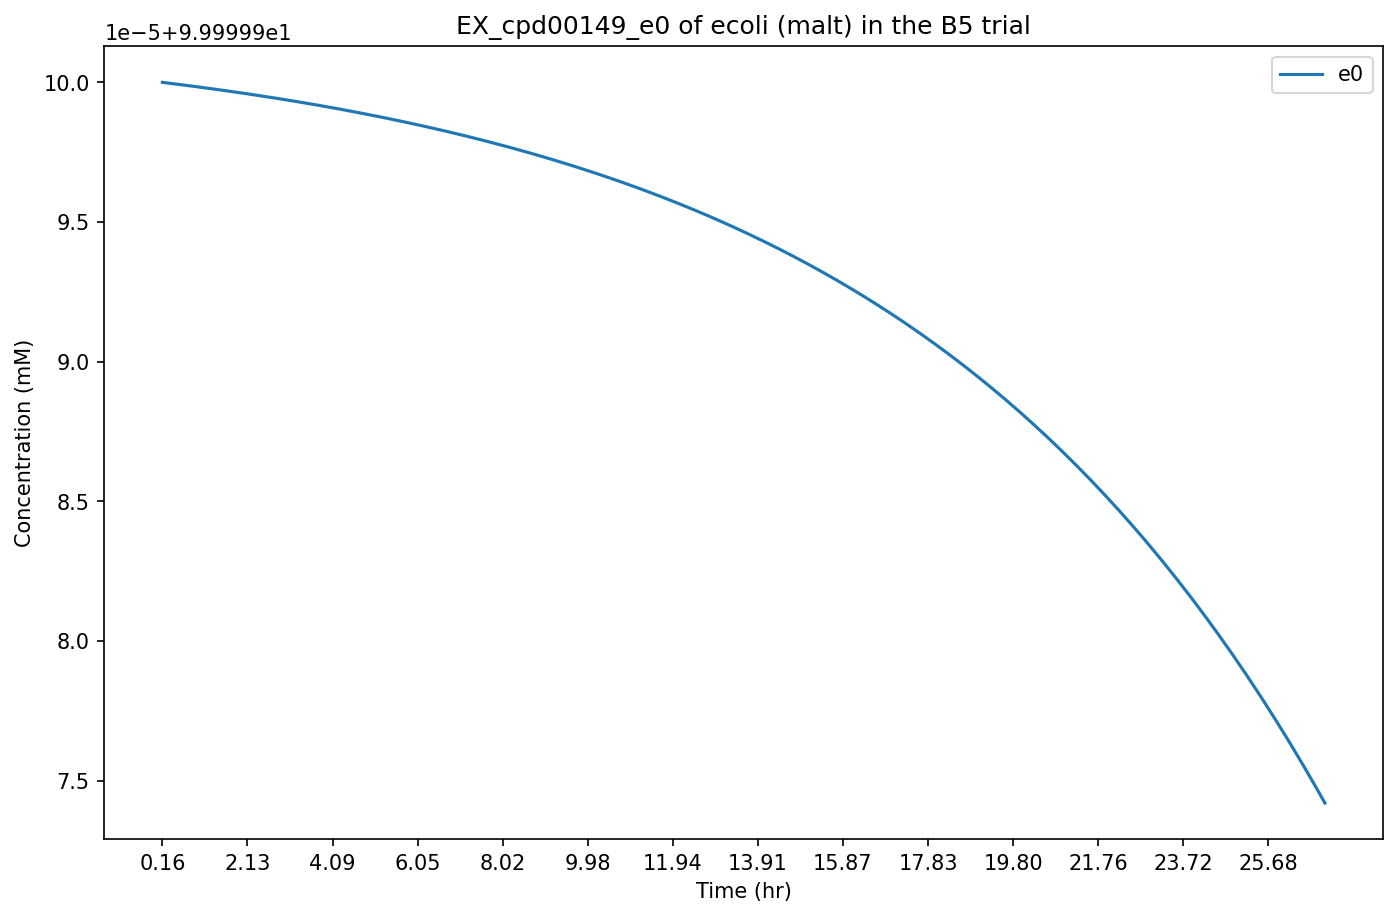

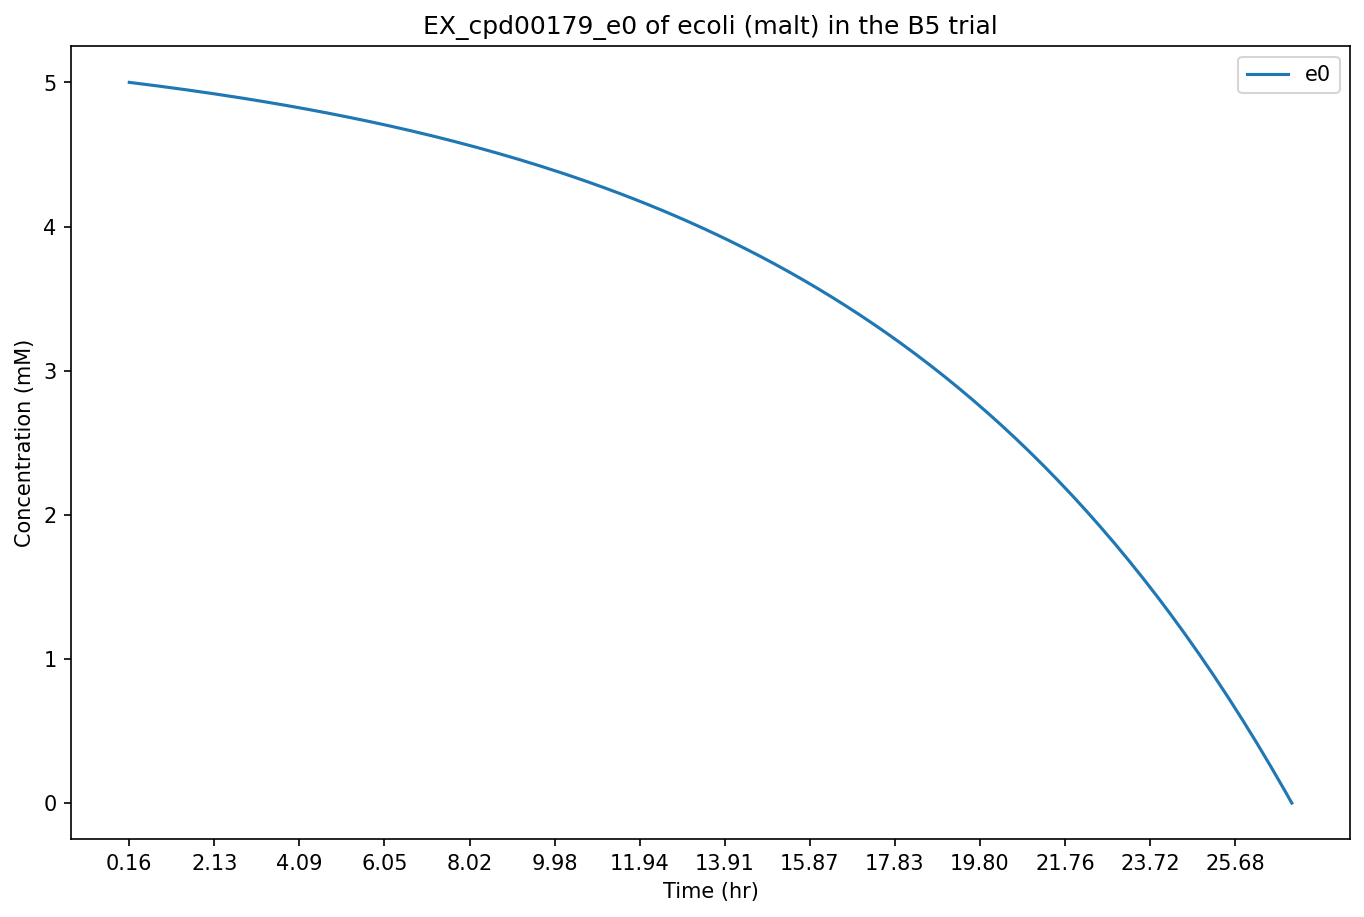

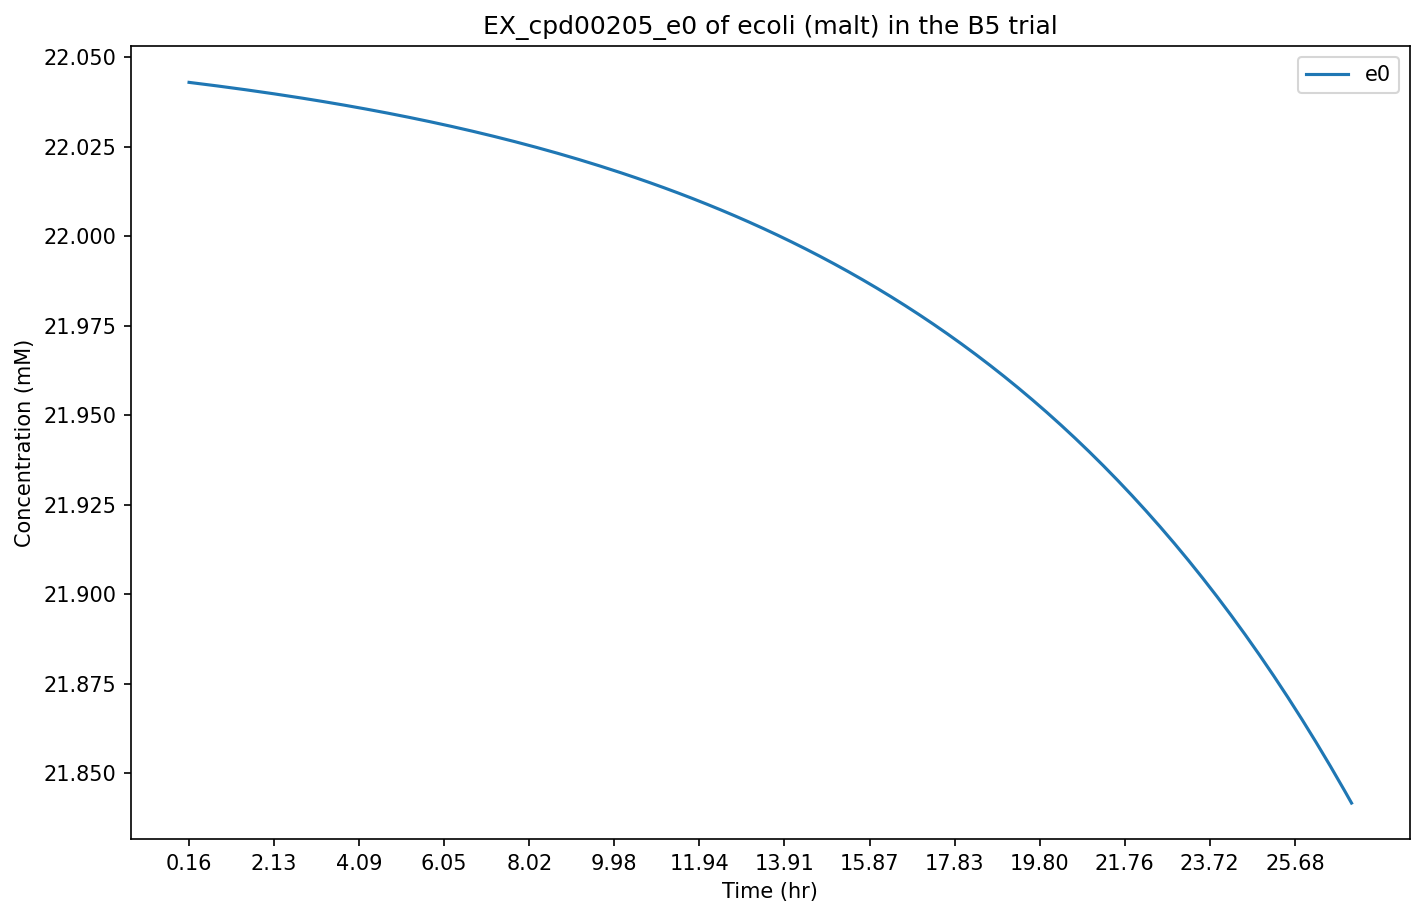

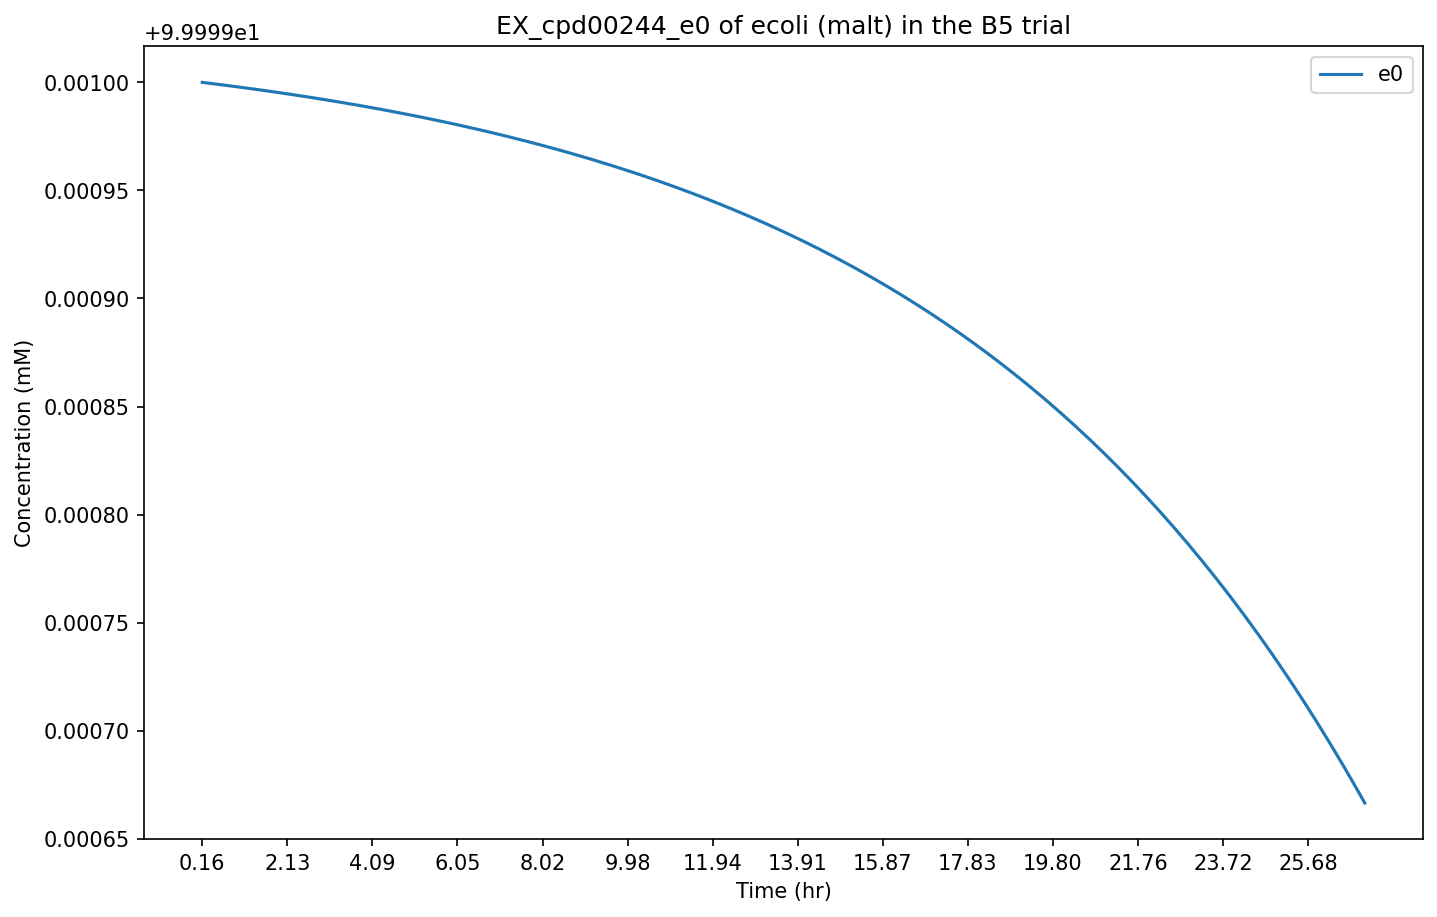

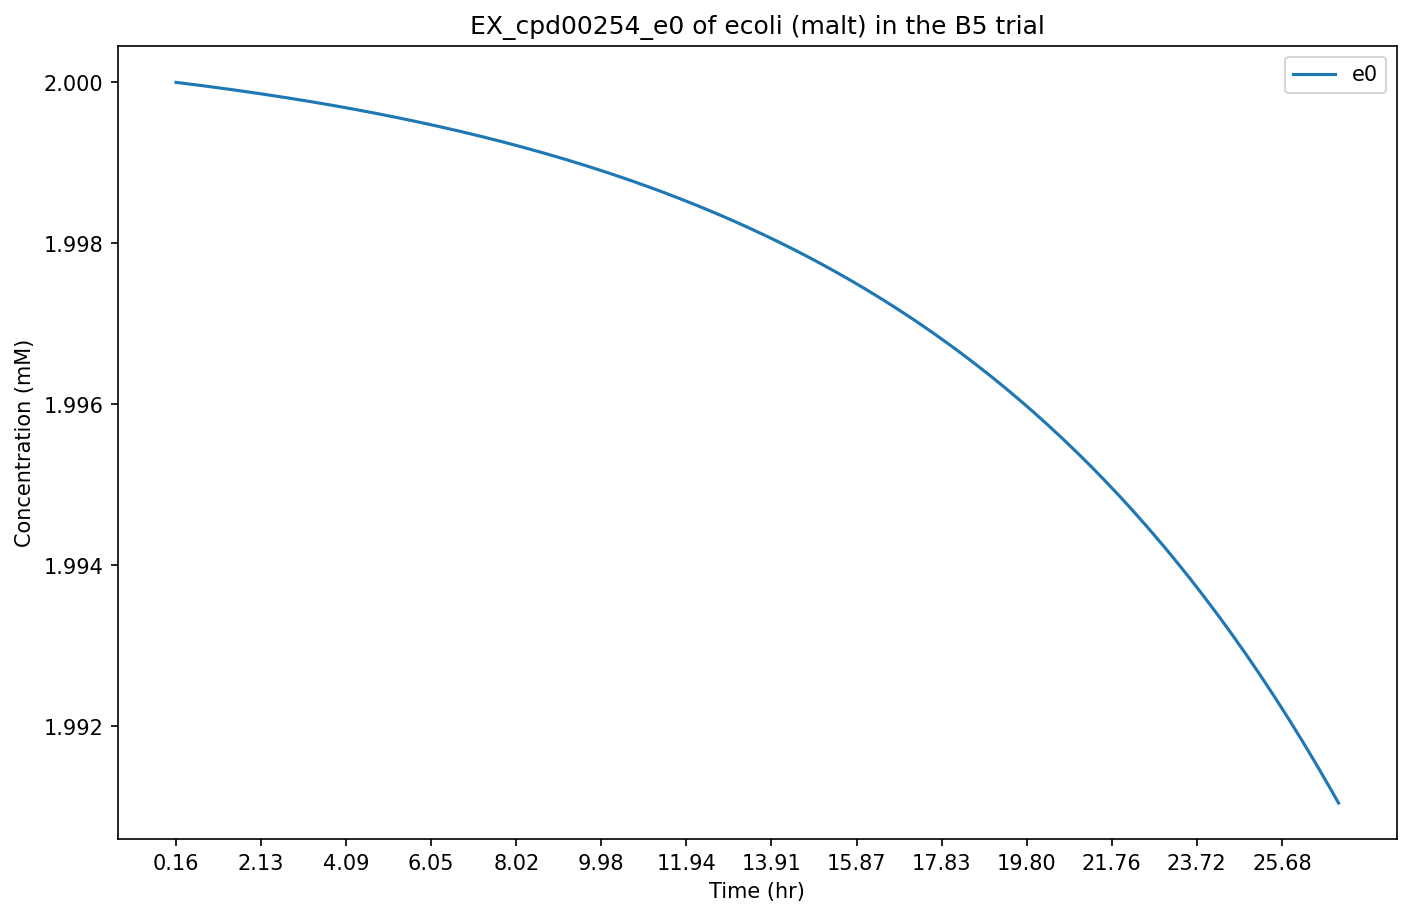

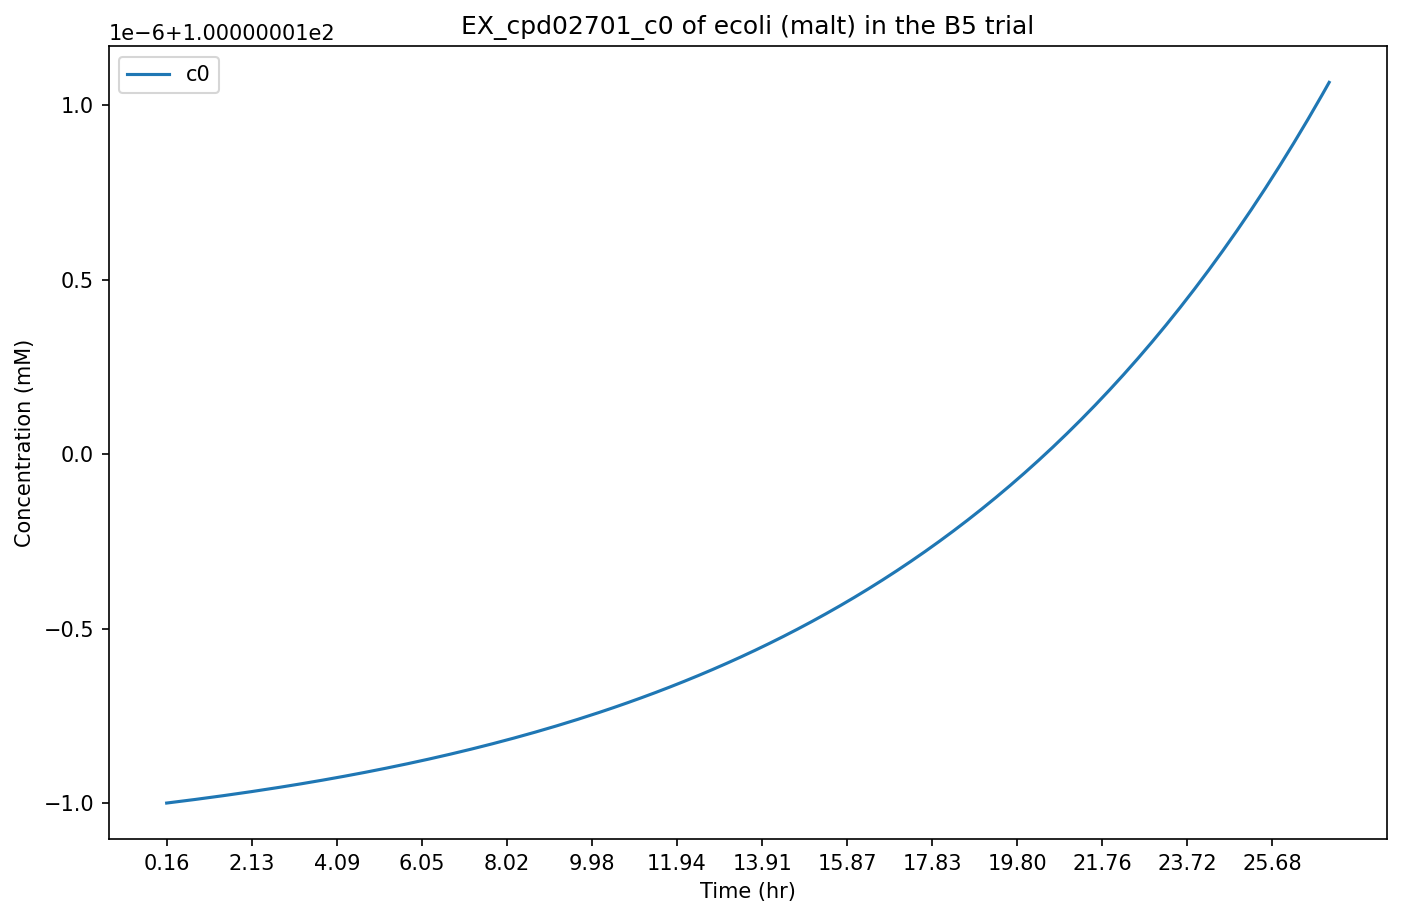

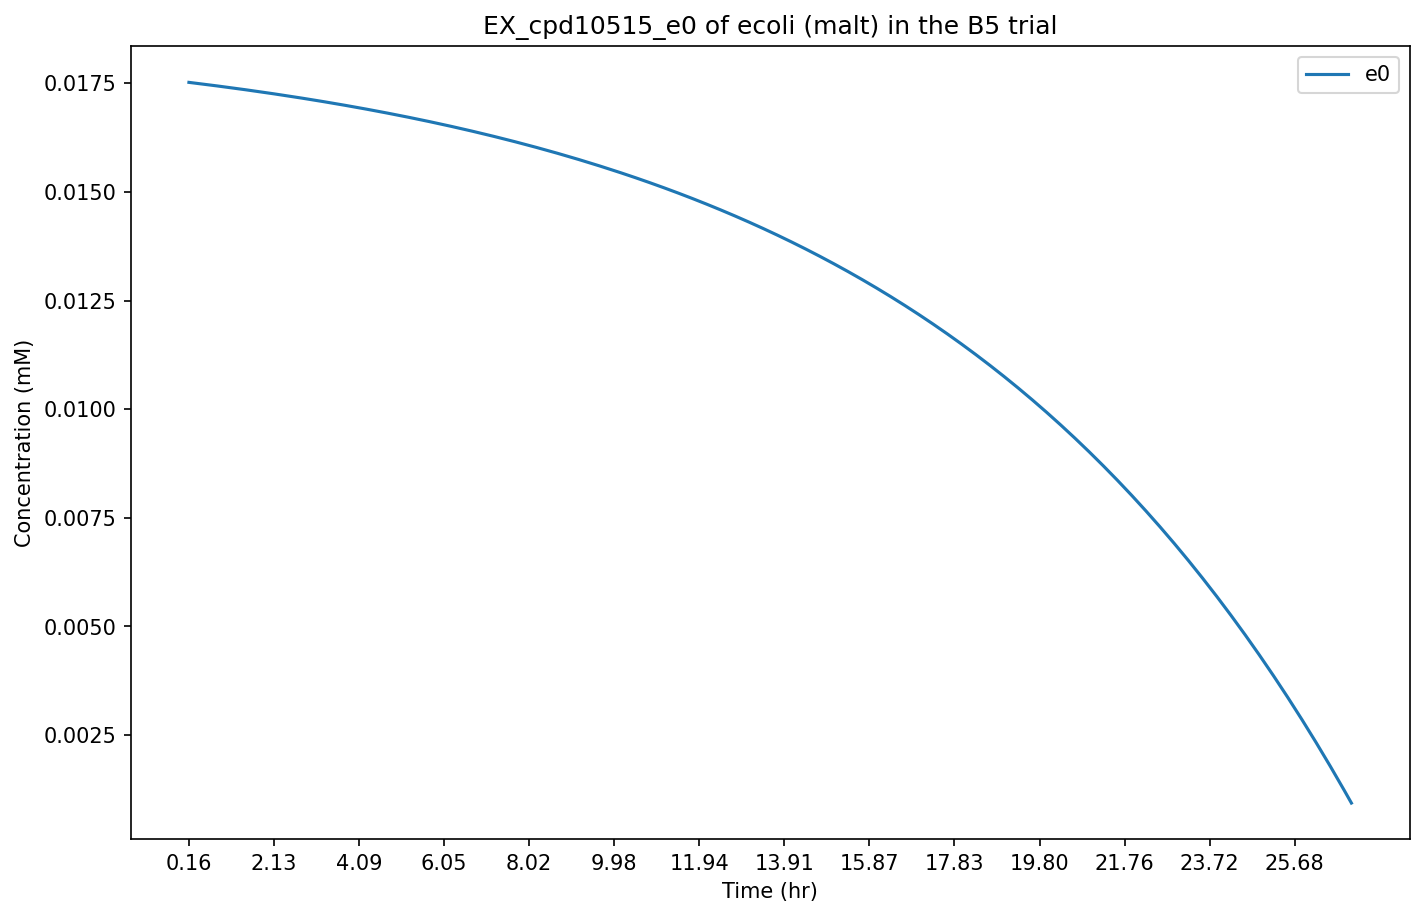

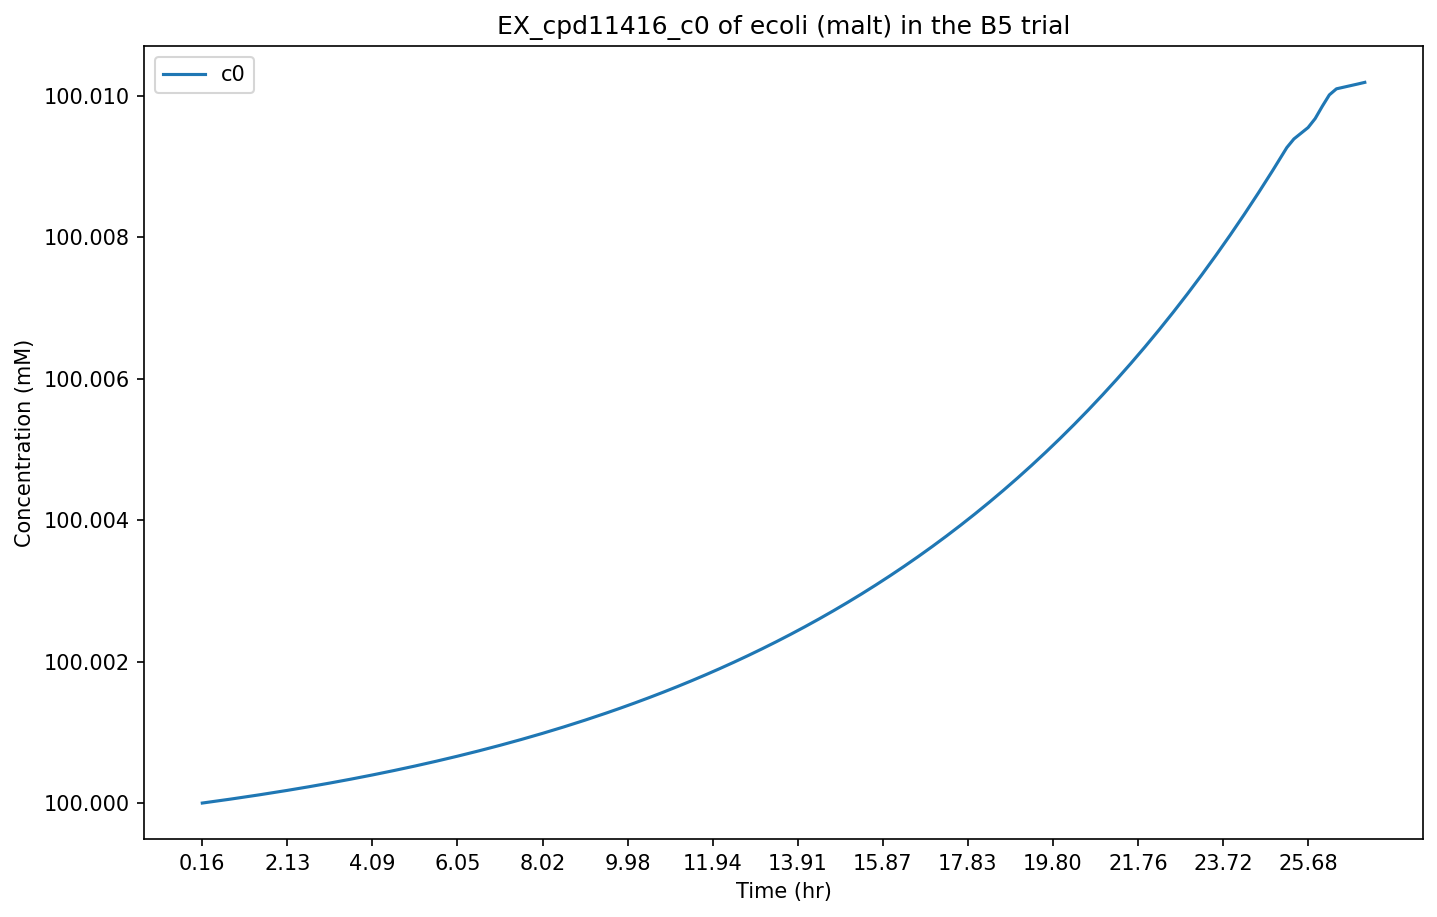

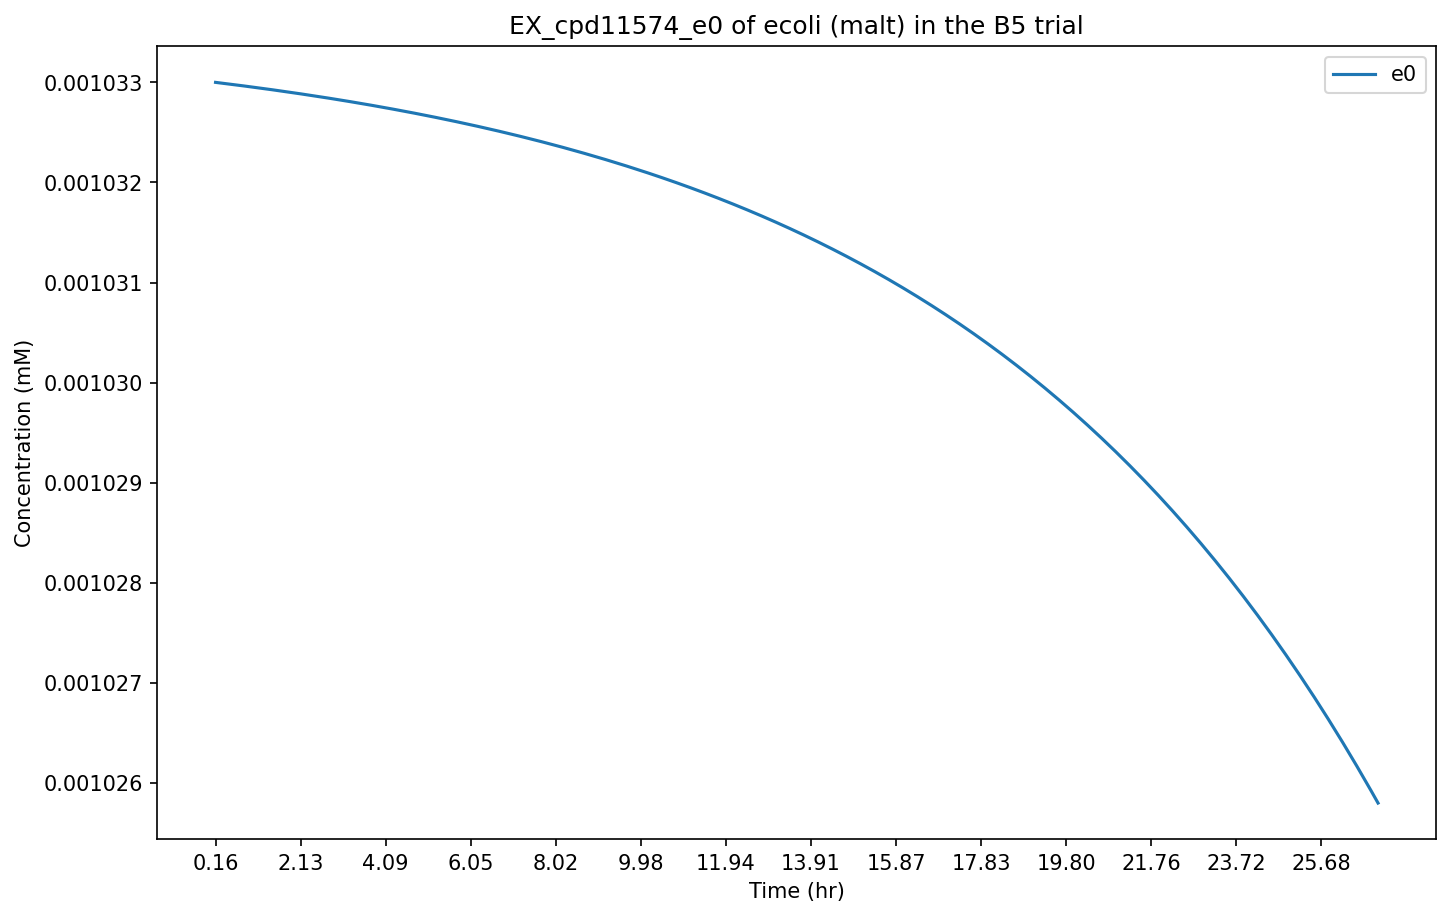

In [40]:
from datetime import datetime
from zipfile import ZipFile
from pandas import read_csv
import os
# from mscommfitting import MSCommFitting
# os.chdir('C:/Users/Andrew Freiburger/Documents/Argonne/ProjectNotebooks/CommunityModeling/CommFitting/Ecoli_maltose')
%run ../mscommfitting.py
with ZipFile('msComFit.zip', 'r') as zp:
    zp.extractall()
fluxes_df = read_csv('PhenotypeStoichiometry.csv')
graphs = []
for metabolite in fluxes_df['rxn'].to_list():
    graphs.append({
        'trial':'B5',
        'content': metabolite,
        'species': 'ecoli',
        'phenotype': 'malt'
    })
mscommfit = MSCommFitting(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                           signal_tsv_paths = {'RFP_pf-ec_4-29-22.txt':'ecoli', 'GFP_pf-ec_4-29-22.txt':'pf', 'OD_pf-ec_4-29-22.txt':'OD'},
                           media_conc_path = 'media_conc.csv',
                           species_abundance_path = 'species_abundances.csv',
                           carbon_conc_series = {'rows': {
                               'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                               'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                               }},
                           ignore_trials = {'rows': ['C', 'D', 'E', 'F']}, # 'wells': ['C2', 'G3', 'C12']},  # 'columns': [6,7,8,9,10,11,12]},
                           # ignore_timesteps = [x for x in range(20,167)],
                           zip_path='msComFit.zip')
print(datetime.today())
mscommfit.define_problem(parameters={
    'v':0.1,
    'cvmin': 100,
    'bcv': 100,
    'diffpos': 100,
    'diffneg': 100
    }, zip_name='simple_full_community.zip')
print(datetime.today())
%time mscommfit.compute(graphs, 'simple_full_community.zip')
print('growth:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')
print(datetime.today())

# total biomass

In [37]:
graphs = [
    {
        'trial':'B4',
        'content': 'total_biomass',
        'species': 'ecoli',
        'phenotype': '*'
    }
]
mscommfit.graph(graphs, 'total_biomass.zip')

FileNotFoundError: [Errno 2] No such file or directory: 'total_biomass.zip'

# coculture %

# stress-test concentrations-coculture

{'trial': 'B4', 'content': 'biomass', 'species': 'ecoli', 'phenotype': '*'}
c_bio
c_EX_cpd00007_e0
c_EX_cpd00009_e0
c_EX_cpd00011_e0
c_EX_cpd00013_e0
c_EX_cpd00029_e0
c_EX_cpd00030_e0
c_EX_cpd00034_e0
c_EX_cpd00048_e0
c_EX_cpd00058_e0
c_EX_cpd00063_e0
c_EX_cpd00067_e0
c_EX_cpd00099_e0
c_EX_cpd00104_e0
c_EX_cpd00116_e0
c_EX_cpd00136_e0
c_EX_cpd00149_e0
c_EX_cpd00179_e0
c_EX_cpd00205_e0
c_EX_cpd00244_e0
c_EX_cpd00254_e0
c_EX_cpd02701_c0
c_EX_cpd10515_e0
c_EX_cpd11416_c0
c_EX_cpd11574_e0
cvf_ecoli_malt
cvt_ecoli_malt
b_ecoli_malt
1
g_ecoli_malt
cvf_ecoli_acetate
cvt_ecoli_acetate
b_ecoli_acetate
1
g_ecoli_acetate
cvf_pf_acetate
cvt_pf_acetate
b_pf_acetate
g_pf_acetate
cvf_pf_4HB
cvt_pf_4HB
b_pf_4HB
g_pf_4HB
b_ecoli_stationary
1
g_ecoli_stationary
b_pf_stationary
g_pf_stationary
RFP__bio
RFP__diffpos
RFP__diffneg
GFP__bio
GFP__diffpos
GFP__diffneg
OD__bio
OD__diffpos
OD__diffneg
{'trial': 'B4', 'content': 'biomass', 'species': 'pf', 'phenotype': '*'}
c_bio
c_EX_cpd00007_e0
c_EX_cpd00009_e0

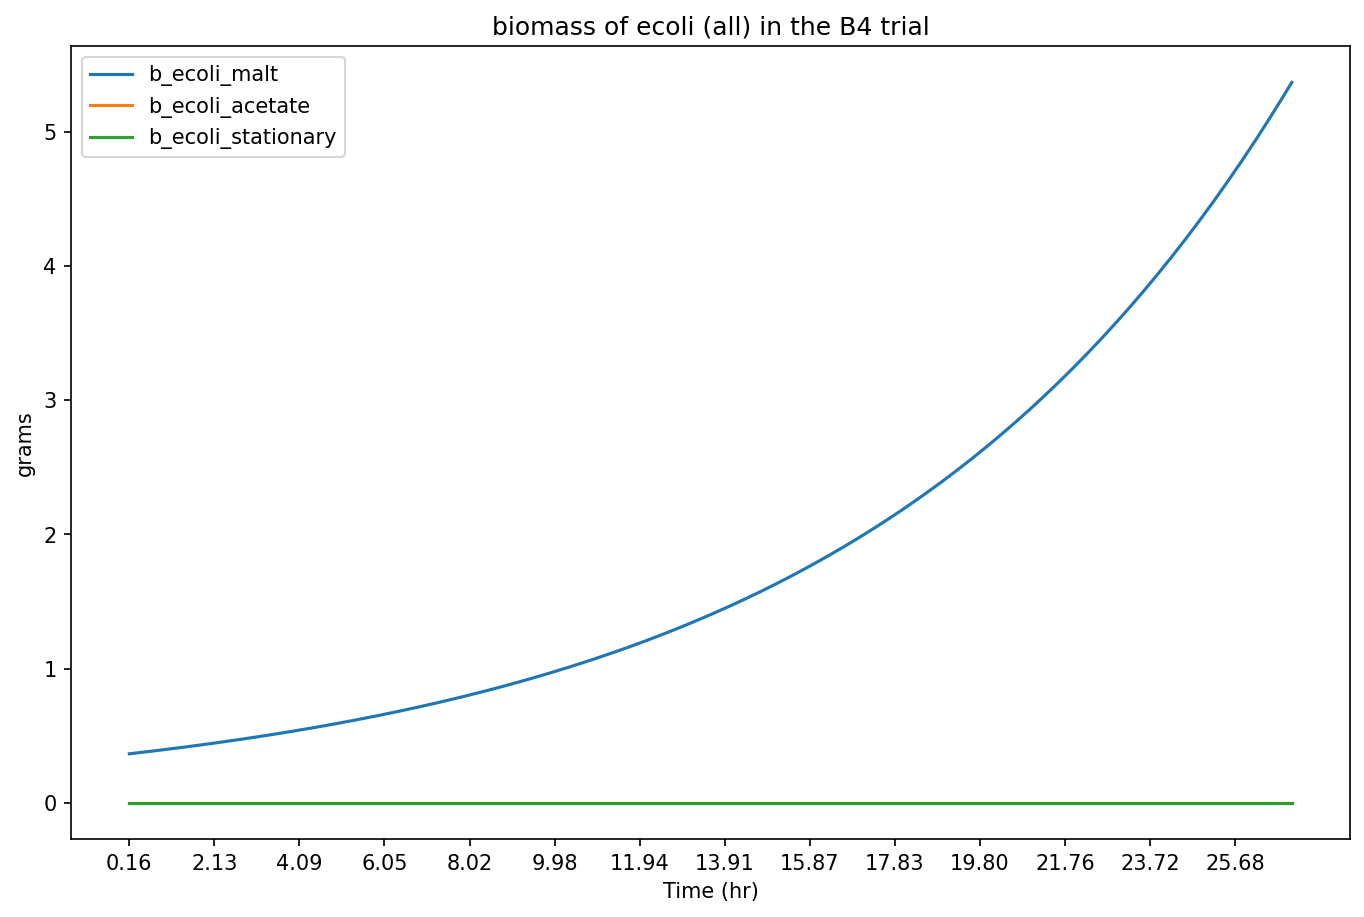

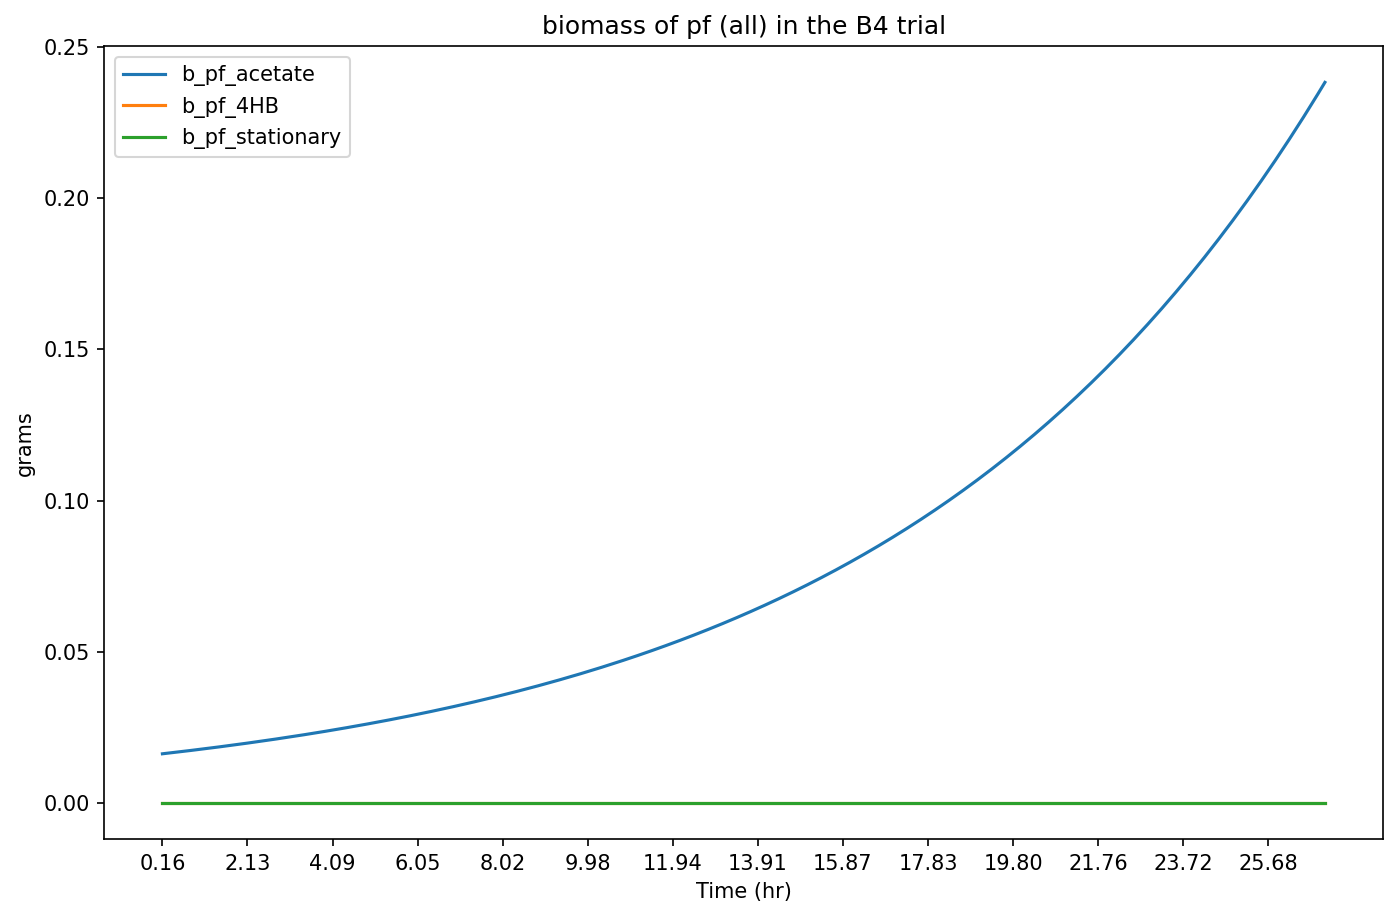

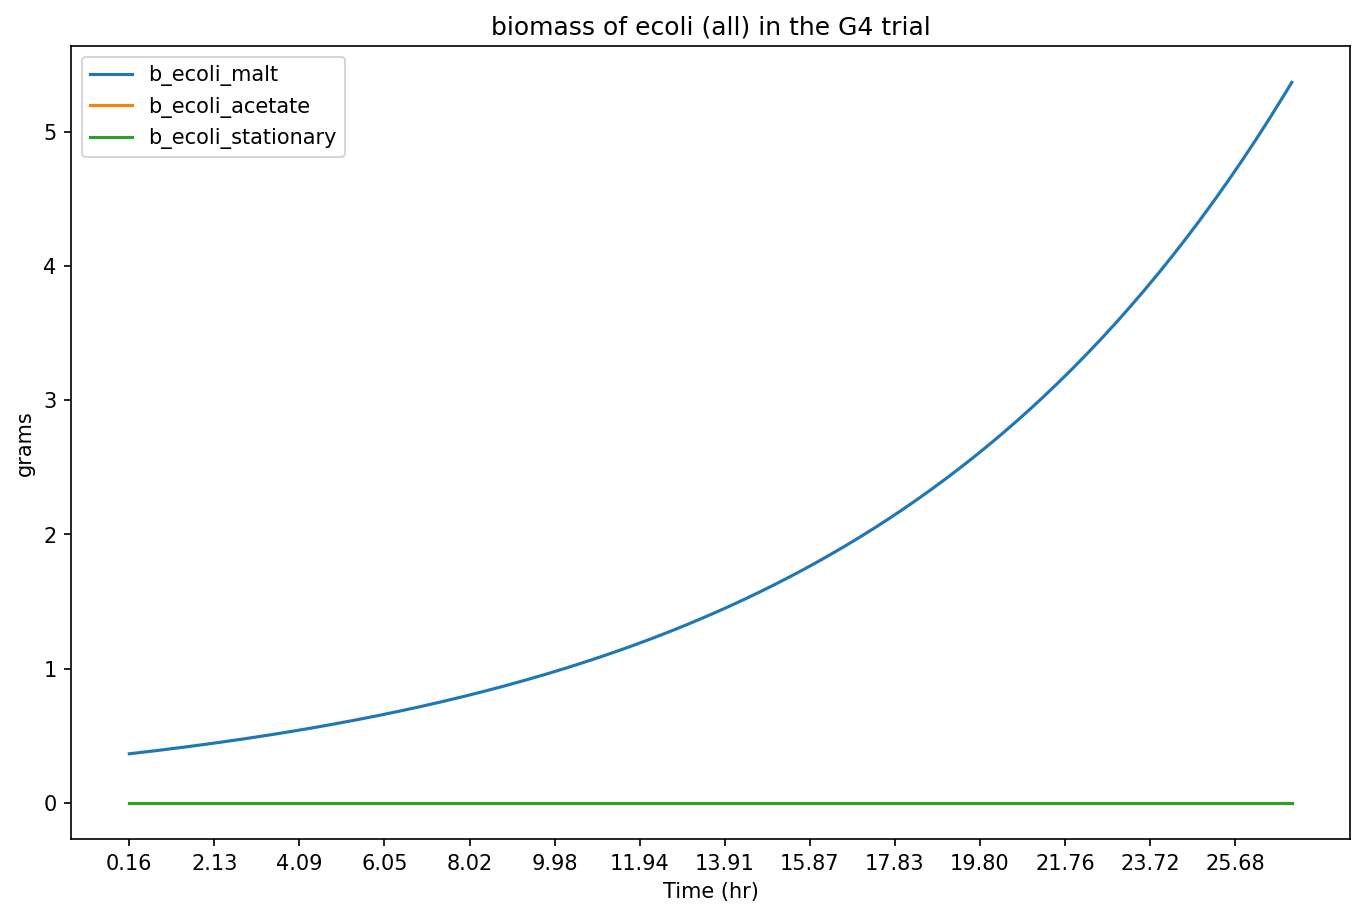

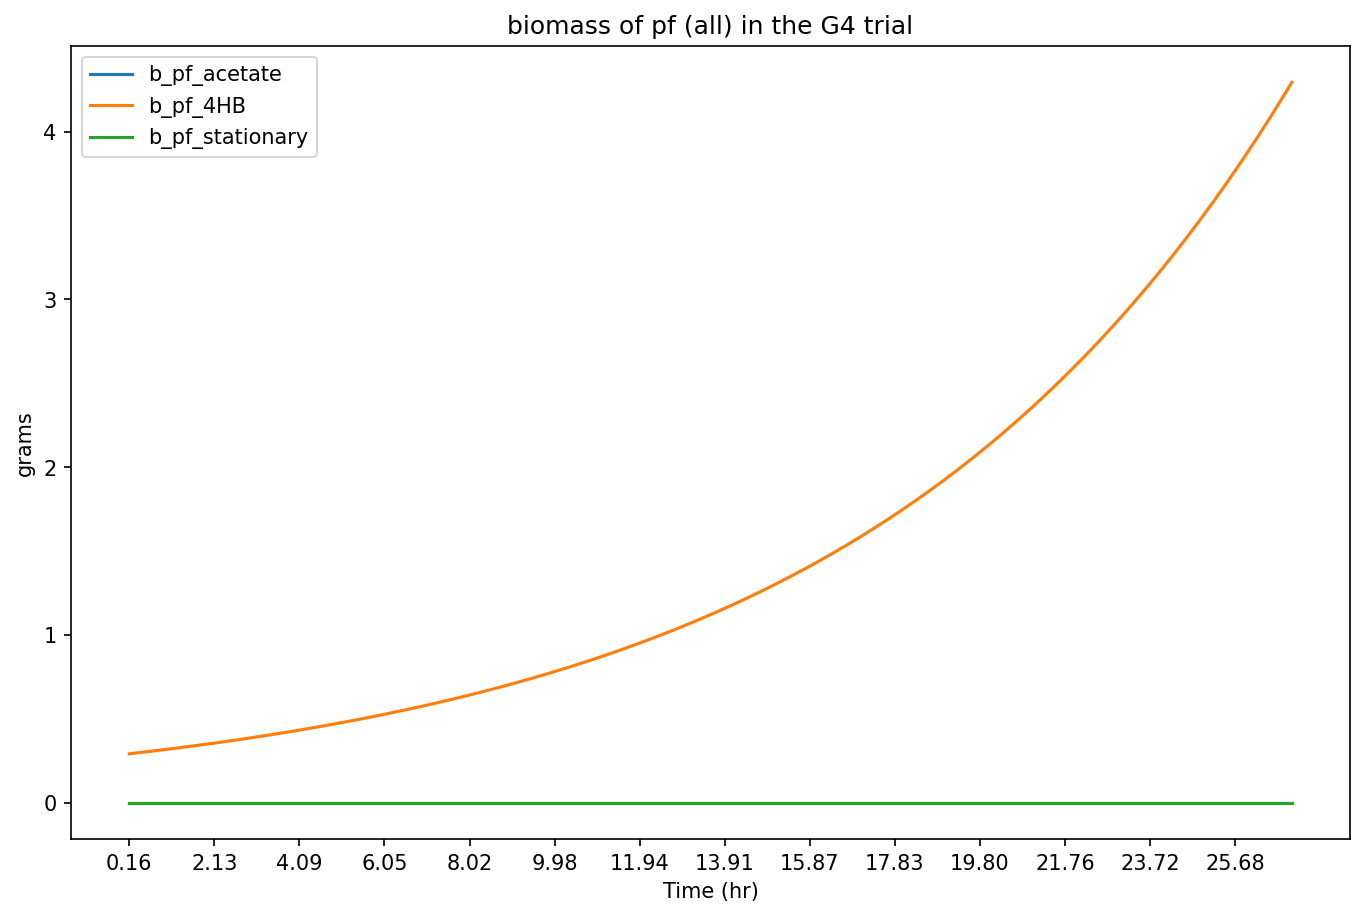

In [18]:
# for metabolite in fluxes_df['rxn'].to_list():
#     graphs.append({
#         'trial':'B5',
#         'content': metabolite,
#         'species': 'ecoli',
#         'phenotype': 'malt'
#     })
mscommfit.plots = []
graphs = [
    {
        'trial':'B4',
        'content': 'biomass',
        'species': 'ecoli',
        'phenotype': '*'
    },
    {
        'trial':'B4',
        'content': 'biomass',
        'species': 'pf',
        'phenotype': '*'
    },
    {
        'trial':'G4',
        'content': 'biomass',
        'species': 'ecoli',
        'phenotype': '*'
    },
    {
        'trial':'G4',
        'content': 'biomass',
        'species': 'pf',
        'phenotype': '*'
    }
]
mscommfit.graph(graphs, zip_name='simple_full_community.zip')

# OD plot

{'trial': 'B4', 'content': 'OD', 'experimental_data': True}
pred b_ecoli_malt
pred b_ecoli_acetate
pred b_pf_acetate
pred b_pf_4HB
pred b_ecoli_stationary
pred b_pf_stationary
exp


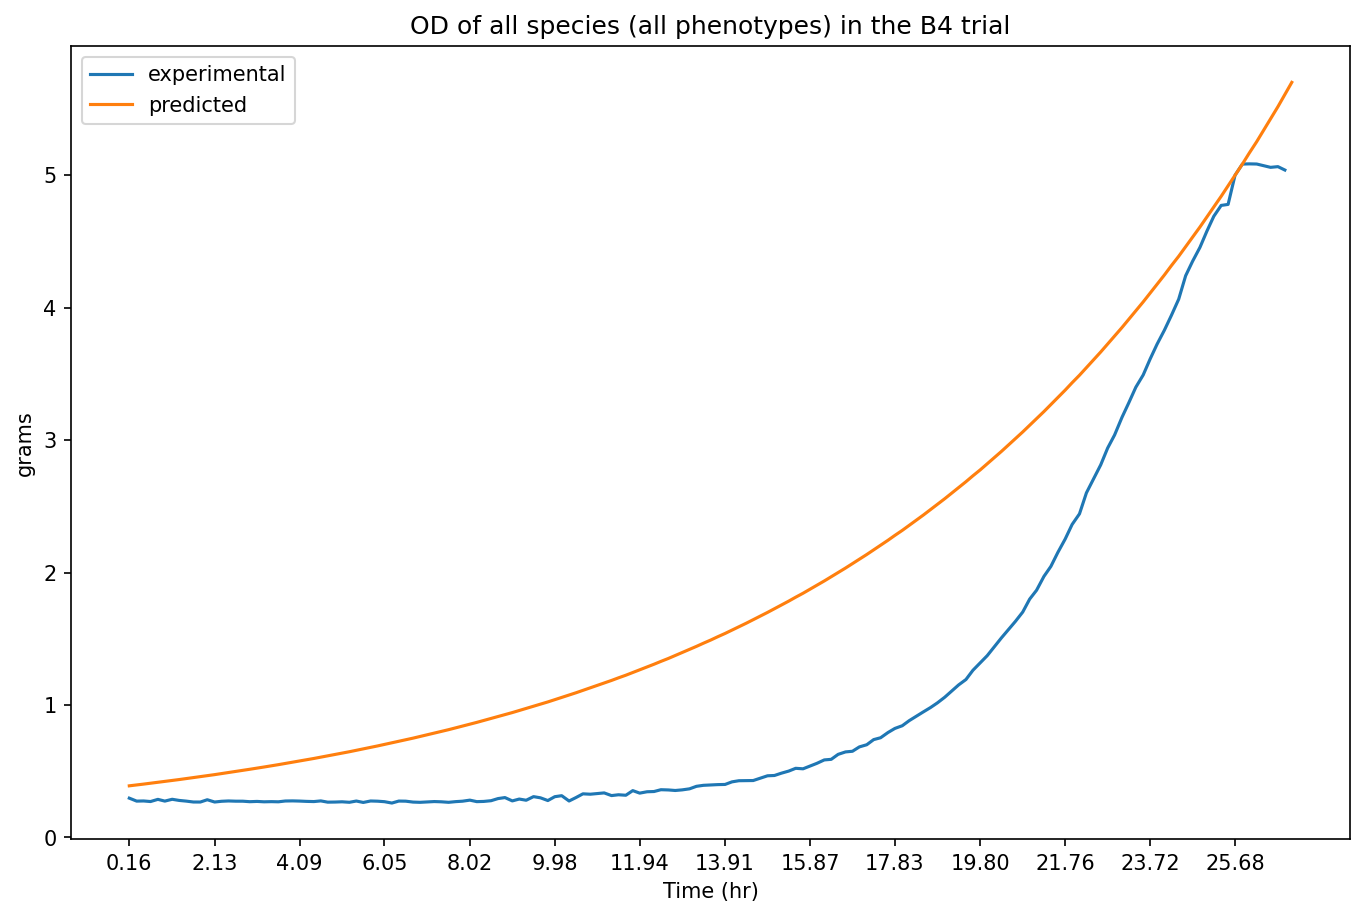

In [37]:
# for metabolite in fluxes_df['rxn'].to_list():
#     graphs.append({
#         'trial':'B5',
#         'content': metabolite,
#         'species': 'ecoli',
#         'phenotype': 'malt'
#     })
%run ../mscommfitting.py
mscommfit = MSCommFitting()
# mscommfit.load_model(mscomfit_json_path='mscommfitting.json', zip_name='simple_full_community.zip')
graphs = [
    {
        'trial':'B4',
        'content': 'OD',
        'experimental_data': True
    }
]
mscommfit.graph(graphs, 
                primal_values_filename = 'primal_values.json',
                primal_values_zip_path = 'simple_full_community.zip',
                zip_name='simple_full_community.zip')

# Change the parameters

In [43]:
%run ../mscommfitting.py

mscommfit.change_parameters(cvt=2)
%time mscommfit.compute(graphs, 'simple_full_community_edited.zip')
print('growth:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

Exception: File `'../mscommfitting.pymscommfit.change_parameters(cvt=2).py'` not found.

# ~half time

The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
The ['C2', 'C12', 'G3'] trials were dropped from the ecoli measurements.
The ['B2', 'B12', 'D2', 'D12', 'E2', 'E12', 'F2', 'F12', 'G2', 'G12'] trials were removed from the ecoli measurements, with their deviation over time being less than the threshold of 2.
The ['C2', 'C12', 'G3'] trials were dropped from the pf measurements.
The ['B2', 'B3', 'B12', 'D2', 'D12', 'E12', 'F12', 'G12'] trials were removed from the pf measurements, with their deviation over time being less than the threshold of 2.
The ['C2', 'C12', 'G3'] trials were dropped from the OD measurements.
2022-07-10 15:53:40.731988
Done with biomass loop: 1.3111979166666667 min
Done with metabolites loop: 19.305989583333332 min
Done with the dbc & diffc loop: 0.6252604166666667 min
Done with loading the variables, constraints, and objective: 5.464322916666666 min
Done exporting the content: 1.0713541666666666 min
2022-07-10 16:21:30.641493
{'trial': 'B5', 'co

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:457: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = pyplot.subplots()


{'trial': 'B5', 'content': 'EX_cpd00254_e0', 'species': 'ecoli', 'phenotype': 'malt'}
c_bio
c_EX_cpd00007_e0
c_EX_cpd00009_e0
c_EX_cpd00011_e0
c_EX_cpd00013_e0
c_EX_cpd00029_e0
c_EX_cpd00030_e0
c_EX_cpd00034_e0
c_EX_cpd00048_e0
c_EX_cpd00058_e0
c_EX_cpd00063_e0
c_EX_cpd00067_e0
c_EX_cpd00099_e0
c_EX_cpd00104_e0
c_EX_cpd00116_e0
c_EX_cpd00136_e0
c_EX_cpd00149_e0
c_EX_cpd00179_e0
c_EX_cpd00205_e0
c_EX_cpd00244_e0
c_EX_cpd00254_e0
3
c_EX_cpd02701_c0
c_EX_cpd10515_e0
c_EX_cpd11416_c0
c_EX_cpd11574_e0
cvf_ecoli_malt
cvt_ecoli_malt
b_ecoli_malt
g_ecoli_malt
cvf_ecoli_acetate
cvt_ecoli_acetate
b_ecoli_acetate
g_ecoli_acetate
cvf_pf_acetate
cvt_pf_acetate
b_pf_acetate
g_pf_acetate
cvf_pf_4HB
cvt_pf_4HB
b_pf_4HB
g_pf_4HB
b_ecoli_stationary
g_ecoli_stationary
b_pf_stationary
g_pf_stationary
RFP__bio
RFP__diffpos
RFP__diffneg
{'trial': 'B5', 'content': 'EX_cpd02701_c0', 'species': 'ecoli', 'phenotype': 'malt'}
c_bio
c_EX_cpd00007_e0
c_EX_cpd00009_e0
c_EX_cpd00011_e0
c_EX_cpd00013_e0
c_EX_cpd00029

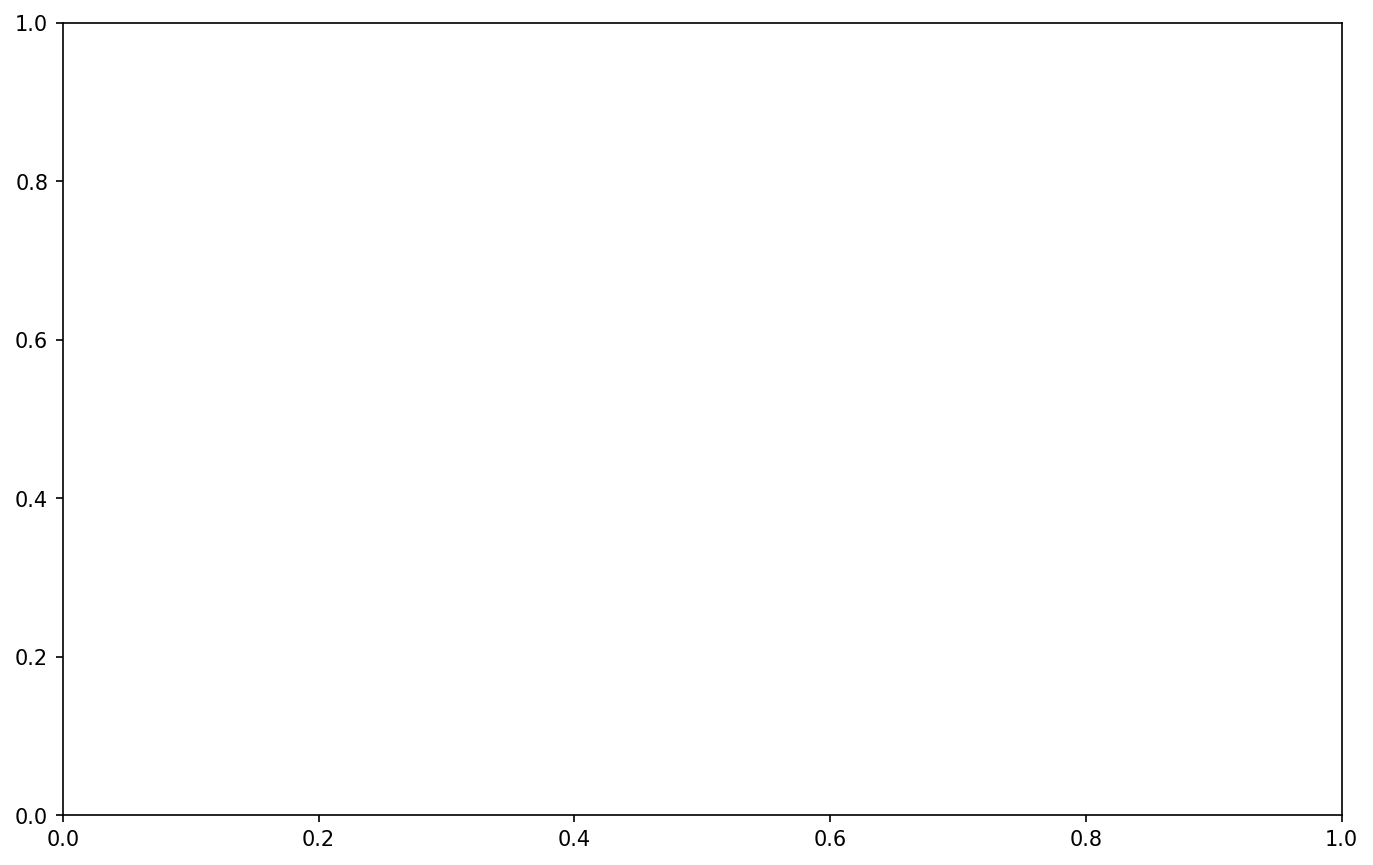

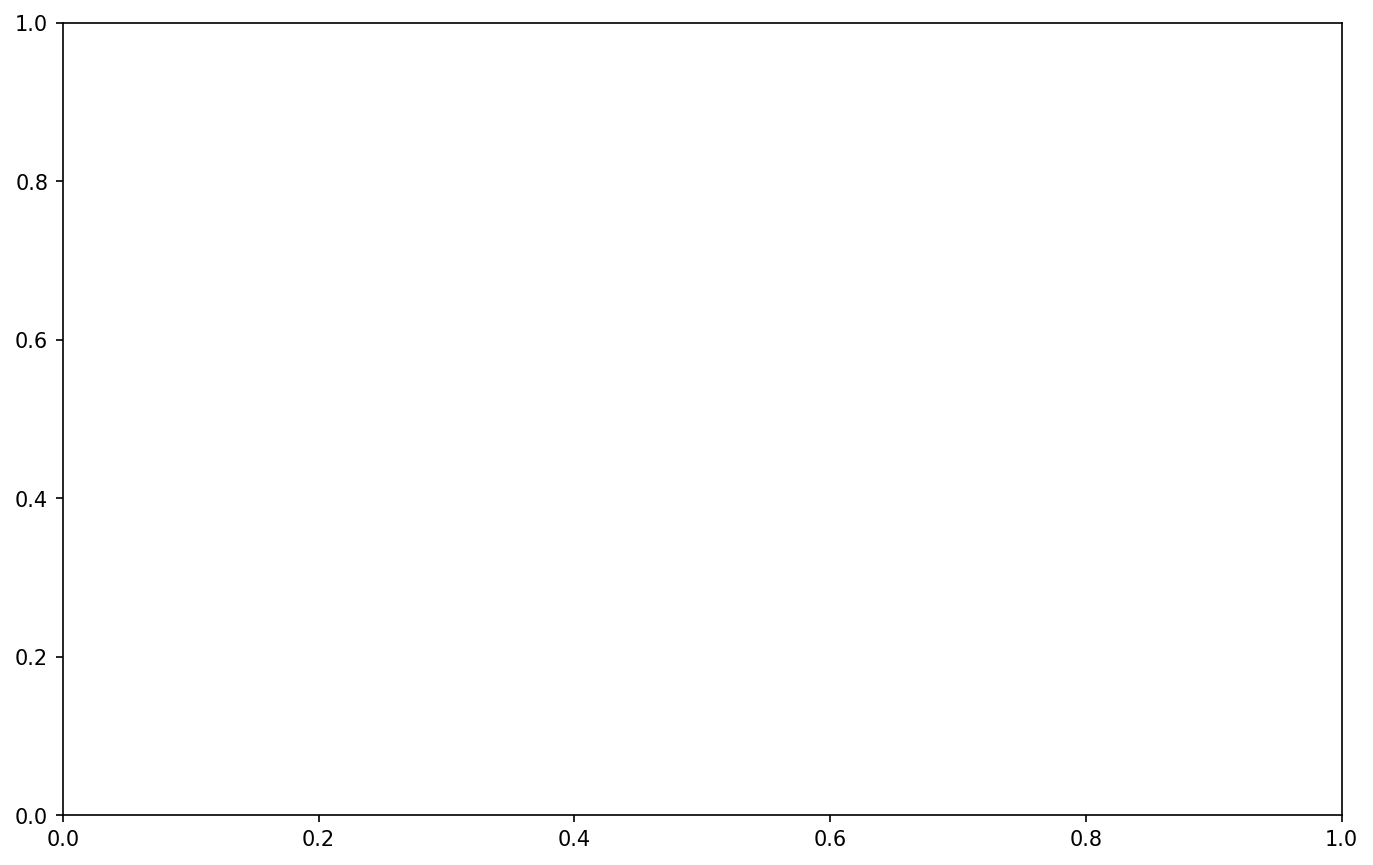

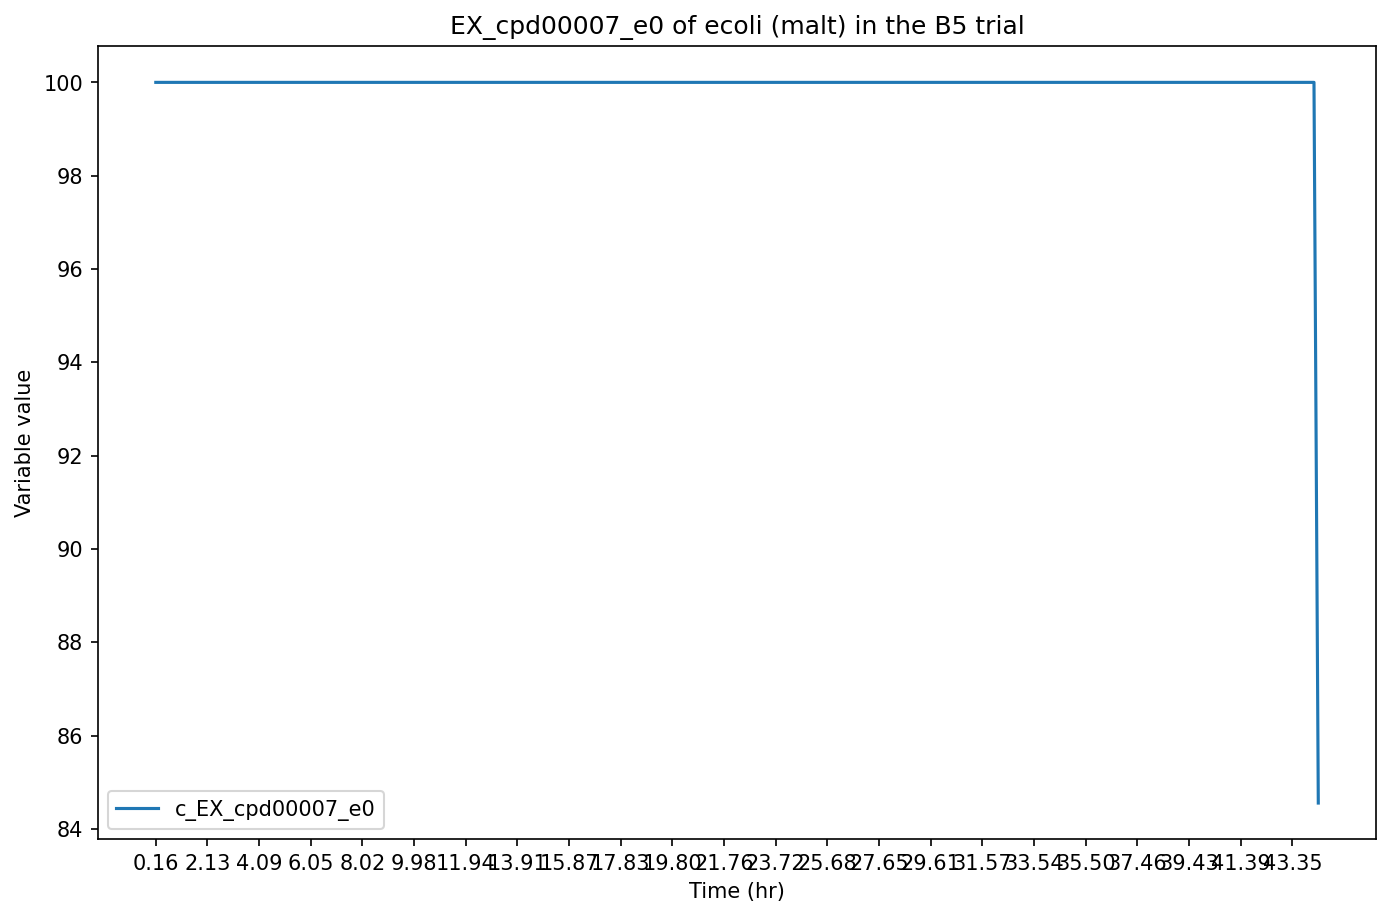

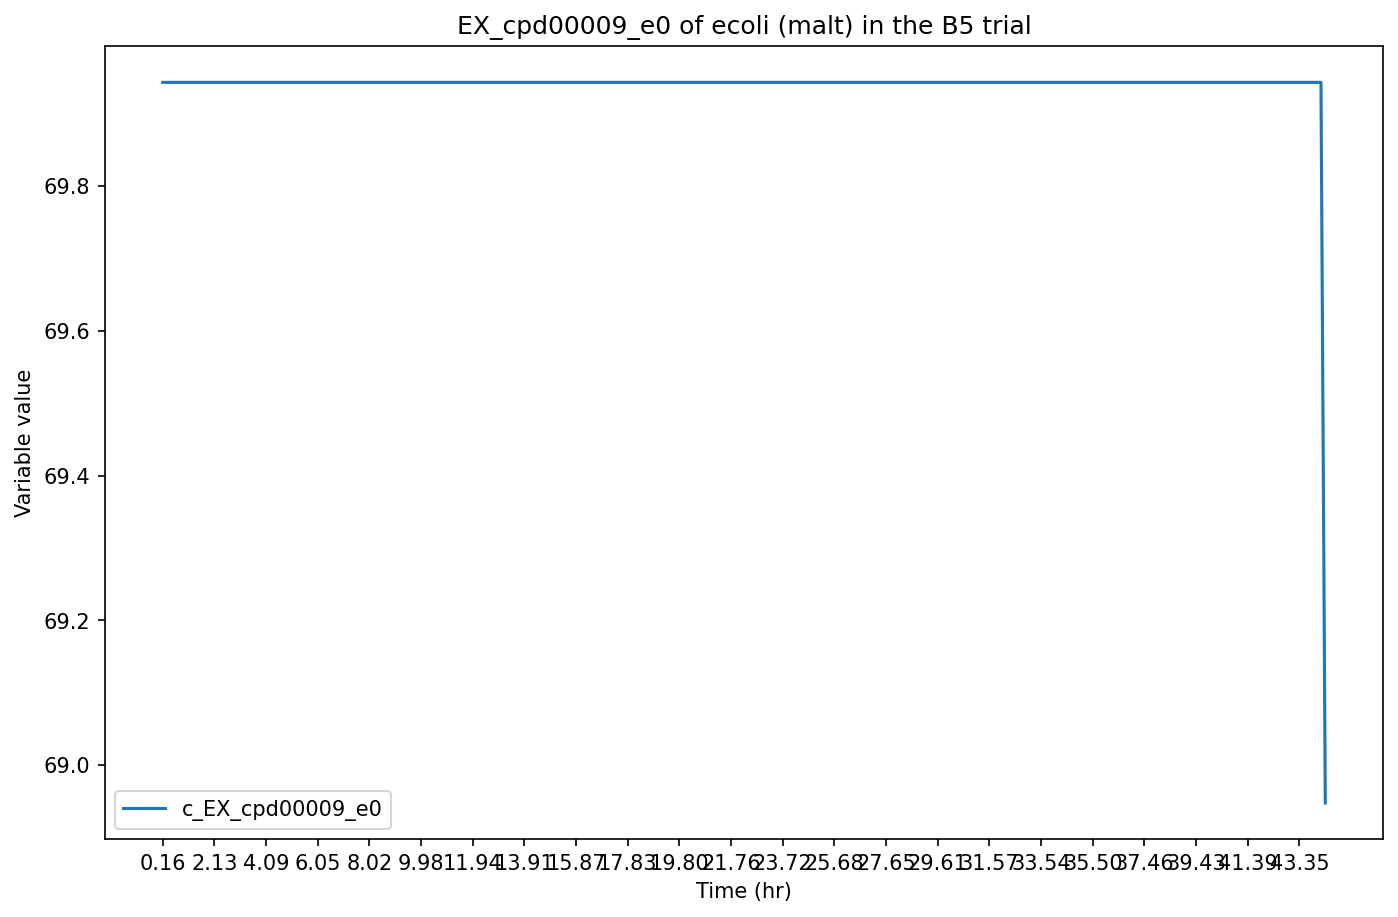

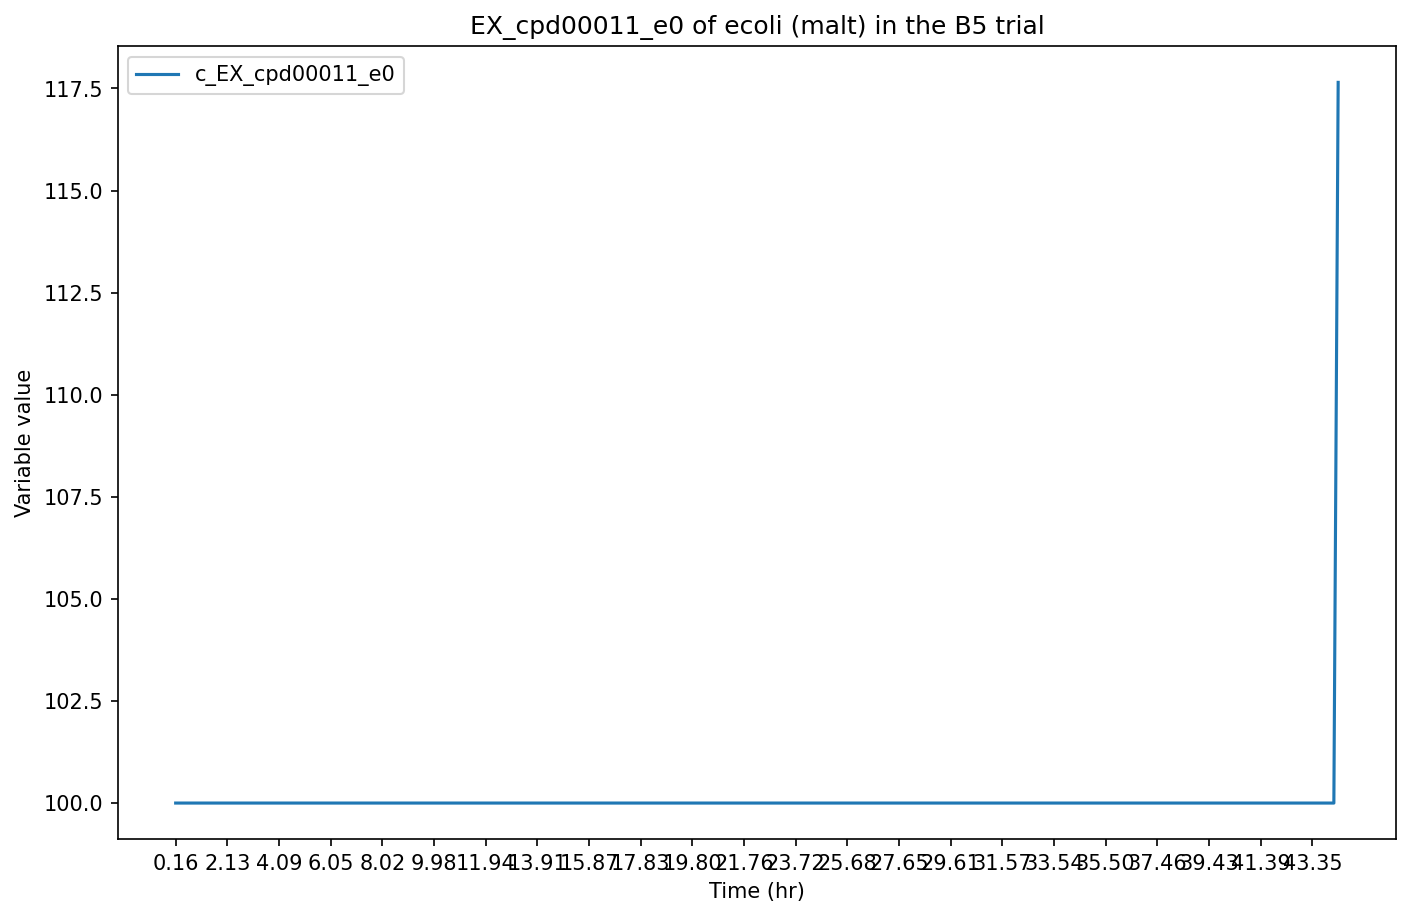

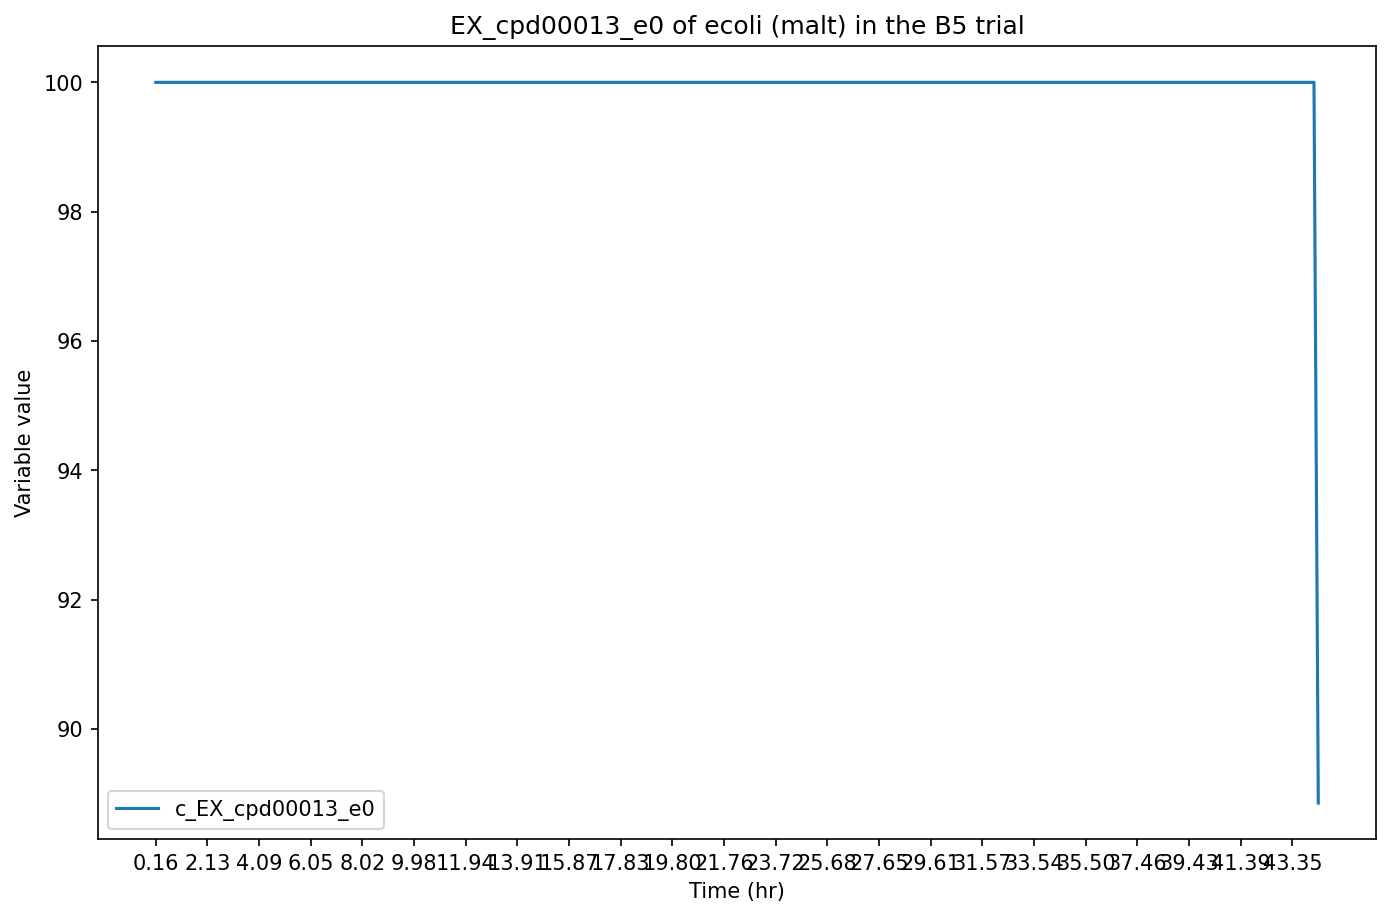

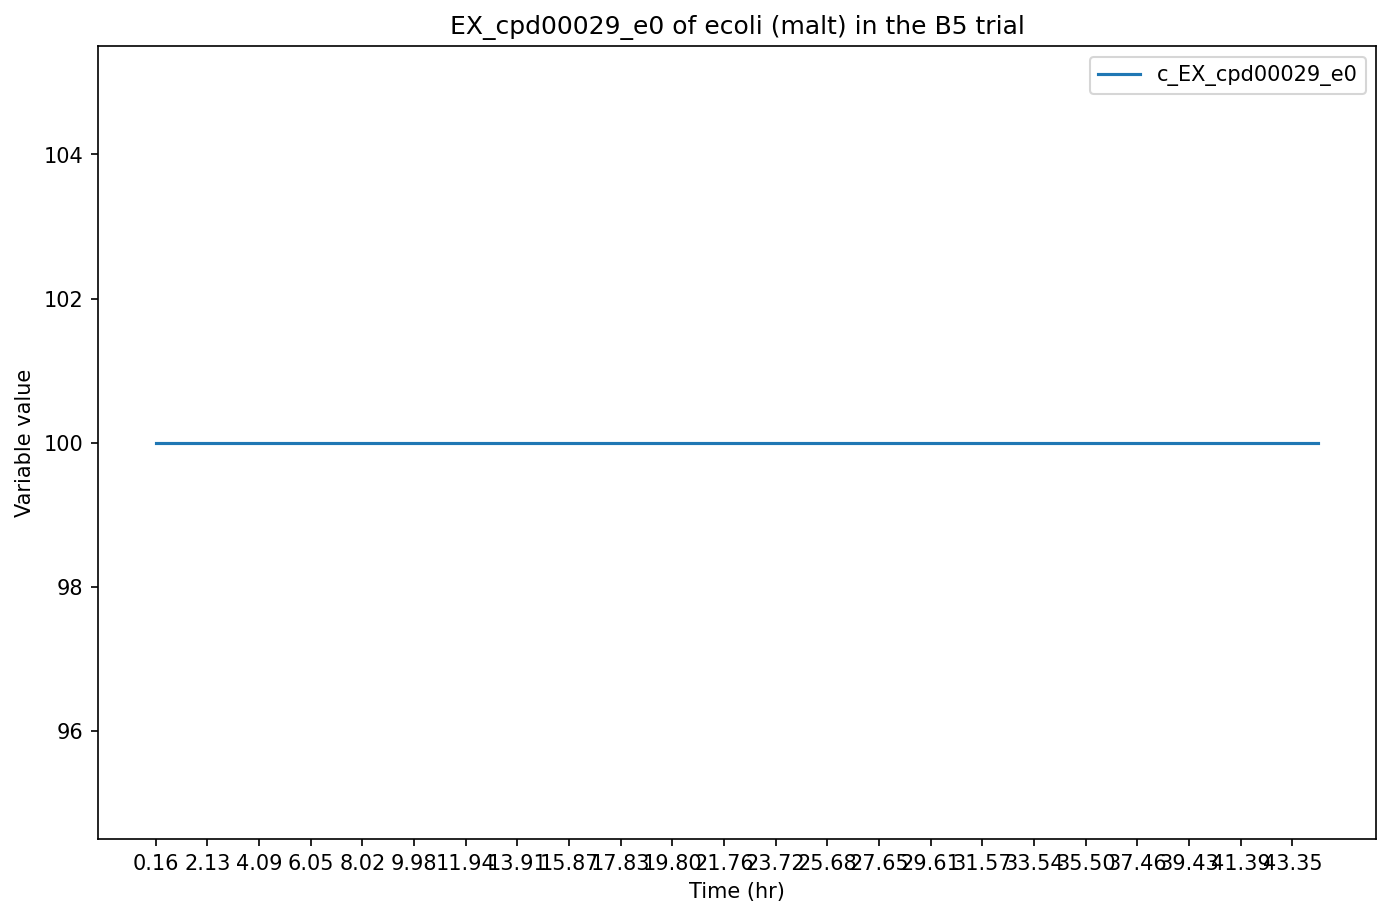

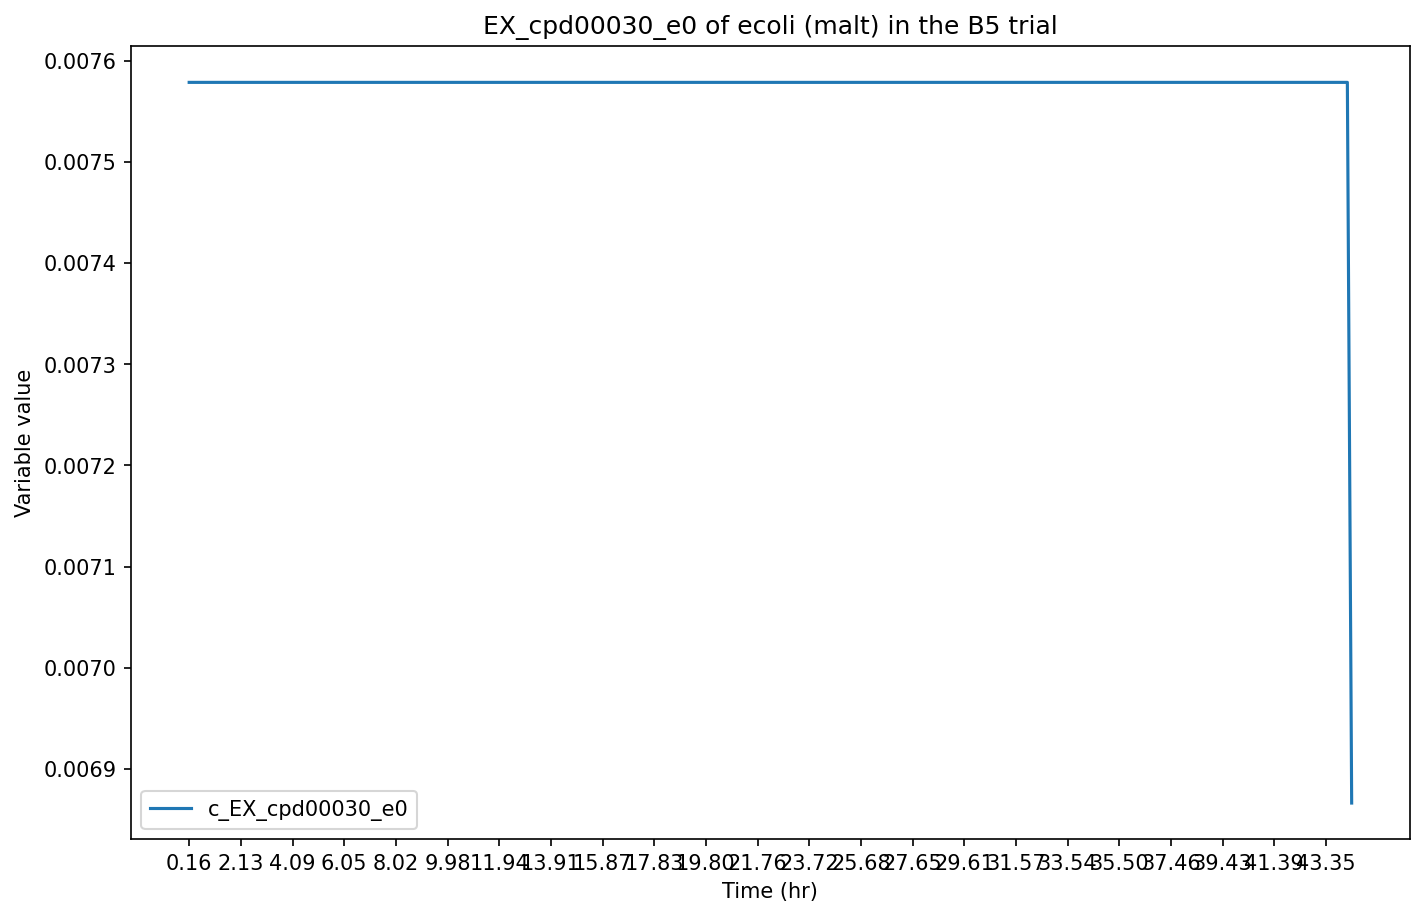

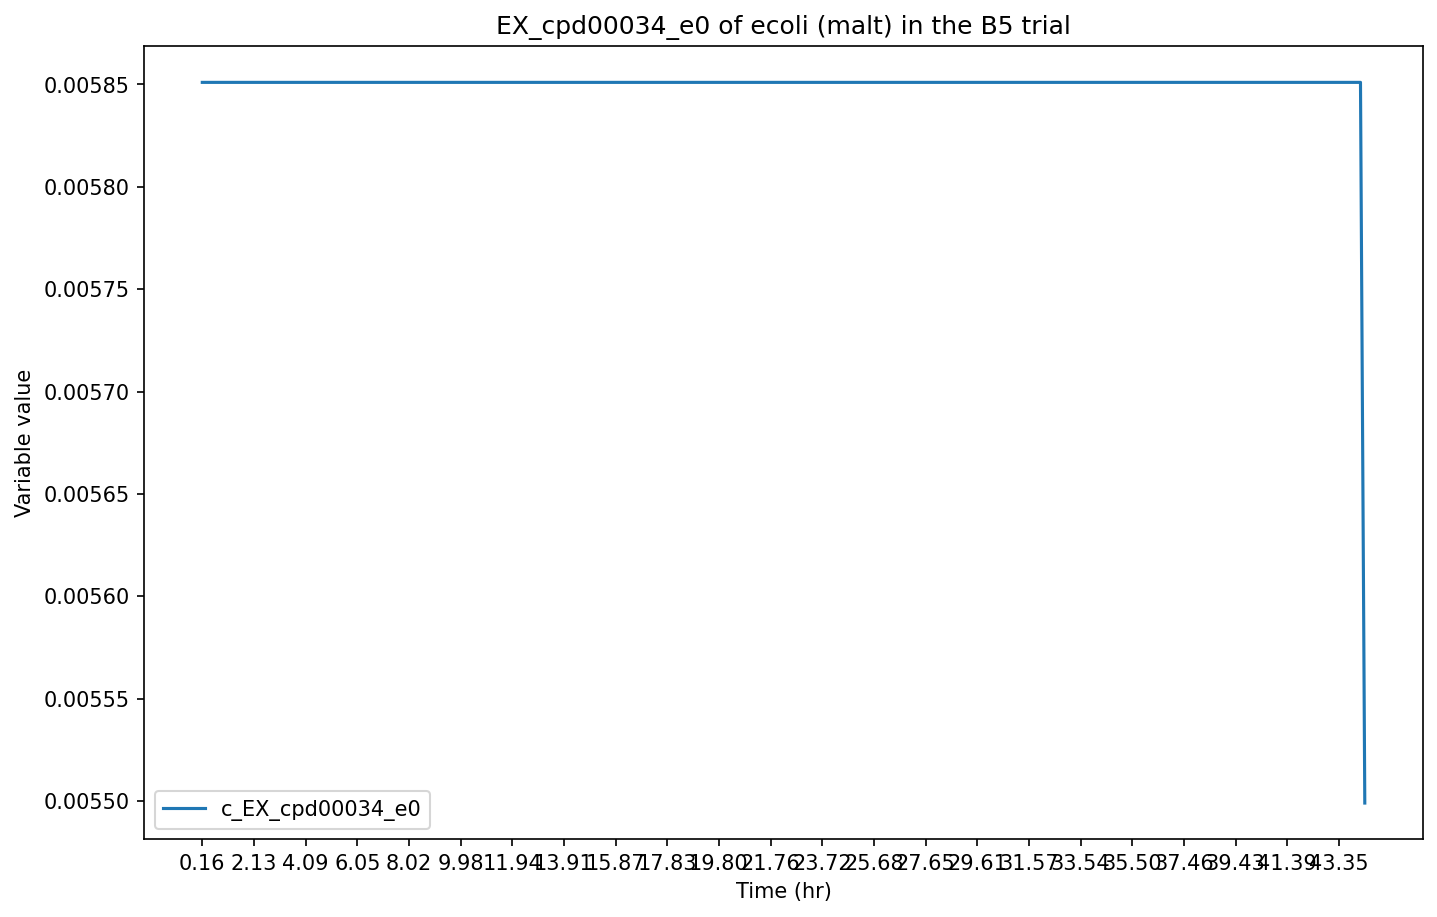

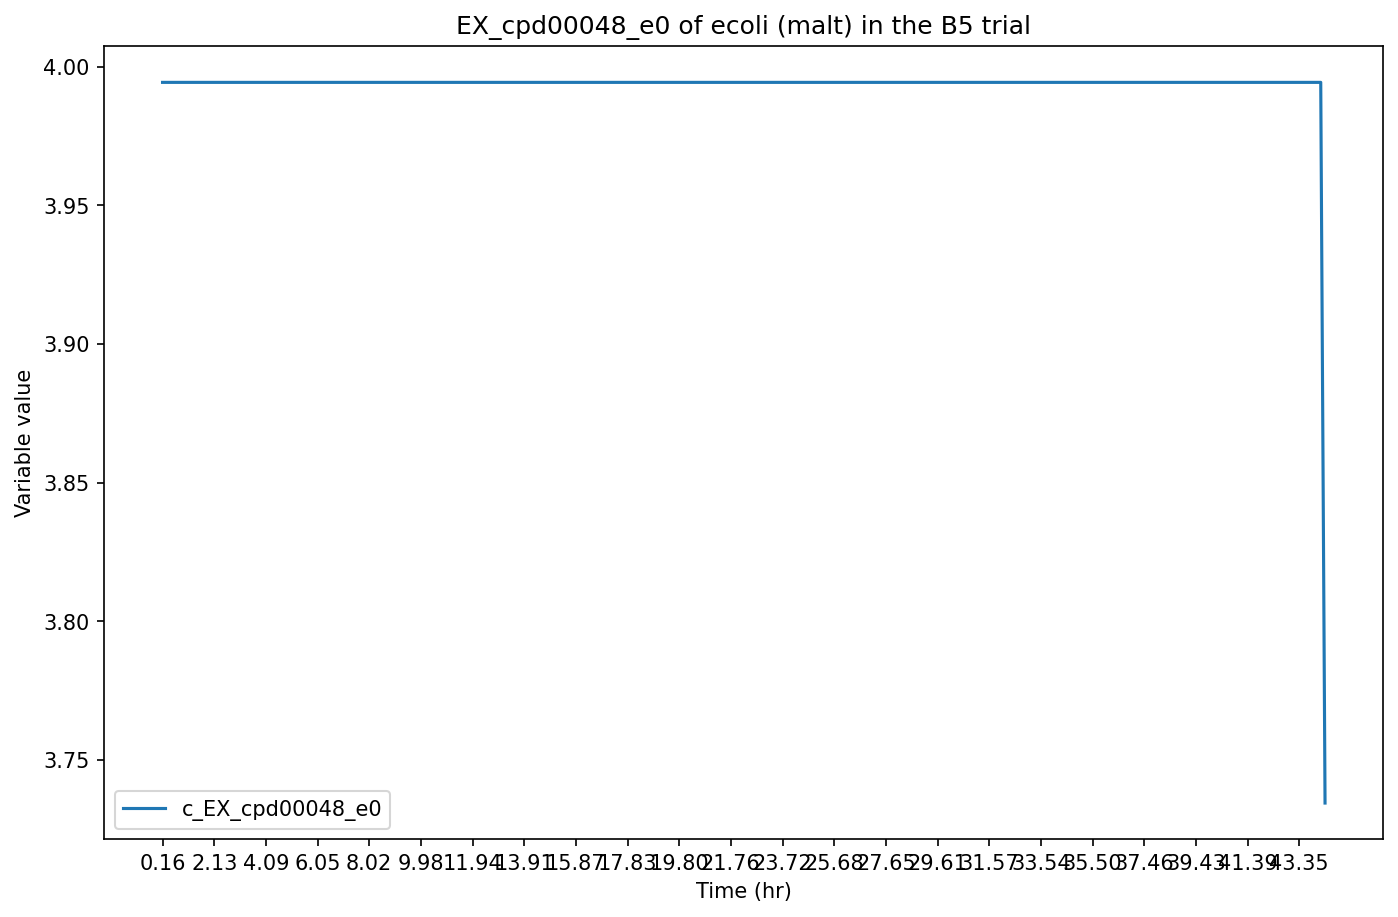

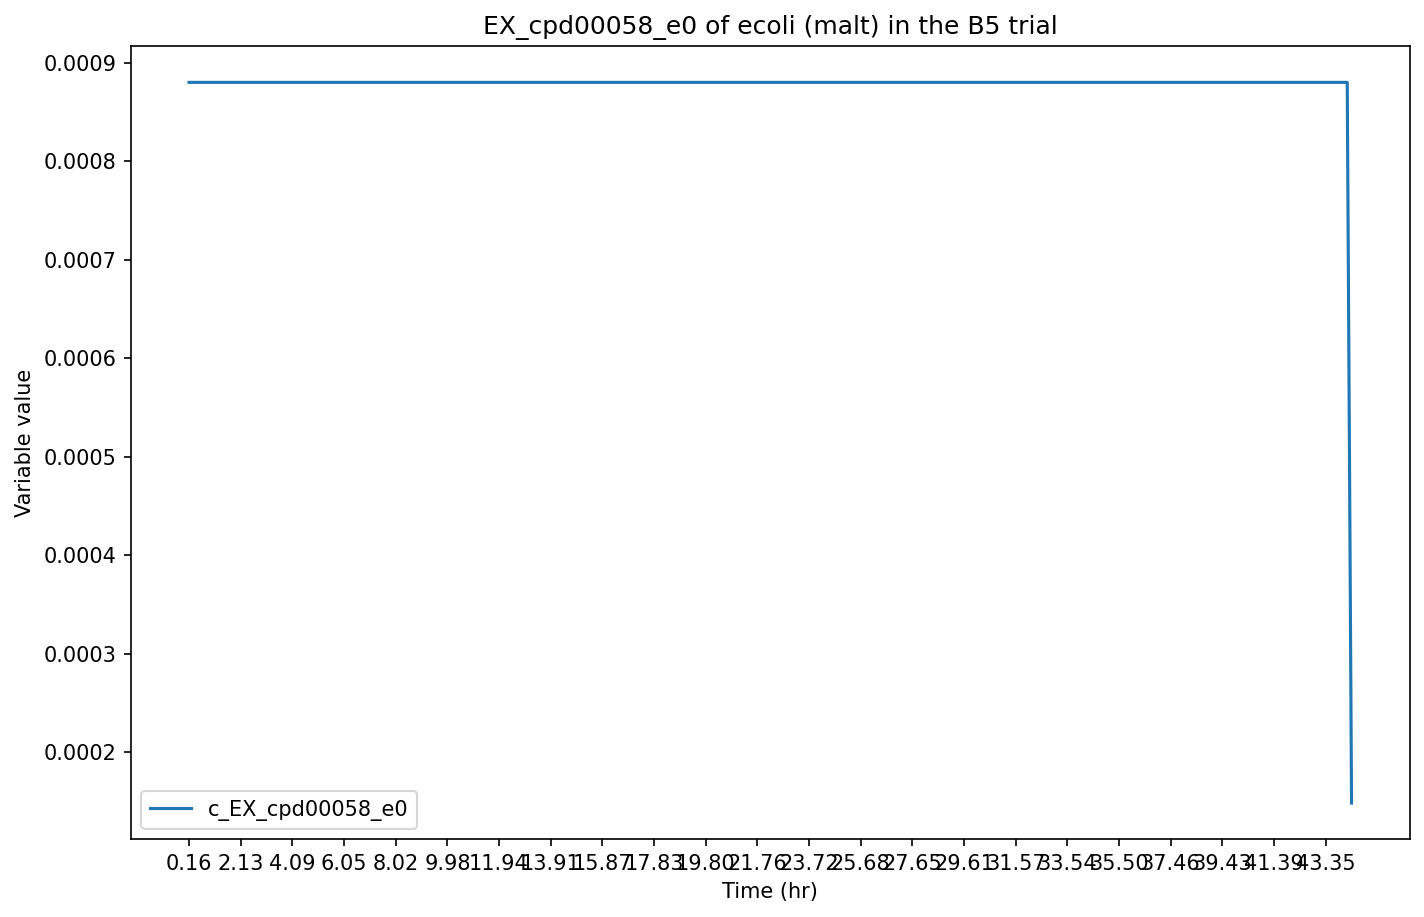

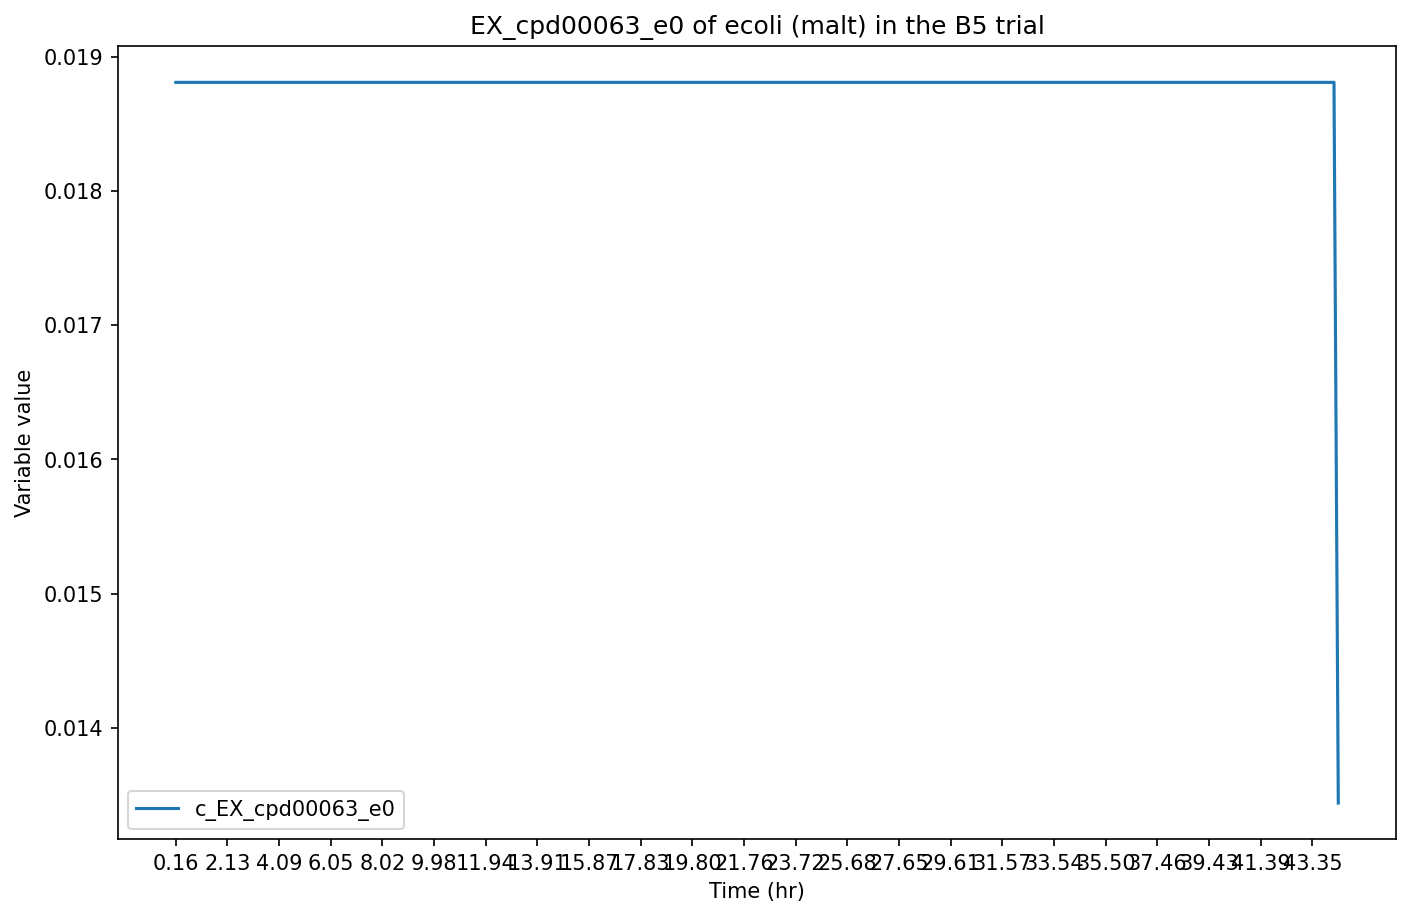

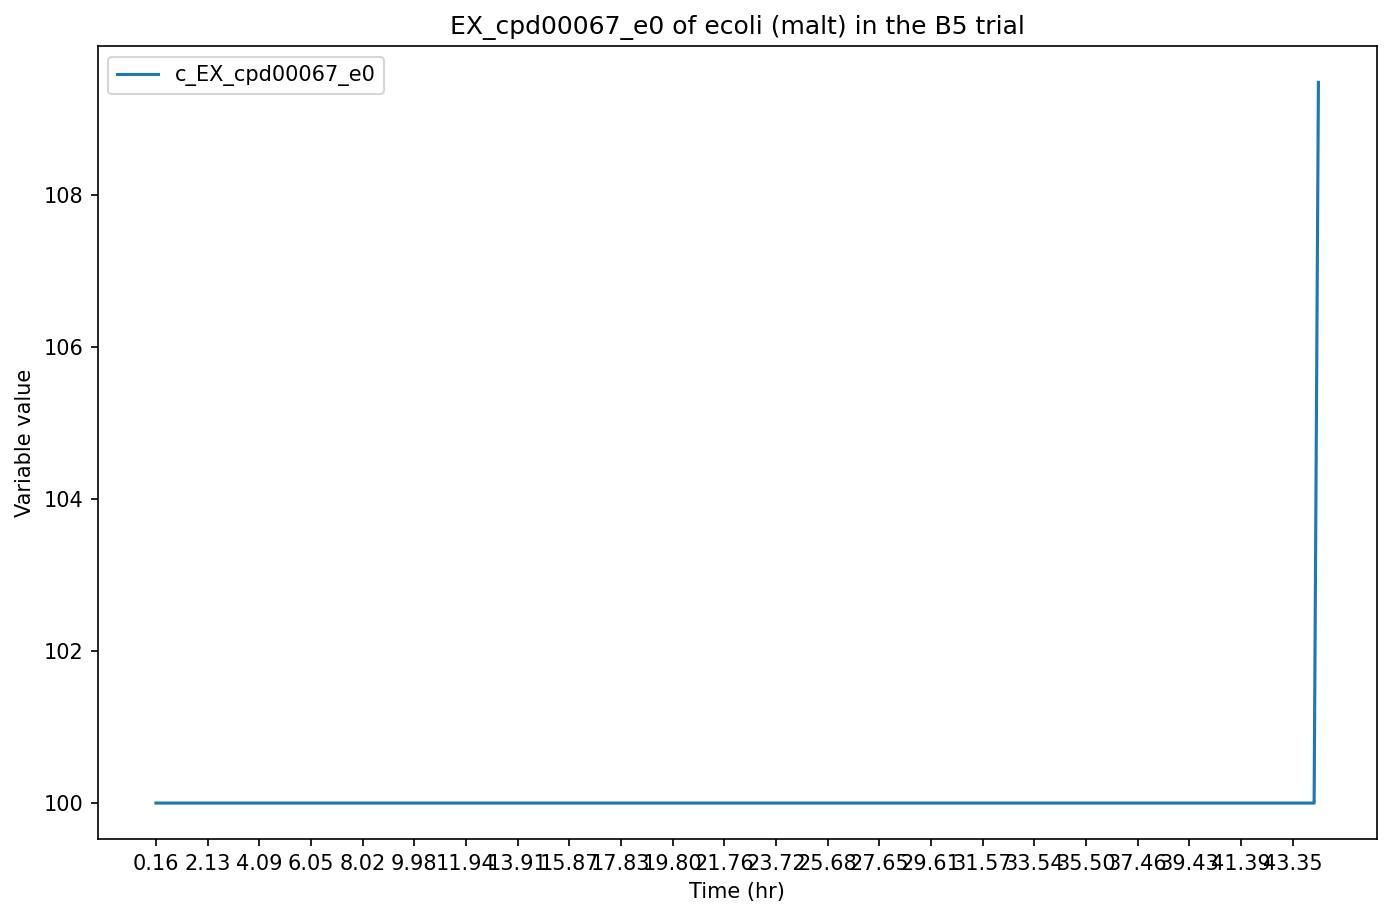

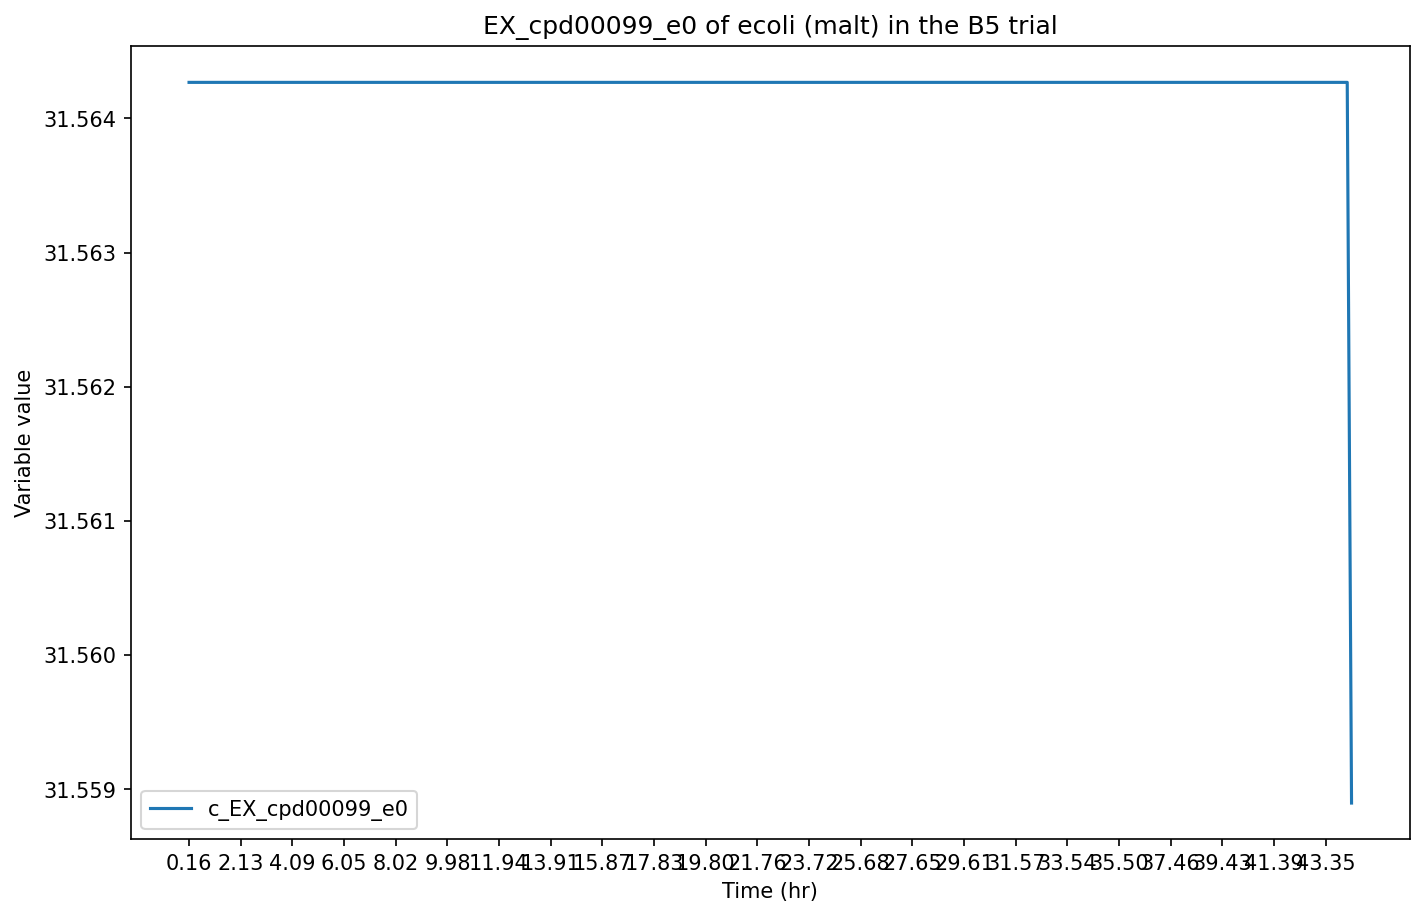

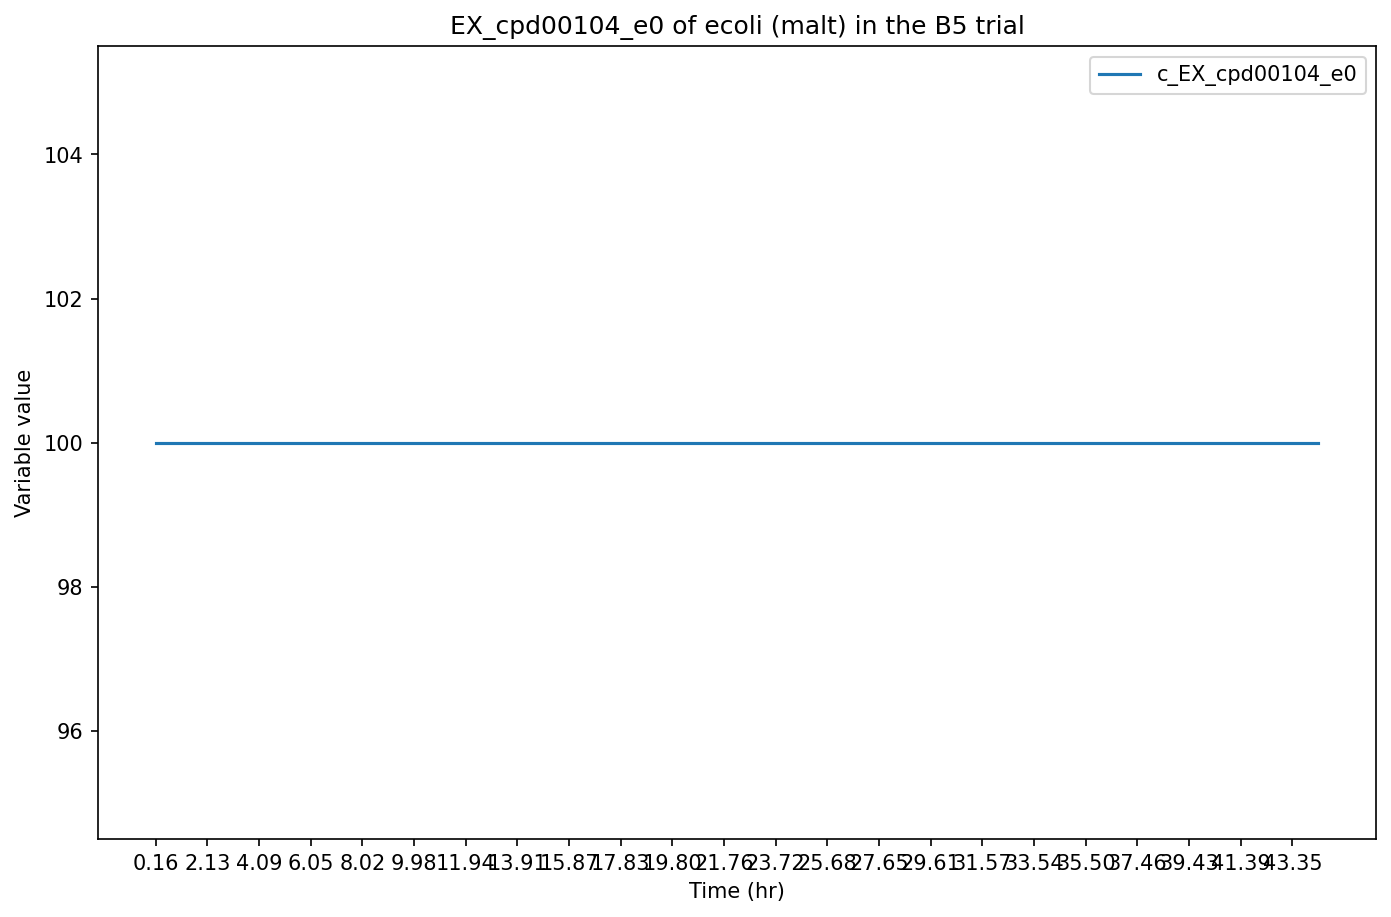

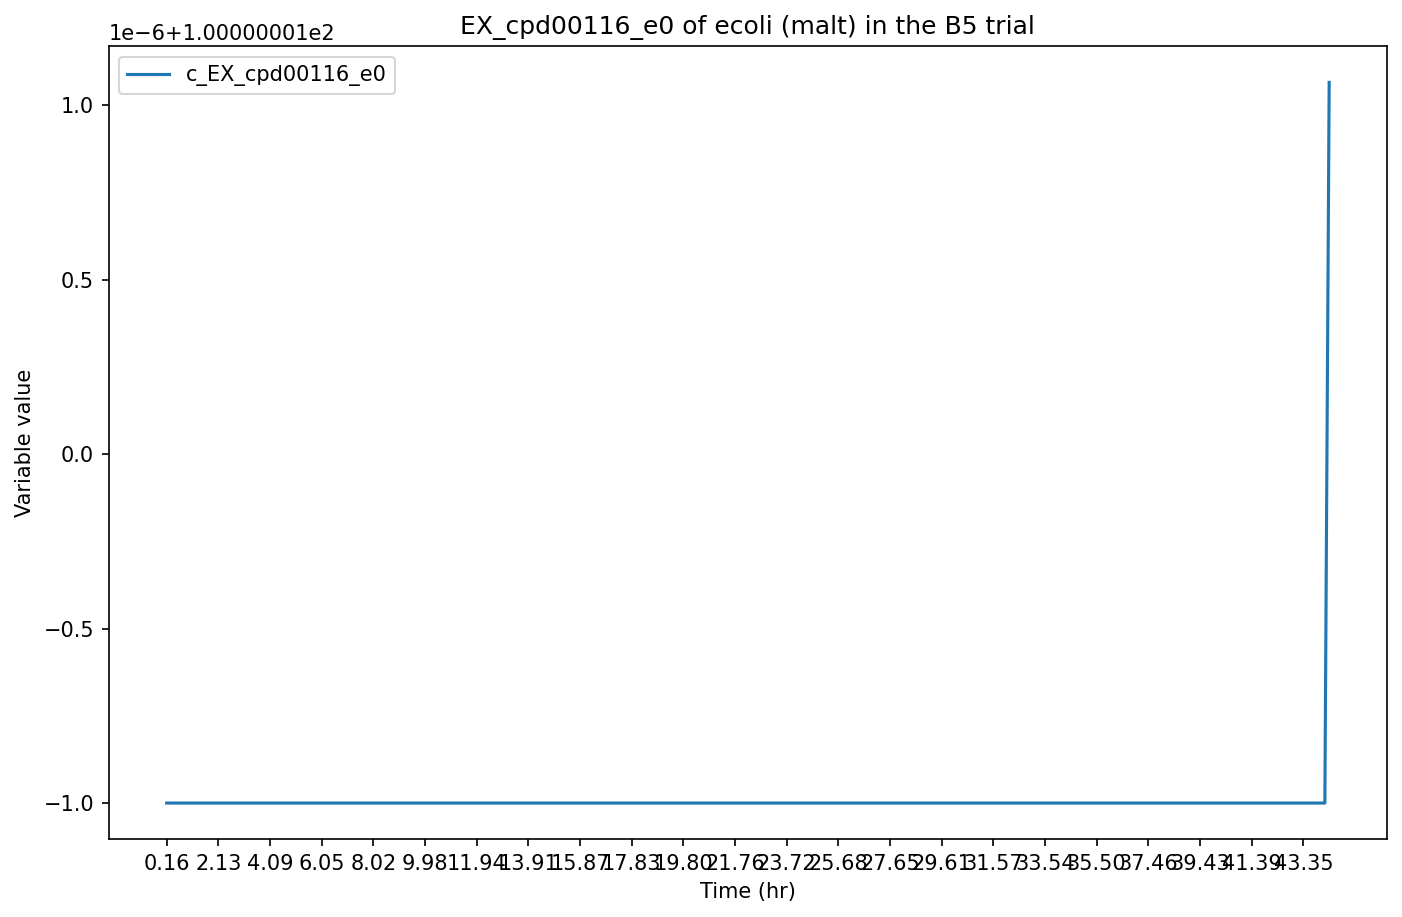

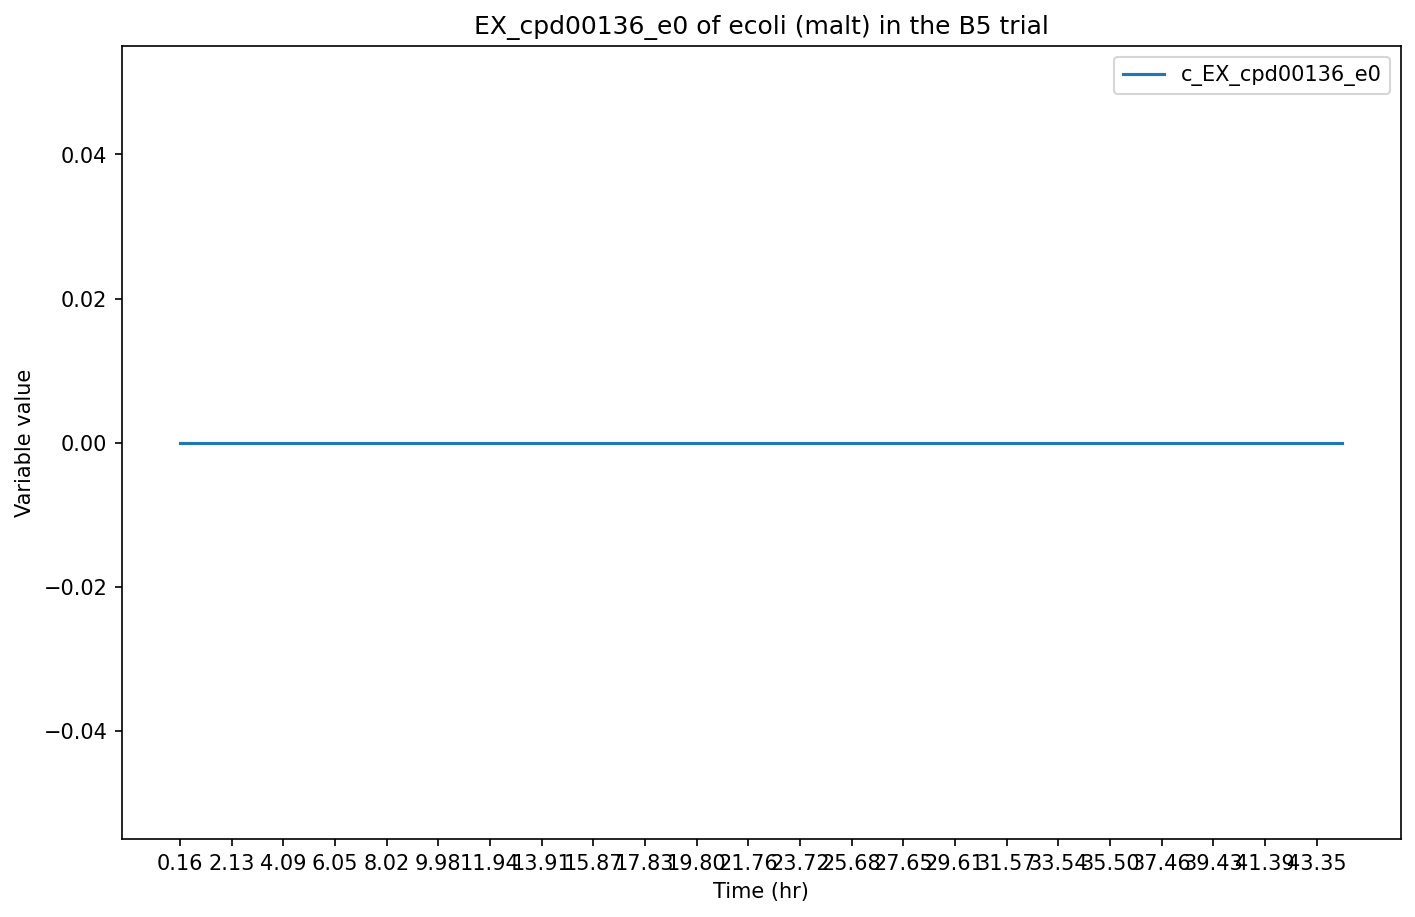

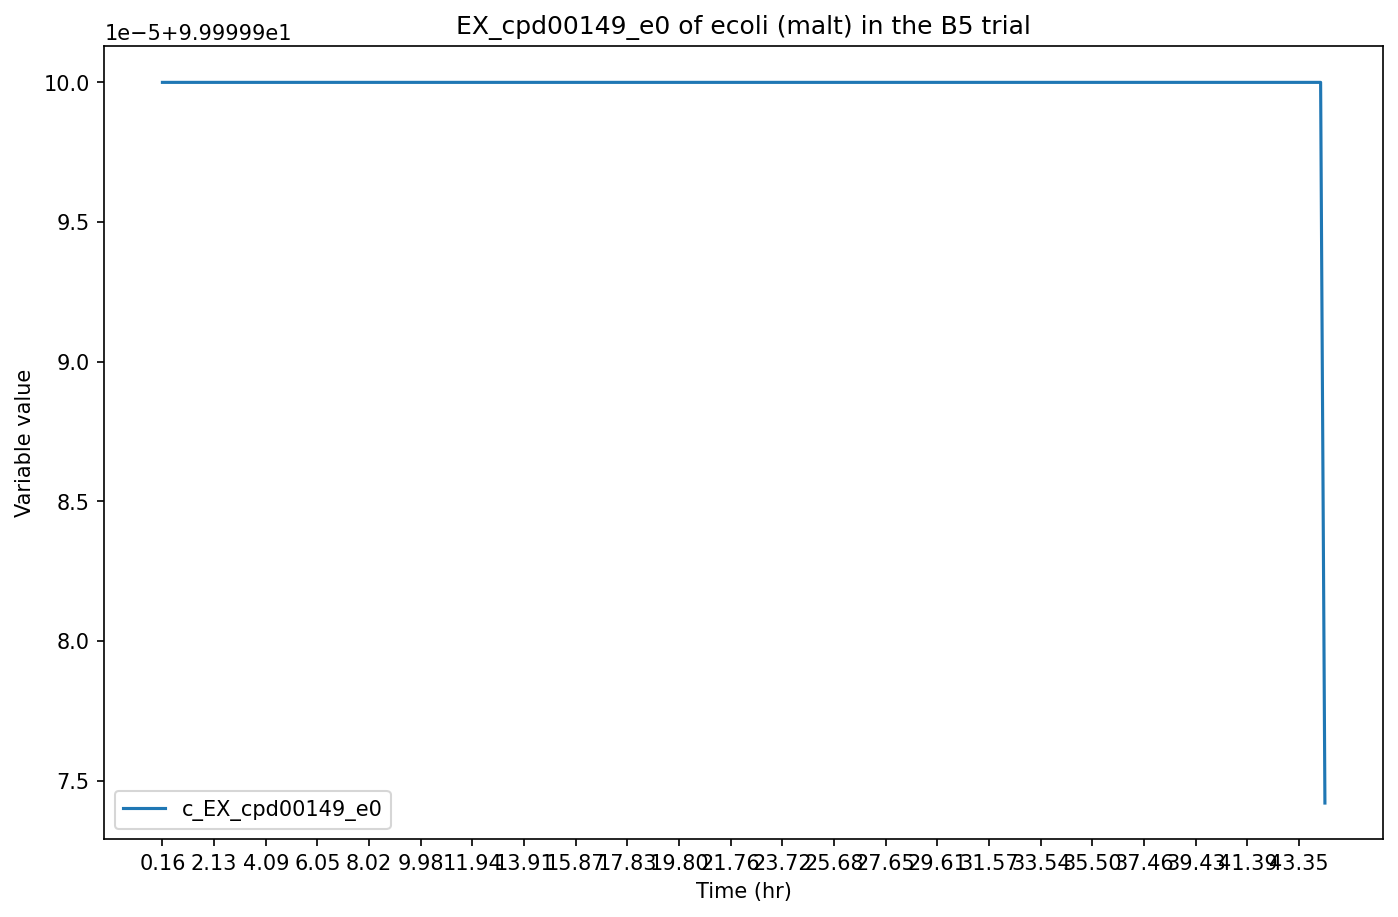

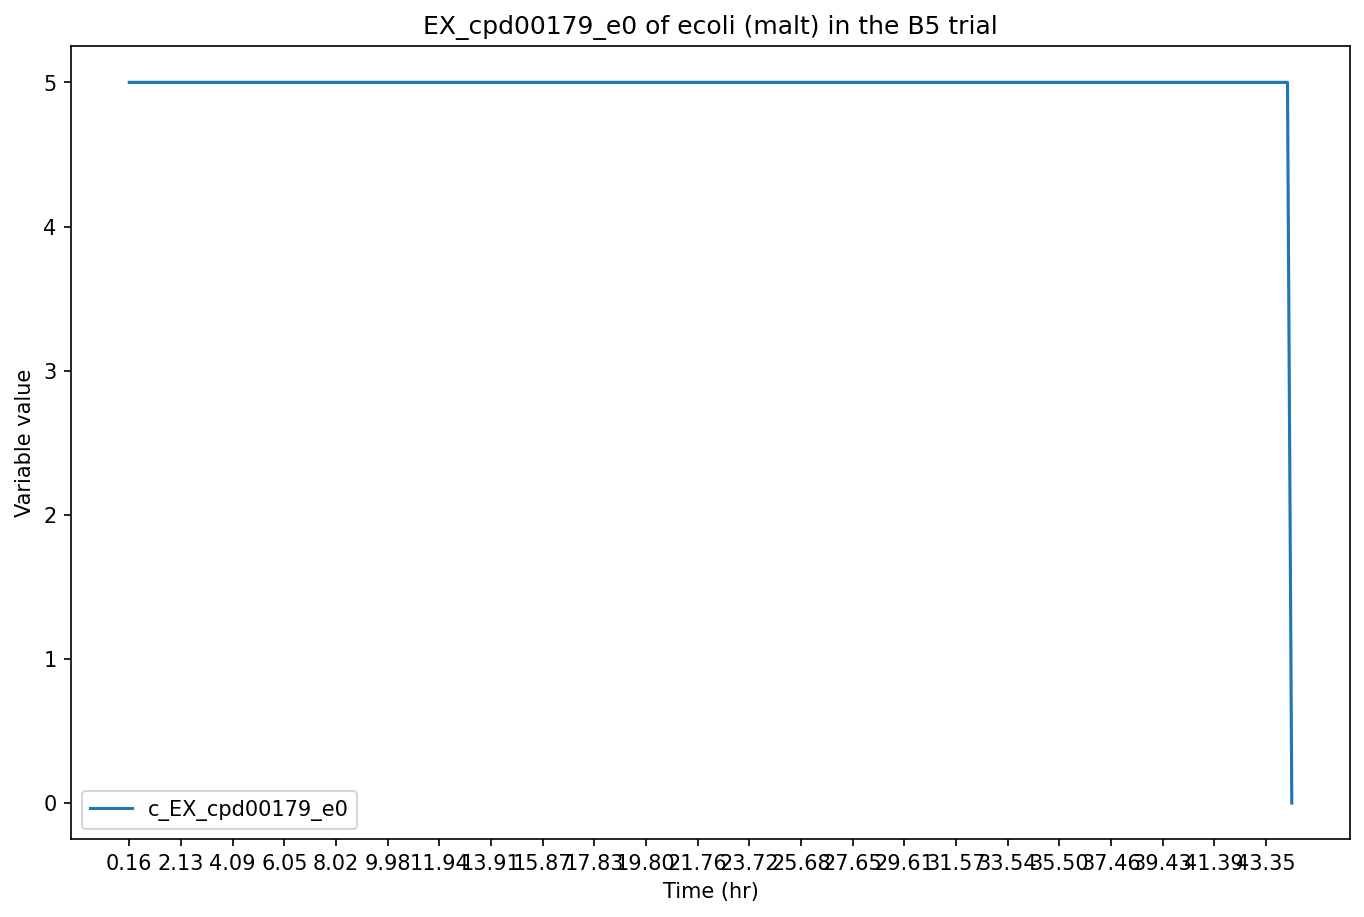

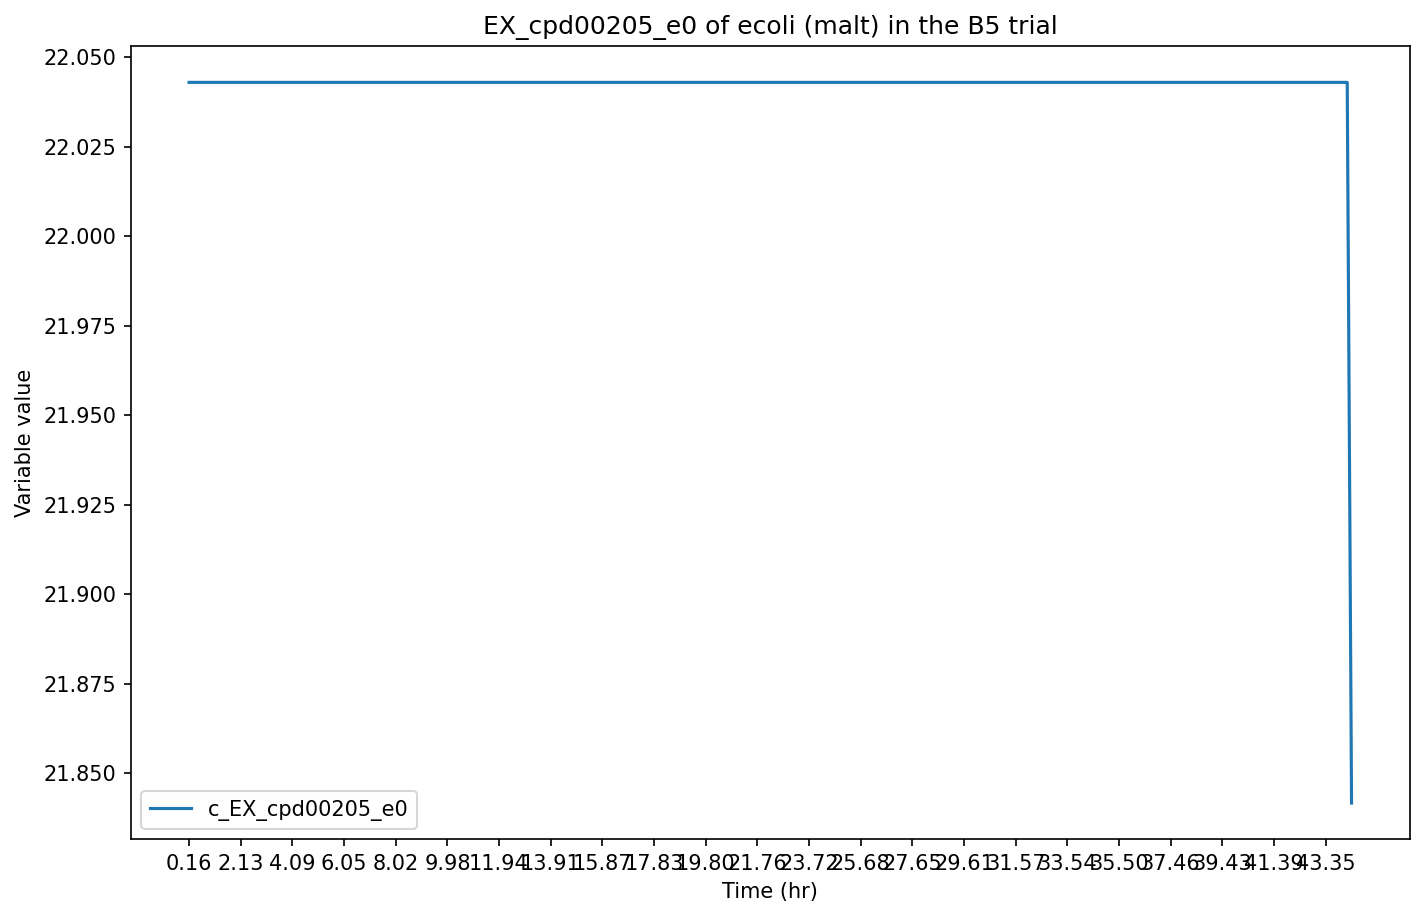

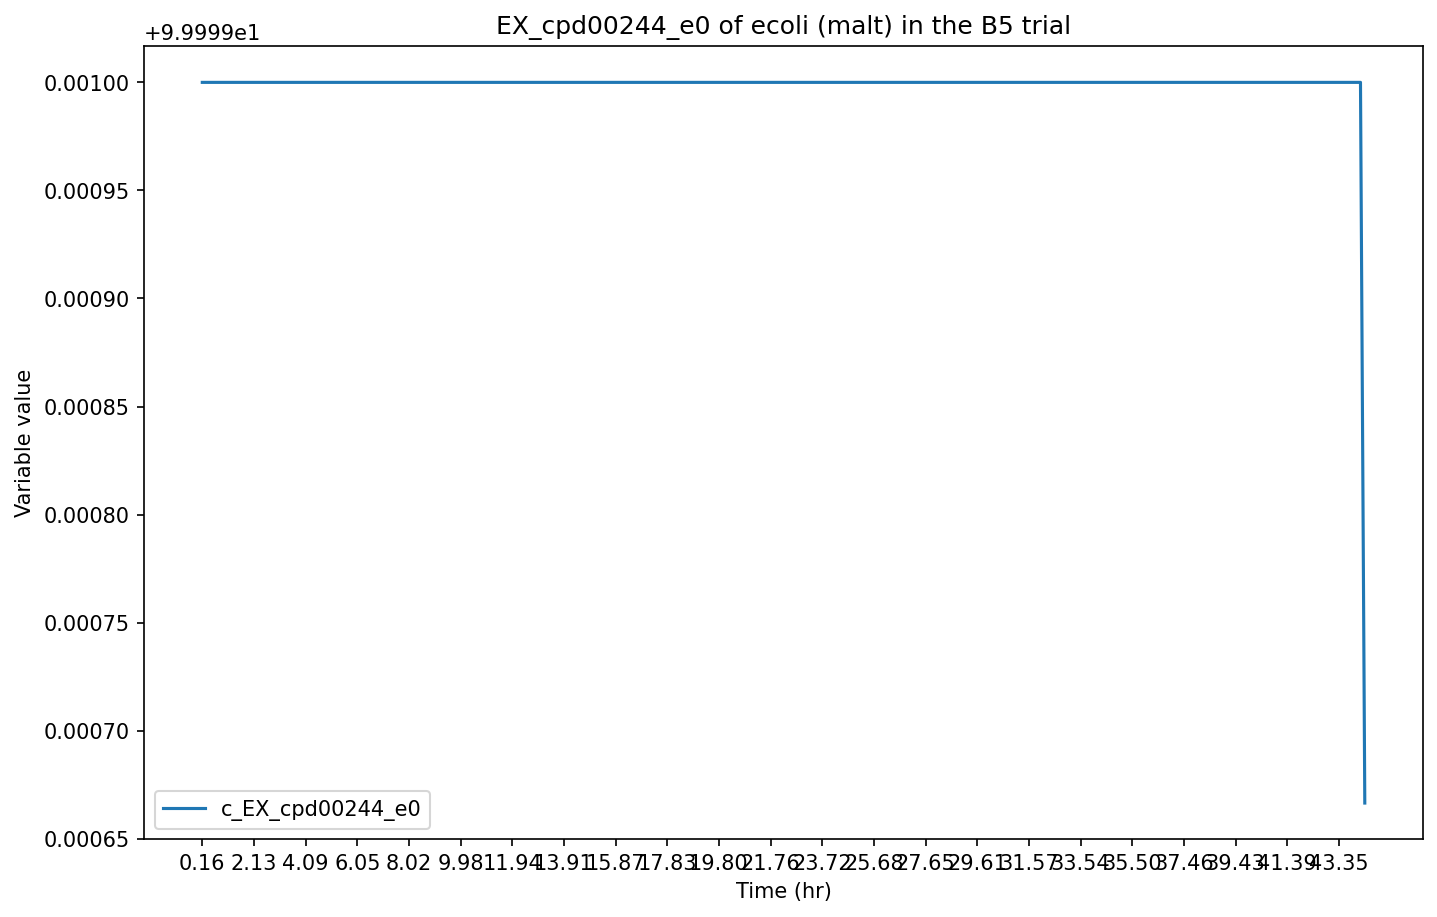

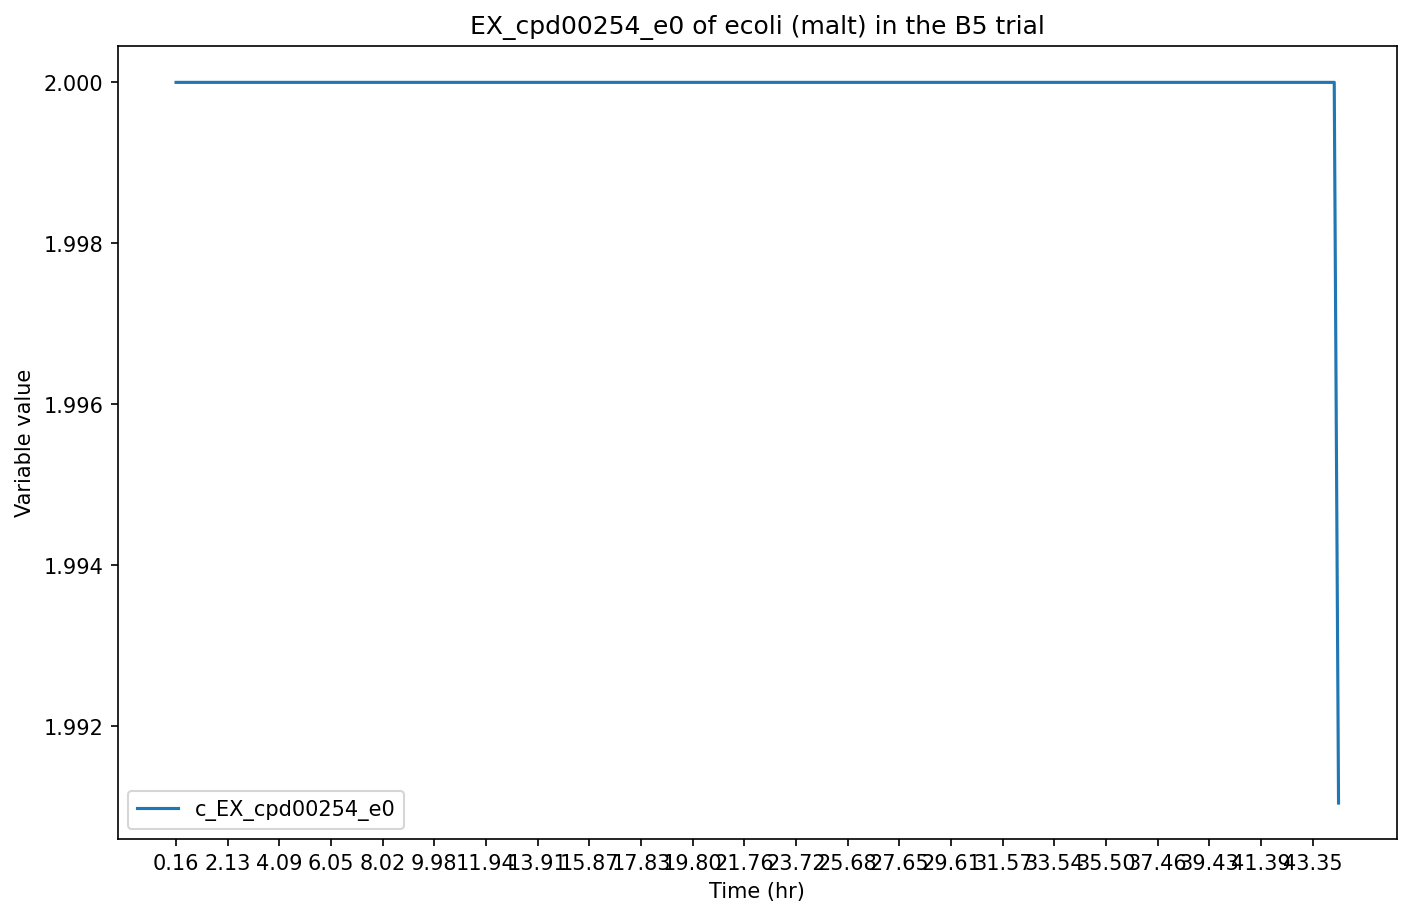

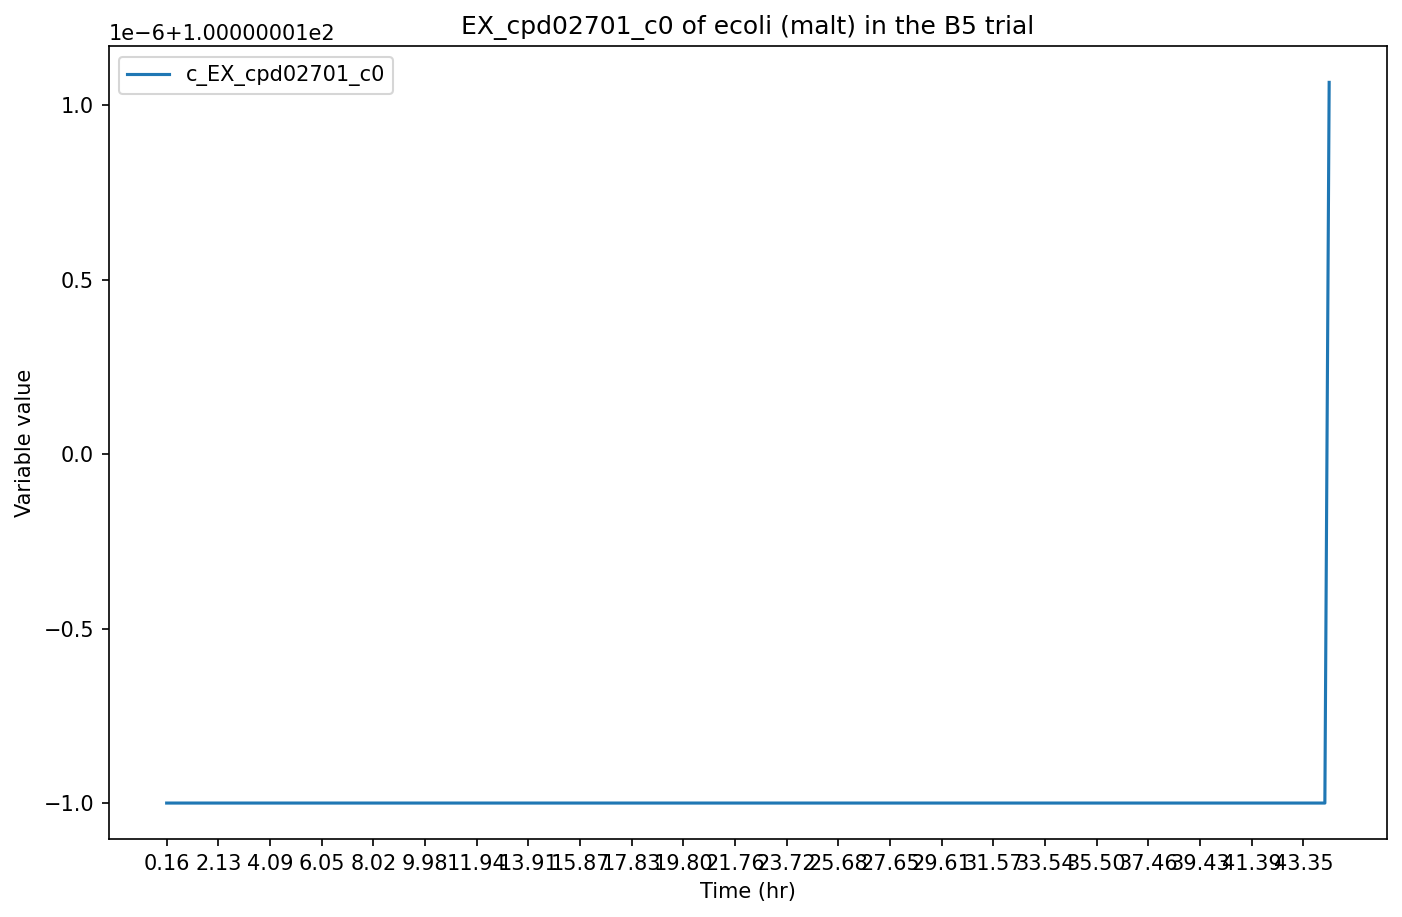

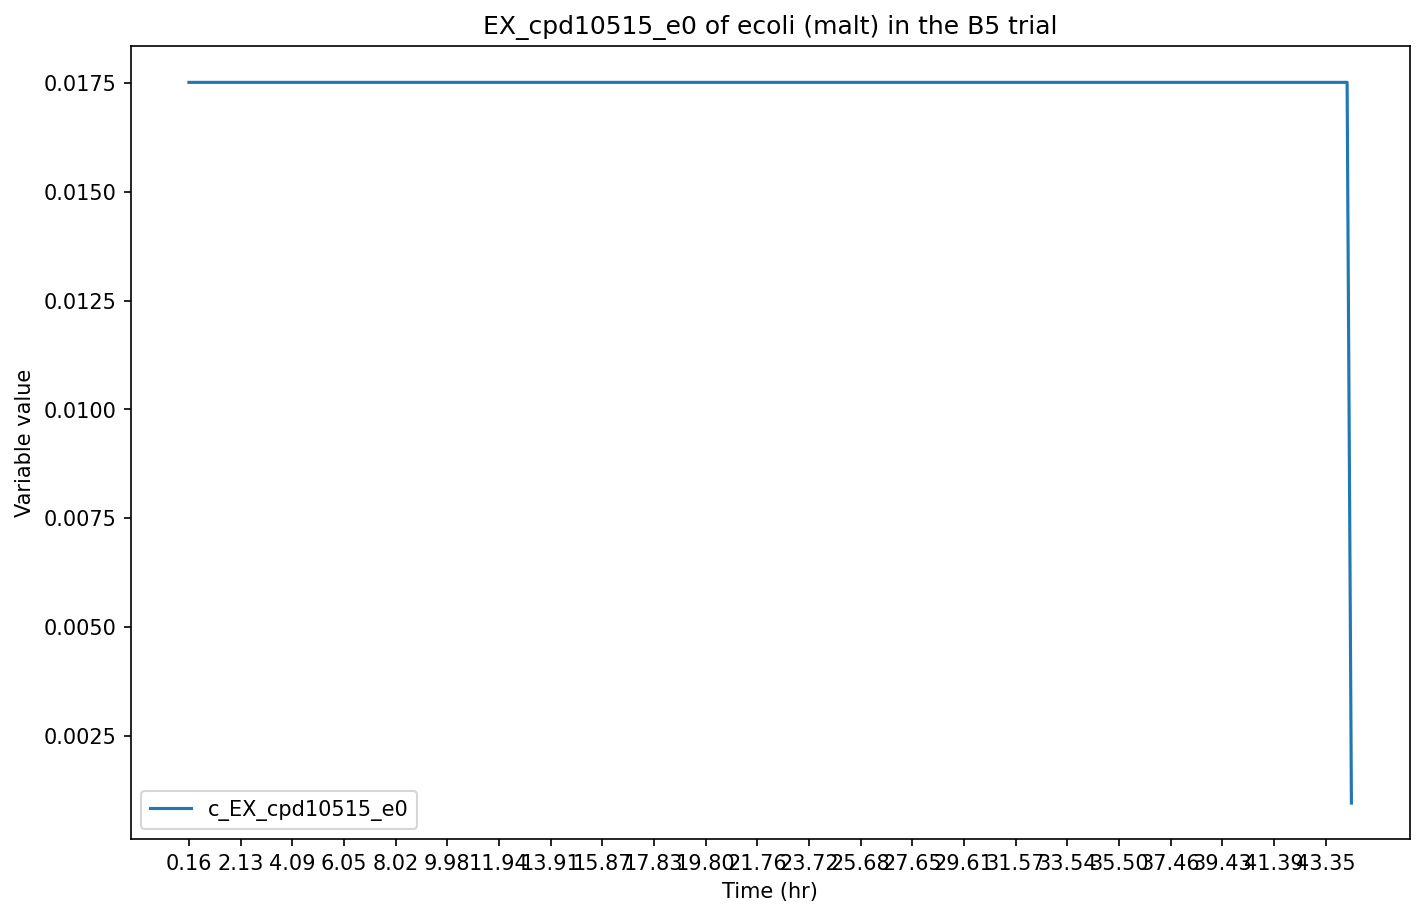

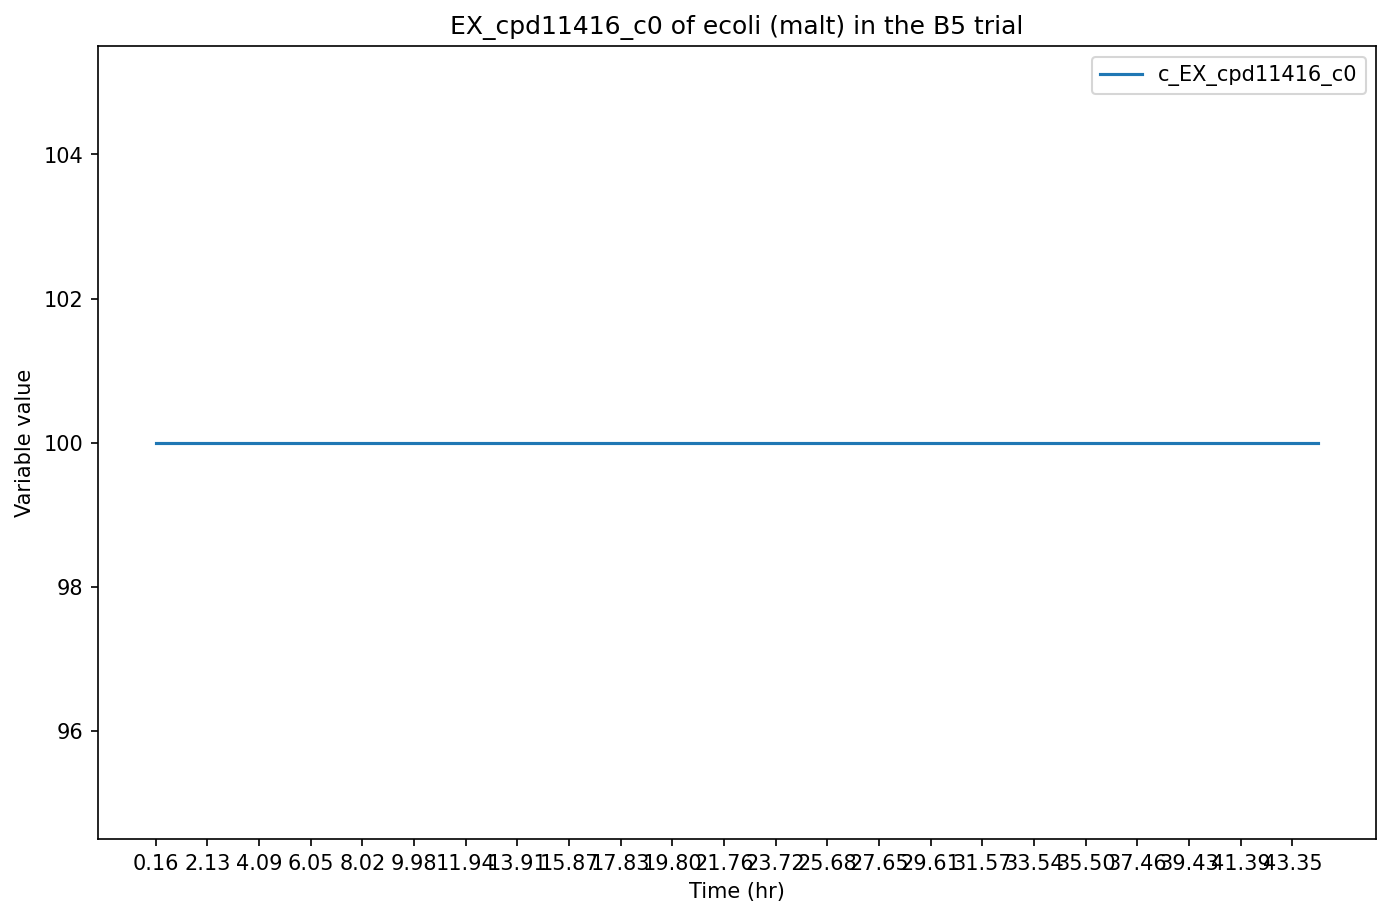

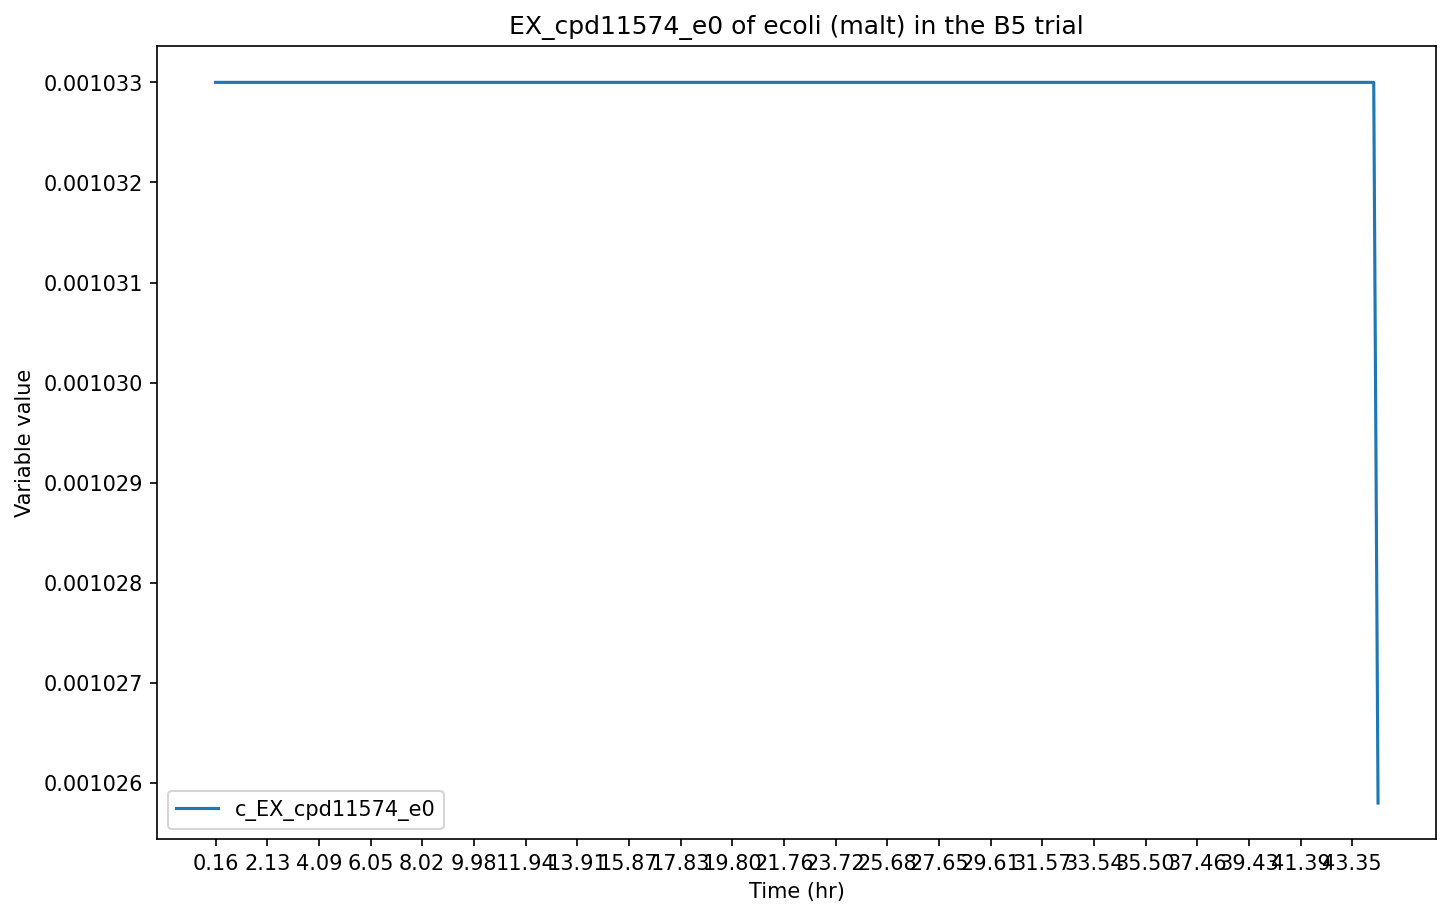

In [32]:
from datetime import datetime
from zipfile import ZipFile
from pandas import read_csv
import os
# from mscommfitting import MSCommFitting
# os.chdir('C:/Users/Andrew Freiburger/Documents/Argonne/ProjectNotebooks/CommunityModeling/CommFitting/Ecoli_maltose')
%run ../mscommfitting.py
with ZipFile('msComFit.zip', 'r') as zp:
    zp.extractall()
fluxes_df = read_csv('PhenotypeStoichiometry.csv')
graphs = []
for metabolite in fluxes_df['rxn'].to_list():
    graphs.append({
        'trial':'B5',
        'content': metabolite,
        'species': 'ecoli',
        'phenotype': 'malt'
    })
mscommfit2 = MSCommFitting(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                           signal_tsv_paths = {'RFP_pf-ec_4-29-22.txt':'ecoli', 'GFP_pf-ec_4-29-22.txt':'pf', 'OD_pf-ec_4-29-22.txt':'OD'},
                           media_conc_path = 'media_conc.csv',
                           species_abundance_path = 'species_abundances.csv',
                           carbon_conc_series = {'rows': {
                               'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                               'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                               }},
                           ignore_trials = {'wells': ['C2', 'G3', 'C12']},  # 'columns': [6,7,8,9,10,11,12]},
                           # ignore_timesteps = [x for x in range(20,167)],
                           zip_path='msComFit.zip')
print(datetime.today())
mscommfit2.define_problem(parameters={
    'v':100,
    'cvmin': 0.5,
    'bcv': 0.5,
    'timestep_hr': 0.1
}, zip_contents=True, zip_name='full_community2.zip')
print(datetime.today())
%time mscommfit2.compute(graphs, 'full_community2.zip')
print('growth:', mscommfit2.parameters['v'], 'objective value:', mscommfit2.problem.objective.value, '\n\n\n\n')
print(datetime.today())

# model API usage

In [ ]:
from mscommfitting import MSCommFitting

mscommfit = MSCommFitting(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                           signal_tsv_paths = {'RFP_pf-ec_4-29-22.txt':'ecoli', 'GFP_pf-ec_4-29-22.txt':'pf', 'OD_pf-ec_4-29-22.txt':'OD'},
                           media_conc_path = 'media_conc.csv',
                           species_abundance_path = 'species_abundances.csv',
                           carbon_conc_series = {'rows': {
                               'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                               'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                               }},
                           ignore_trials = {'rows': ['C', 'D', 'E', 'F']}, # 'wells': ['C2', 'G3', 'C12']},  # 'columns': [6,7,8,9,10,11,12]},
                           # ignore_timesteps = [x for x in range(20,167)],
                           zip_path='msComFit.zip')

mscommfit.define_problem(parameters={
    'v':0.1,
    'cvmin': 100,
    'bcv': 100,
    'diffpos': 100,
    'diffneg': 100
    }, zip_name='simple_full_community.zip')

mscommfit.compute(graphs, 'simple_full_community.zip')